In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt  
import plotly.express as px 

In [31]:
#Chagement des données
df = pd.read_csv('orientation.csv')

# Data munging

Nettoyage et transformation des données en préparation de l’analyse  


In [32]:
import pandas as pd

#Modification des noms des colonnes
data = df.copy()
t=list(data.columns)
col = ['Horodateur','Score','bac',
       'specialite',"matière_prefere",
       "mention","filière","type_etu",
       "domaine_etu","type_lieu_etu",
       "pays_bac","domaine_activite_pro",
      "tranche_age","genre","qualité","hobies",
      "type_orientation","Niveau_etu",
      "centre_interet","pays_residence",
      "type_cours","remarque","annee_bac","satisfact_formation",
      'Adresse e-mail',"etablissement"]

#len(col),len(t)
dic = {}
for i in range(len(col)):
    dic[t[i]]=col[i]
data.rename(columns=dic, inplace=True)
data= pd.DataFrame(data)
data

,Horodateur,Score,bac,specialite,matière_prefere,mention,filière,type_etu,domaine_etu,type_lieu_etu,...,type_orientation,Niveau_etu,centre_interet,pays_residence,type_cours,remarque,annee_bac,satisfact_formation,Adresse e-mail,etablissement
0,23/11/2023 13:48:45,NaN,Scientifique (équivalent),Mathématiques,"Mathématiques, Physique-chimie (PC), Sciences ...",Assez-bien,Licence MIASHS parcours MASS,Longues (>= master),Sciences et technologies,Université,...,Conseillère d'orientation,Master,"Sciences, Sport et Fitness, Technologie et Inf...",France,présentiel,"vu que j'ai répondu à votre questionnaire , je...",2017,Oui,NaN,Université de Lille
1,23/11/2023 13:17:13,NaN,Scientifique (équivalent),"Mathématiques, Physique-chimie (PC), Numérique...","Mathématiques, Physique-chimie (PC), Français,...",Bien,Génie civil et Hydraulique puis Mathématiques ...,Longues (>= master),Sciences et technologies,Université,...,Mathématiques,Master,"Sciences, Sport et Fitness, Technologie et Inf...",France,présentiel,RAS,2012,Oui,NaN,2ie puis UO puis U Lille
2,23/11/2023 00:19:26,NaN,Scientifique (équivalent),Sciences de l'ingénieur,"Mathématiques, Physique-chimie (PC)",Honorable,CPGE MPSI,Longues (>= master),Sciences et technologies,classe préparatoire,...,NaN,Master,"Sciences, Technologie et Informatique, Ingénierie",France,présentiel,NaN,2019,Oui,NaN,ENS Paris-Saclay
3,13/11/2023 19:09:32,NaN,Général,"Sciences économiques et sociales, Humanités, l...","Philosophie, Art, Français, Sciences économiqu...",Assez-bien,Master MEEF ou ENPJJ,Longues (>= master),Sciences de l'éducation et de la formation,BUT,...,NaN,BUT,"Arts, Nature et Environnement, Voyages, Histoi...",France,présentiel,NaN,2022,Oui,NaN,IUT B (Tourcoing)
4,01/11/2023 20:29:44,NaN,Scientifique (équivalent),"Mathématiques, Physique-chimie (PC), Sciences ...","Mathématiques, Philosophie, Histoire - Géograp...",Bien,licence science politique option ESJ,Longues (>= master),Droit et sciences politiques,Université,...,Une passion pour la politique et la géopolitiq...,Licence,"Arts, Nature et Environnement, Cuisine et Gast...",France,présentiel,NaN,2022,Oui,NaN,Université de Lille - ESJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,06/12/2023 06:09:14,NaN,Scientifique (équivalent),Sciences de la vie et de la Terre (SVT),"Mathématiques, Sciences de la vie et de la Ter...",Passable,Informatique,Longues (>= master),Sciences et technologies,Université,...,NaN,Licence,"Sciences, Technologie et Informatique, Cuisine...",France,présentiel,NaN,2018,Oui,NaN,Université de Lille
201,06/12/2023 12:41:05,NaN,Scientifique (équivalent),"Mathématiques, Sciences économiques et sociales","Mathématiques, Sciences économiques et sociale...",Bien,MIASHS,Longues (>= master),Sciences et technologies,Université,...,Aléatoire,Master,"Sciences, Arts, Technologie et Informatique, P...",France,présentiel,NaN,2019,Oui,NaN,Université de Lille
202,06/12/2023 12:46:45,NaN,Scientifique (équivalent),Mathématiques,"Mathématiques, Sciences numériques et technologie",Assez-bien,Mathématiques,Longues (>= master),Sciences et technologies,Université,...,NaN,Master,Sciences,France,présentiel,NaN,2017,Oui,NaN,University de Lille
203,07/12/2023 10:00:29,NaN,Scientifique (équivalent),Mathématiques,"Mathématiques, Sciences numériques et technologie",Assez-bien,MIASHS WA,Longues (>= master),Sciences et technologies,Université,...,"Par hasard, ce qui s'offrais à moi",Master,"Technologie et Informatique, Cuisine et Gastro...",France,présentiel,Bon courage pour votre travail,2018,Oui,NaN,Université de Lille


In [33]:
#les colonnes supplementaires
data = data.drop(['Horodateur','Score', 'Adresse e-mail'], axis=1)

In [34]:
# Suppression des espaces au début et à la fin à tous les éléments textuels des colonnes
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [35]:
#remplacer les valeurs manquantes par non renseigné
data.fillna("non renseigné", inplace=True)

In [36]:
# Mettre en majuscul tous les éléments textuels des colonnes
data = data.applymap(lambda x: x.upper() if isinstance(x, str) else x)

# Affichez le DataFrame résultant
data

,bac,specialite,matière_prefere,mention,filière,type_etu,domaine_etu,type_lieu_etu,pays_bac,domaine_activite_pro,...,hobies,type_orientation,Niveau_etu,centre_interet,pays_residence,type_cours,remarque,annee_bac,satisfact_formation,etablissement
0,SCIENTIFIQUE (ÉQUIVALENT),MATHÉMATIQUES,"MATHÉMATIQUES, PHYSIQUE-CHIMIE (PC), SCIENCES ...",ASSEZ-BIEN,LICENCE MIASHS PARCOURS MASS,LONGUES (>= MASTER),SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,FRANCE,DATA SCIENCE,...,NON RENSEIGNÉ,CONSEILLÈRE D'ORIENTATION,MASTER,"SCIENCES, SPORT ET FITNESS, TECHNOLOGIE ET INF...",FRANCE,PRÉSENTIEL,"VU QUE J'AI RÉPONDU À VOTRE QUESTIONNAIRE , JE...",2017,OUI,UNIVERSITÉ DE LILLE
1,SCIENTIFIQUE (ÉQUIVALENT),"MATHÉMATIQUES, PHYSIQUE-CHIMIE (PC), NUMÉRIQUE...","MATHÉMATIQUES, PHYSIQUE-CHIMIE (PC), FRANÇAIS,...",BIEN,GÉNIE CIVIL ET HYDRAULIQUE PUIS MATHÉMATIQUES ...,LONGUES (>= MASTER),SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,BURKINA FASO,ACTUAIRE,...,NON RENSEIGNÉ,MATHÉMATIQUES,MASTER,"SCIENCES, SPORT ET FITNESS, TECHNOLOGIE ET INF...",FRANCE,PRÉSENTIEL,RAS,2012,OUI,2IE PUIS UO PUIS U LILLE
2,SCIENTIFIQUE (ÉQUIVALENT),SCIENCES DE L'INGÉNIEUR,"MATHÉMATIQUES, PHYSIQUE-CHIMIE (PC)",HONORABLE,CPGE MPSI,LONGUES (>= MASTER),SCIENCES ET TECHNOLOGIES,CLASSE PRÉPARATOIRE,FRANCE,MATHS APPLIQUÉES,...,NON RENSEIGNÉ,NON RENSEIGNÉ,MASTER,"SCIENCES, TECHNOLOGIE ET INFORMATIQUE, INGÉNIERIE",FRANCE,PRÉSENTIEL,NON RENSEIGNÉ,2019,OUI,ENS PARIS-SACLAY
3,GÉNÉRAL,"SCIENCES ÉCONOMIQUES ET SOCIALES, HUMANITÉS, L...","PHILOSOPHIE, ART, FRANÇAIS, SCIENCES ÉCONOMIQU...",ASSEZ-BIEN,MASTER MEEF OU ENPJJ,LONGUES (>= MASTER),SCIENCES DE L'ÉDUCATION ET DE LA FORMATION,BUT,FRANCE,ÉDUCATION,...,NON RENSEIGNÉ,NON RENSEIGNÉ,BUT,"ARTS, NATURE ET ENVIRONNEMENT, VOYAGES, HISTOI...",FRANCE,PRÉSENTIEL,NON RENSEIGNÉ,2022,OUI,IUT B (TOURCOING)
4,SCIENTIFIQUE (ÉQUIVALENT),"MATHÉMATIQUES, PHYSIQUE-CHIMIE (PC), SCIENCES ...","MATHÉMATIQUES, PHILOSOPHIE, HISTOIRE - GÉOGRAP...",BIEN,LICENCE SCIENCE POLITIQUE OPTION ESJ,LONGUES (>= MASTER),DROIT ET SCIENCES POLITIQUES,UNIVERSITÉ,FRANCE,"ADMINISTRATION PUBLIQUE, HUMANITAIRE, DIPLOMAT...",...,NON RENSEIGNÉ,UNE PASSION POUR LA POLITIQUE ET LA GÉOPOLITIQ...,LICENCE,"ARTS, NATURE ET ENVIRONNEMENT, CUISINE ET GAST...",FRANCE,PRÉSENTIEL,NON RENSEIGNÉ,2022,OUI,UNIVERSITÉ DE LILLE - ESJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,SCIENTIFIQUE (ÉQUIVALENT),SCIENCES DE LA VIE ET DE LA TERRE (SVT),"MATHÉMATIQUES, SCIENCES DE LA VIE ET DE LA TER...",PASSABLE,INFORMATIQUE,LONGUES (>= MASTER),SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,FRANCE,"DEVELOPPEUR, CHEF DE PROJET",...,NON RENSEIGNÉ,NON RENSEIGNÉ,LICENCE,"SCIENCES, TECHNOLOGIE ET INFORMATIQUE, CUISINE...",FRANCE,PRÉSENTIEL,NON RENSEIGNÉ,2018,OUI,UNIVERSITÉ DE LILLE
201,SCIENTIFIQUE (ÉQUIVALENT),"MATHÉMATIQUES, SCIENCES ÉCONOMIQUES ET SOCIALES","MATHÉMATIQUES, SCIENCES ÉCONOMIQUES ET SOCIALE...",BIEN,MIASHS,LONGUES (>= MASTER),SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,TUNISIE,DATA SCIENCE,...,NON RENSEIGNÉ,ALÉATOIRE,MASTER,"SCIENCES, ARTS, TECHNOLOGIE ET INFORMATIQUE, P...",FRANCE,PRÉSENTIEL,NON RENSEIGNÉ,2019,OUI,UNIVERSITÉ DE LILLE
202,SCIENTIFIQUE (ÉQUIVALENT),MATHÉMATIQUES,"MATHÉMATIQUES, SCIENCES NUMÉRIQUES ET TECHNOLOGIE",ASSEZ-BIEN,MATHÉMATIQUES,LONGUES (>= MASTER),SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,COMORES,LA DATA SCIENCE,...,NON RENSEIGNÉ,NON RENSEIGNÉ,MASTER,SCIENCES,FRANCE,PRÉSENTIEL,NON RENSEIGNÉ,2017,OUI,UNIVERSITY DE LILLE
203,SCIENTIFIQUE (ÉQUIVALENT),MATHÉMATIQUES,"MATHÉMATIQUES, SCIENCES NUMÉRIQUES ET TECHNOLOGIE",ASSEZ-BIEN,MIASHS WA,LONGUES (>= MASTER),SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,FRANCE,DÉVELOPPEMENT BACK-END,...,NON RENSEIGNÉ,"PAR HASARD, CE QUI S'OFFRAIS À MOI",MASTER,"TECHNOLOGIE ET INFORMATIQUE, CUISINE ET GASTRO...",FRANCE,PRÉSENTIEL,BON COURAGE POUR VOTRE TRAVAIL,2018,OUI,UNIVERSITÉ DE LILLE


##### Traitement des valeurs des different colonnes de la data :

In [37]:
#fonction pour corriger les valeurs d'une colonnes
def netoyage(df,nom_colone,var): 
    data = df.copy()
    data[nom_colone] = data[nom_colone].replace(var)
    return data

In [38]:
#fonction pour mettres les elements (cle et valeurs) testuel en majuscul
def dico_maj(dico):    
    
    
    # Créer un nouveau dictionnaire avec les clés et les valeurs en majuscules
    nouveau_dico = {cle.upper(): valeur.upper() if isinstance(valeur, str) else valeur for cle, valeur in dico.items()}

    # Afficher le nouveau dictionnaire
    return nouveau_dico

In [39]:
def trouve_ma_ligne(df,col,lien):
    return df[df[col] == lien]

##### Variables bac :

In [40]:
data.bac.unique()

array(['SCIENTIFIQUE (ÉQUIVALENT)', 'GÉNÉRAL', 'TECHNIQUE (ÉQUIVALENT)',
       'GÉNÉRAL (MENTION EUROPÉENNE)', 'LITTÉRAIRE (ÉQUIVALENT)',
       'GÉNÉRAL SPÉ+ OPTION ARTS PLASTIQUES ET SPÉ AMC',
       "LES 3: J'AI FAIS HGGSP/HLP/MATH '^'", 'PROFESSIONNEL',
       'ART ET HISTOIRE', 'GÉNÉRALE', 'MÉLANGE ÉCO SOCIO ET LITTÉ',
       'ECONOMIE ET SOCIALE (ÉQUIVALENT)', 'MATHS ET HISTOIRE',
       'SVT HGGSP',
       'STMG (SCIENCES TECHNOLOGIES DU MANAGEMENT ET DE LA GESTION',
       'STMG'], dtype=object)

In [41]:
pd.crosstab(data.bac, "freq")

col_0,freq
bac,
ART ET HISTOIRE,1
ECONOMIE ET SOCIALE (ÉQUIVALENT),35
GÉNÉRAL,3
GÉNÉRAL (MENTION EUROPÉENNE),1
GÉNÉRAL SPÉ+ OPTION ARTS PLASTIQUES ET SPÉ AMC,1
GÉNÉRALE,1
LES 3: J'AI FAIS HGGSP/HLP/MATH '^',1
LITTÉRAIRE (ÉQUIVALENT),38
MATHS ET HISTOIRE,1


In [42]:
var = {"Art et histoire ":"Littéraire (équivalent)","Générale":"Scientifique (équivalent)",
       "Général":"Economie et Sociale (équivalent)","Général ":"Scientifique (équivalent)",
       "Les 3: J'ai fais HGGSP/HLP/Math '^'":"Scientifique (équivalent)",
       "Maths et histoire ":"Economie et Sociale (équivalent)","Général (mention européenne)":"Scientifique (équivalent)",
       "Général spé+ option arts plastiques et spé AMC":"LITTÉRAIRE (ÉQUIVALENT)",
       "Mélange éco socio et litté":"Economie et Sociale (équivalent)",
       "STMG (Sciences Technologies du management et de la Gestion":"Technique (équivalent)","SVT HGGSP":"Economie et Sociale (équivalent)",
      "ART ET HISTOIRE":"LITTÉRAIRE (ÉQUIVALENT)","MATHS ET HISTOIRE":"ECONOMIE ET SOCIALE (ÉQUIVALENT)",
      "STMG":"Technique (équivalent)","SVT HGGSP":"Scientifique (équivalent)"}
var = dico_maj(var)
var


{'ART ET HISTOIRE ': 'LITTÉRAIRE (ÉQUIVALENT)',
 'GÉNÉRALE': 'SCIENTIFIQUE (ÉQUIVALENT)',
 'GÉNÉRAL': 'ECONOMIE ET SOCIALE (ÉQUIVALENT)',
 'GÉNÉRAL ': 'SCIENTIFIQUE (ÉQUIVALENT)',
 "LES 3: J'AI FAIS HGGSP/HLP/MATH '^'": 'SCIENTIFIQUE (ÉQUIVALENT)',
 'MATHS ET HISTOIRE ': 'ECONOMIE ET SOCIALE (ÉQUIVALENT)',
 'GÉNÉRAL (MENTION EUROPÉENNE)': 'SCIENTIFIQUE (ÉQUIVALENT)',
 'GÉNÉRAL SPÉ+ OPTION ARTS PLASTIQUES ET SPÉ AMC': 'LITTÉRAIRE (ÉQUIVALENT)',
 'MÉLANGE ÉCO SOCIO ET LITTÉ': 'ECONOMIE ET SOCIALE (ÉQUIVALENT)',
 'STMG (SCIENCES TECHNOLOGIES DU MANAGEMENT ET DE LA GESTION': 'TECHNIQUE (ÉQUIVALENT)',
 'SVT HGGSP': 'SCIENTIFIQUE (ÉQUIVALENT)',
 'ART ET HISTOIRE': 'LITTÉRAIRE (ÉQUIVALENT)',
 'MATHS ET HISTOIRE': 'ECONOMIE ET SOCIALE (ÉQUIVALENT)',
 'STMG': 'TECHNIQUE (ÉQUIVALENT)'}

In [43]:
data_new1=netoyage(data,"bac",var)
pd.crosstab(data_new1.bac, "freq")

col_0,freq
bac,
ECONOMIE ET SOCIALE (ÉQUIVALENT),40
LITTÉRAIRE (ÉQUIVALENT),40
PROFESSIONNEL,3
SCIENTIFIQUE (ÉQUIVALENT),113
TECHNIQUE (ÉQUIVALENT),9


#### variable specialite :

In [44]:
#data.specialite.unique()
pd.crosstab(data_new1.specialite, "freq")

col_0,freq
specialite,
ANALYSE ET MÉTHODES EN ARTS APPLIQUÉES ET CONCEPTION ET CRÉATION,1
ARTS,1
"ARTS, ANGLAIS MONDE CONTEMPORAIN",1
"ARTS, LANGUES, LITTÉRATURES ET CULTURES ÉTRANGÈRES",1
"ARTS, LITTÉRATURE ET PHILOSOPHIE",1
...,...
"SCIENCES ÉCONOMIQUES ET SOCIALES, NUMÉRIQUES ET SCIENCES INFORMATIQUES",1
"SCIENCES ÉCONOMIQUES ET SOCIALES, SCIENCES DE LA VIE ET DE LA TERRE (SVT)",2
SOCIOLOGIE,1


In [45]:
def division_colonne(df,nom_col):
    
    """Fonction pour divisisé une colonne presentant
    des element enumerés  en plusieurs colonnes"""
    
    data = df.copy()
    # Division de la colonne 'nom_col' en listes en utilisant la virgule comme séparateur
    data[nom_col] = data[nom_col].str.split(',')

    # Trouver le nombre maximum d'éléments dans une cellule
    max_elements = data[nom_col].apply(len).max()

    # Création de nouvelles colonnes à partir des listes
    df_new = pd.concat([data[nom_col].apply(lambda x: x[i] if len(x) > i else None).rename(f'Col_{nom_col+str(i+1)}') for i in range(max_elements)], axis=1)

    # Concaténation des nouvelles colonnes avec le DataFrame d'origine
    df = pd.concat([data, df_new], axis=1)

    return df

In [46]:
data_new12 = division_colonne(data_new1,"specialite")
# Suppression des espaces au début et à la fin à tous les éléments textuels des colonnes
data_new12 = data_new12.applymap(lambda x: x.strip() if isinstance(x, str) else x)
data_new12

,bac,specialite,matière_prefere,mention,filière,type_etu,domaine_etu,type_lieu_etu,pays_bac,domaine_activite_pro,...,Col_specialite2,Col_specialite3,Col_specialite4,Col_specialite5,Col_specialite6,Col_specialite7,Col_specialite8,Col_specialite9,Col_specialite10,Col_specialite11
0,SCIENTIFIQUE (ÉQUIVALENT),[MATHÉMATIQUES],"MATHÉMATIQUES, PHYSIQUE-CHIMIE (PC), SCIENCES ...",ASSEZ-BIEN,LICENCE MIASHS PARCOURS MASS,LONGUES (>= MASTER),SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,FRANCE,DATA SCIENCE,...,None,None,None,None,None,None,None,None,None,None
1,SCIENTIFIQUE (ÉQUIVALENT),"[MATHÉMATIQUES, PHYSIQUE-CHIMIE (PC), NUMÉRI...","MATHÉMATIQUES, PHYSIQUE-CHIMIE (PC), FRANÇAIS,...",BIEN,GÉNIE CIVIL ET HYDRAULIQUE PUIS MATHÉMATIQUES ...,LONGUES (>= MASTER),SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,BURKINA FASO,ACTUAIRE,...,PHYSIQUE-CHIMIE (PC),NUMÉRIQUES ET SCIENCES INFORMATIQUES,None,None,None,None,None,None,None,None
2,SCIENTIFIQUE (ÉQUIVALENT),[SCIENCES DE L'INGÉNIEUR],"MATHÉMATIQUES, PHYSIQUE-CHIMIE (PC)",HONORABLE,CPGE MPSI,LONGUES (>= MASTER),SCIENCES ET TECHNOLOGIES,CLASSE PRÉPARATOIRE,FRANCE,MATHS APPLIQUÉES,...,None,None,None,None,None,None,None,None,None,None
3,ECONOMIE ET SOCIALE (ÉQUIVALENT),"[SCIENCES ÉCONOMIQUES ET SOCIALES, HUMANITÉS,...","PHILOSOPHIE, ART, FRANÇAIS, SCIENCES ÉCONOMIQU...",ASSEZ-BIEN,MASTER MEEF OU ENPJJ,LONGUES (>= MASTER),SCIENCES DE L'ÉDUCATION ET DE LA FORMATION,BUT,FRANCE,ÉDUCATION,...,HUMANITÉS,LITTÉRATURE ET PHILOSOPHIE,LANGUES,LITTÉRATURES ET CULTURES ÉTRANGÈRES,None,None,None,None,None,None
4,SCIENTIFIQUE (ÉQUIVALENT),"[MATHÉMATIQUES, PHYSIQUE-CHIMIE (PC), SCIENC...","MATHÉMATIQUES, PHILOSOPHIE, HISTOIRE - GÉOGRAP...",BIEN,LICENCE SCIENCE POLITIQUE OPTION ESJ,LONGUES (>= MASTER),DROIT ET SCIENCES POLITIQUES,UNIVERSITÉ,FRANCE,"ADMINISTRATION PUBLIQUE, HUMANITAIRE, DIPLOMAT...",...,PHYSIQUE-CHIMIE (PC),SCIENCES ÉCONOMIQUES ET SOCIALES,ALLEMAND EURO,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,SCIENTIFIQUE (ÉQUIVALENT),[SCIENCES DE LA VIE ET DE LA TERRE (SVT)],"MATHÉMATIQUES, SCIENCES DE LA VIE ET DE LA TER...",PASSABLE,INFORMATIQUE,LONGUES (>= MASTER),SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,FRANCE,"DEVELOPPEUR, CHEF DE PROJET",...,None,None,None,None,None,None,None,None,None,None
201,SCIENTIFIQUE (ÉQUIVALENT),"[MATHÉMATIQUES, SCIENCES ÉCONOMIQUES ET SOCIA...","MATHÉMATIQUES, SCIENCES ÉCONOMIQUES ET SOCIALE...",BIEN,MIASHS,LONGUES (>= MASTER),SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,TUNISIE,DATA SCIENCE,...,SCIENCES ÉCONOMIQUES ET SOCIALES,None,None,None,None,None,None,None,None,None
202,SCIENTIFIQUE (ÉQUIVALENT),[MATHÉMATIQUES],"MATHÉMATIQUES, SCIENCES NUMÉRIQUES ET TECHNOLOGIE",ASSEZ-BIEN,MATHÉMATIQUES,LONGUES (>= MASTER),SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,COMORES,LA DATA SCIENCE,...,None,None,None,None,None,None,None,None,None,None
203,SCIENTIFIQUE (ÉQUIVALENT),[MATHÉMATIQUES],"MATHÉMATIQUES, SCIENCES NUMÉRIQUES ET TECHNOLOGIE",ASSEZ-BIEN,MIASHS WA,LONGUES (>= MASTER),SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,FRANCE,DÉVELOPPEMENT BACK-END,...,None,None,None,None,None,None,None,None,None,None


In [47]:
data_new12.columns

Index(['bac', 'specialite', 'matière_prefere', 'mention', 'filière',
       'type_etu', 'domaine_etu', 'type_lieu_etu', 'pays_bac',
       'domaine_activite_pro', 'tranche_age', 'genre', 'qualité', 'hobies',
       'type_orientation', 'Niveau_etu', 'centre_interet', 'pays_residence',
       'type_cours', 'remarque', 'annee_bac', 'satisfact_formation',
       'etablissement', 'Col_specialite1', 'Col_specialite2',
       'Col_specialite3', 'Col_specialite4', 'Col_specialite5',
       'Col_specialite6', 'Col_specialite7', 'Col_specialite8',
       'Col_specialite9', 'Col_specialite10', 'Col_specialite11'],
      dtype='object')

In [48]:
data_new12['Col_specialite1'] = data_new12['Col_specialite1'].fillna("PAS DE SPÉ")
var0 = {'Eco droit / Management / Gestion finance':'Sciences économiques et sociales',
      'Bac ES spé maths':'Mathématiques','Rh (ressources humaines)':'SCIENCES HUMAINES',
       "Pas de spécialité":"PAS DE SPÉ","Analyse et méthodes en arts appliquées et conception et création":"Arts",
       "Marketing et Gestion":"Sciences économiques et sociales","MODE":"ARTS",
       "TECHNICIEN DE LABORATOIRE":"PAS DE SPÉ","ÉLECTRONIQUE":"PHYSIQUE-CHIMIE (PC)","MÉCANIQUE":"PHYSIQUE-CHIMIE (PC)",'SOCIOLOGIE':'SCIENCES ÉCONOMIQUES ET SOCIALES',
       "CHIMIE":"PHYSIQUE-CHIMIE (PC)","HUMANITÉS":'SCIENCES HUMAINES'	,"RESSOURCES HUMAINES":'SCIENCES HUMAINES',"LANGUES":"LITTÉRATURE ET PHILOSOPHIE"	
       }
var0 = dico_maj(var0)
data_new2=netoyage(data_new12,"Col_specialite1",var0)
pd.crosstab(data_new2.Col_specialite1, "freq")

col_0,freq
Col_specialite1,
ARTS,7
HISTOIRE-GÉOGRAPHIE ( HGGSP ),8
LITTÉRATURE ET PHILOSOPHIE,3
MATHÉMATIQUES,98
NUMÉRIQUES ET SCIENCES INFORMATIQUES,6
PAS DE SPÉ,2
PHYSIQUE-CHIMIE (PC),20
SCIENCES DE L'INGÉNIEUR,3
SCIENCES DE LA VIE ET DE LA TERRE (SVT),12


In [49]:
data_new2.Col_specialite2.unique()
pd.crosstab(data_new2.Col_specialite2, "freq")

col_0,freq
Col_specialite2,
ANGLAIS MONDE CONTEMPORAIN,1
ARTS,3
HISTOIRE-GÉOGRAPHIE,4
HISTOIRE-GÉOGRAPHIE ( HGGSP ),17
HUMANITÉS,10
INFORMATIQUE ET INDUSTRIE,1
LANGUES,6
LITTÉRATURE ET PHILOSOPHIE,8
LITTÉRATURES ET CULTURES ÉTRANGÈRES,3


In [50]:
data_new2['Col_specialite2'] = data_new2['Col_specialite2'].fillna("PAS DE SPÉ")
var00 = {'Histoire-géographie':"Histoire-géographie ( HGGSP )"," ANGLAIS MONDE CONTEMPORAIN":"Anglais Monde Contemporain (AMC)",
      'Informatique et Industrie':'Numériques et sciences informatiques','littératures et cultures étrangères':'Littératures et cultures étrangères',
       'littérature et philosophie':"Littérature et philosophie"," Langues":"Langues",
        "Littératures et cultures étrangères":"Littératures et cultures étrangères"}

var00 = dico_maj(var00)
data_new21=netoyage(data_new2,"Col_specialite2",var00)
pd.crosstab(data_new21.Col_specialite2, "freq")


col_0,freq
Col_specialite2,
ANGLAIS MONDE CONTEMPORAIN,1
ARTS,3
HISTOIRE-GÉOGRAPHIE ( HGGSP ),21
HUMANITÉS,10
LANGUES,6
LITTÉRATURE ET PHILOSOPHIE,8
LITTÉRATURES ET CULTURES ÉTRANGÈRES,3
NUMÉRIQUES ET SCIENCES INFORMATIQUES,3
PAS DE SPÉ,73


In [51]:
l = data_new21.Col_specialite3
l.value_counts()

SCIENCES DE LA VIE ET DE LA TERRE (SVT)    19
LANGUES                                    11
LITTÉRATURE ET PHILOSOPHIE                 10
HISTOIRE-GÉOGRAPHIE ( HGGSP )              10
LITTÉRATURES ET CULTURES ÉTRANGÈRES         8
HUMANITÉS                                   7
ARTS                                        6
SCIENCES DE L'INGÉNIEUR                     6
NUMÉRIQUES ET SCIENCES INFORMATIQUES        4
HISTOIRE-GÉOGRAPHIE                         3
SCIENCES ÉCONOMIQUES ET SOCIALES            1
LITTÉRATURE                                 1
Name: Col_specialite3, dtype: int64

In [52]:
data_new21['Col_specialite3'] = data_new21['Col_specialite3'].fillna("PAS DE SPÉ")
var000 = {'Histoire-géographie':"Histoire-géographie ( HGGSP )"}
var000 = dico_maj(var000)
data_new21=netoyage(data_new21,"Col_specialite3",var000)
pd.crosstab(data_new21.Col_specialite3, "freq")

col_0,freq
Col_specialite3,
ARTS,6
HISTOIRE-GÉOGRAPHIE ( HGGSP ),13
HUMANITÉS,7
LANGUES,11
LITTÉRATURE,1
LITTÉRATURE ET PHILOSOPHIE,10
LITTÉRATURES ET CULTURES ÉTRANGÈRES,8
NUMÉRIQUES ET SCIENCES INFORMATIQUES,4
PAS DE SPÉ,119


In [53]:
data_new21.isna().sum()

bac                       0
specialite                0
matière_prefere           0
mention                   0
filière                   0
type_etu                  0
domaine_etu               0
type_lieu_etu             0
pays_bac                  0
domaine_activite_pro      0
tranche_age               0
genre                     0
qualité                   0
hobies                    0
type_orientation          0
Niveau_etu                0
centre_interet            0
pays_residence            0
type_cours                0
remarque                  0
annee_bac                 0
satisfact_formation       0
etablissement             0
Col_specialite1           0
Col_specialite2           0
Col_specialite3           0
Col_specialite4         167
Col_specialite5         194
Col_specialite6         200
Col_specialite7         202
Col_specialite8         202
Col_specialite9         204
Col_specialite10        204
Col_specialite11        204
dtype: int64

#### Variable matière_prefere :

In [54]:
data_new21.matière_prefere.unique()
pd.crosstab(data_new21.matière_prefere, "freq")

col_0,freq
matière_prefere,
ANGLAIS (MAIS QUE L'ANGLAIS PAS LES LANGUES EN GÉNÉRAL),1
ANGLAIS MAIS QUE CETTE LANGUE PAS LES AUTRES,1
ART,3
"ART, ET SPLATOON",1
"ART, FRANÇAIS",1
...,...
"SCIENCES ÉCONOMIQUES ET SOCIALES, LANGUES ÉTRANGÈRES, SCIENCES POLITIQUES, EDUCATION CIVIQUE ET MORALE, ANGLAIS",1
"SCIENCES ÉCONOMIQUES ET SOCIALES, SCIENCES NUMÉRIQUES ET TECHNOLOGIE, LANGUES ÉTRANGÈRES",1
"SCIENCES ÉCONOMIQUES ET SOCIALES, SCIENCES POLITIQUES",1


In [55]:
data_new22 = division_colonne(data_new21,"matière_prefere")

data_new22 = data_new22.applymap(lambda x: x.strip() if isinstance(x, str) else x)

data_new22

,bac,specialite,matière_prefere,mention,filière,type_etu,domaine_etu,type_lieu_etu,pays_bac,domaine_activite_pro,...,Col_specialite9,Col_specialite10,Col_specialite11,Col_matière_prefere1,Col_matière_prefere2,Col_matière_prefere3,Col_matière_prefere4,Col_matière_prefere5,Col_matière_prefere6,Col_matière_prefere7
0,SCIENTIFIQUE (ÉQUIVALENT),[MATHÉMATIQUES],"[MATHÉMATIQUES, PHYSIQUE-CHIMIE (PC), SCIENC...",ASSEZ-BIEN,LICENCE MIASHS PARCOURS MASS,LONGUES (>= MASTER),SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,FRANCE,DATA SCIENCE,...,None,None,None,MATHÉMATIQUES,PHYSIQUE-CHIMIE (PC),SCIENCES DE LA VIE ET DE LA TERRE (SVT),HISTOIRE - GÉOGRAPHIE,ÉDUCATION PHYSIQUE ET SPORTIVE,EDUCATION CIVIQUE ET MORALE,None
1,SCIENTIFIQUE (ÉQUIVALENT),"[MATHÉMATIQUES, PHYSIQUE-CHIMIE (PC), NUMÉRI...","[MATHÉMATIQUES, PHYSIQUE-CHIMIE (PC), FRANÇA...",BIEN,GÉNIE CIVIL ET HYDRAULIQUE PUIS MATHÉMATIQUES ...,LONGUES (>= MASTER),SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,BURKINA FASO,ACTUAIRE,...,None,None,None,MATHÉMATIQUES,PHYSIQUE-CHIMIE (PC),FRANÇAIS,SCIENCES NUMÉRIQUES ET TECHNOLOGIE,None,None,None
2,SCIENTIFIQUE (ÉQUIVALENT),[SCIENCES DE L'INGÉNIEUR],"[MATHÉMATIQUES, PHYSIQUE-CHIMIE (PC)]",HONORABLE,CPGE MPSI,LONGUES (>= MASTER),SCIENCES ET TECHNOLOGIES,CLASSE PRÉPARATOIRE,FRANCE,MATHS APPLIQUÉES,...,None,None,None,MATHÉMATIQUES,PHYSIQUE-CHIMIE (PC),None,None,None,None,None
3,ECONOMIE ET SOCIALE (ÉQUIVALENT),"[SCIENCES ÉCONOMIQUES ET SOCIALES, HUMANITÉS,...","[PHILOSOPHIE, ART, FRANÇAIS, SCIENCES ÉCONO...",ASSEZ-BIEN,MASTER MEEF OU ENPJJ,LONGUES (>= MASTER),SCIENCES DE L'ÉDUCATION ET DE LA FORMATION,BUT,FRANCE,ÉDUCATION,...,None,None,None,PHILOSOPHIE,ART,FRANÇAIS,SCIENCES ÉCONOMIQUES ET SOCIALES,LANGUES ÉTRANGÈRES,EDUCATION CIVIQUE ET MORALE,None
4,SCIENTIFIQUE (ÉQUIVALENT),"[MATHÉMATIQUES, PHYSIQUE-CHIMIE (PC), SCIENC...","[MATHÉMATIQUES, PHILOSOPHIE, HISTOIRE - GÉOG...",BIEN,LICENCE SCIENCE POLITIQUE OPTION ESJ,LONGUES (>= MASTER),DROIT ET SCIENCES POLITIQUES,UNIVERSITÉ,FRANCE,"ADMINISTRATION PUBLIQUE, HUMANITAIRE, DIPLOMAT...",...,None,None,None,MATHÉMATIQUES,PHILOSOPHIE,HISTOIRE - GÉOGRAPHIE,SCIENCES ÉCONOMIQUES ET SOCIALES,LANGUES ÉTRANGÈRES,SCIENCES POLITIQUES,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,SCIENTIFIQUE (ÉQUIVALENT),[SCIENCES DE LA VIE ET DE LA TERRE (SVT)],"[MATHÉMATIQUES, SCIENCES DE LA VIE ET DE LA T...",PASSABLE,INFORMATIQUE,LONGUES (>= MASTER),SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,FRANCE,"DEVELOPPEUR, CHEF DE PROJET",...,None,None,None,MATHÉMATIQUES,SCIENCES DE LA VIE ET DE LA TERRE (SVT),SCIENCES NUMÉRIQUES ET TECHNOLOGIE,None,None,None,None
201,SCIENTIFIQUE (ÉQUIVALENT),"[MATHÉMATIQUES, SCIENCES ÉCONOMIQUES ET SOCIA...","[MATHÉMATIQUES, SCIENCES ÉCONOMIQUES ET SOCIA...",BIEN,MIASHS,LONGUES (>= MASTER),SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,TUNISIE,DATA SCIENCE,...,None,None,None,MATHÉMATIQUES,SCIENCES ÉCONOMIQUES ET SOCIALES,ANGLAIS,None,None,None,None
202,SCIENTIFIQUE (ÉQUIVALENT),[MATHÉMATIQUES],"[MATHÉMATIQUES, SCIENCES NUMÉRIQUES ET TECHNO...",ASSEZ-BIEN,MATHÉMATIQUES,LONGUES (>= MASTER),SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,COMORES,LA DATA SCIENCE,...,None,None,None,MATHÉMATIQUES,SCIENCES NUMÉRIQUES ET TECHNOLOGIE,None,None,None,None,None
203,SCIENTIFIQUE (ÉQUIVALENT),[MATHÉMATIQUES],"[MATHÉMATIQUES, SCIENCES NUMÉRIQUES ET TECHNO...",ASSEZ-BIEN,MIASHS WA,LONGUES (>= MASTER),SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,FRANCE,DÉVELOPPEMENT BACK-END,...,None,None,None,MATHÉMATIQUES,SCIENCES NUMÉRIQUES ET TECHNOLOGIE,None,None,None,None,None


In [56]:
pd.crosstab(data_new22.Col_matière_prefere1, "freq")

col_0,freq
Col_matière_prefere1,
ANGLAIS (MAIS QUE L'ANGLAIS PAS LES LANGUES EN GÉNÉRAL),1
ANGLAIS MAIS QUE CETTE LANGUE PAS LES AUTRES,1
ART,10
AUJOURD'HUI : INFORMATIQUE,1
CHIMIE,1
COMMUNICATION ET RÉDACTION,3
FRANÇAIS,7
HISTOIRE - GÉOGRAPHIE,27
INFORMATIQUE,1


In [57]:
data_new22['Col_matière_prefere1'] = data_new22['Col_matière_prefere1'].fillna('NON RENSEIGNÉ')
var01 = {'Anglais mais que cette langue pas les autres':'LANGUES ÉTRANGÈRES',"Aujourd'hui : Informatique":"Sciences numériques et technologie",
      'Informatique':'Sciences numériques et technologie',"Et Splatoon":"non rensigné",
        "Anglais (mais que l'anglais pas les langues en général)":"LANGUES ÉTRANGÈRES",
        "HISTOIRE - GÉOGRAPHIE":"Histoire-géographie ( HGGSP )","CHIMIE":"PHYSIQUE-CHIMIE (PC)","COMMUNICATION ET RÉDACTION":"FRANÇAIS","SCIENCES POLITIQUES":"HISTOIRE-GÉOGRAPHIE ( HGGSP )"}

var01 = dico_maj(var01)
data_new221=netoyage(data_new22,"Col_matière_prefere1",var01)
pd.crosstab(data_new221.Col_matière_prefere1, "freq")


col_0,freq
Col_matière_prefere1,
ART,10
FRANÇAIS,10
HISTOIRE-GÉOGRAPHIE ( HGGSP ),29
LANGUES ÉTRANGÈRES,12
MATHÉMATIQUES,76
PHILOSOPHIE,10
PHYSIQUE-CHIMIE (PC),15
SCIENCES DE LA VIE ET DE LA TERRE (SVT),17
SCIENCES NUMÉRIQUES ET TECHNOLOGIE,10


In [58]:
pd.crosstab(data_new221.Col_matière_prefere2, "freq")

col_0,freq
Col_matière_prefere2,
ANGLAIS,4
ART,13
EDUCATION CIVIQUE ET MORALE,1
ET SPLATOON,1
FRANÇAIS,9
HISTOIRE - GÉOGRAPHIE,7
LANGUES ÉTRANGÈRES,20
LORS DU BAC : CHIMIE,1
MARKETING ET COMMUNICATION,1


In [59]:
import re
data_new221['Col_matière_prefere2'] = data_new221['Col_matière_prefere2'].fillna('NON RENSEIGNÉ')
var02 = {'Et Splatoon':'non renseigné',"lors du bac : Chimie":"PHYSIQUE-CHIMIE (PC)	",
        " MARKETING ET COMMUNICATION":"COMMUNICATION ET RÉDACTION","ANGLAIS":"LANGUES ÉTRANGÈRES","CHIMIE":"PHYSIQUE-CHIMIE (PC)",
        "HISTOIRE - GÉOGRAPHIE":"Histoire-géographie ( HGGSP )",'PHYSIQUE-CHIMIE (PC)\t' :"PHYSIQUE-CHIMIE (PC)","SCIENCES POLITIQUES":"HISTOIRE-GÉOGRAPHIE ( HGGSP )",
        "EDUCATION CIVIQUE ET MORALE":"Histoire-géographie ( HGGSP )"

          }

var02 = dico_maj(var02)
data_new222=netoyage(data_new221,"Col_matière_prefere2",var02)

pd.crosstab(data_new222.Col_matière_prefere2, "freq")

col_0,freq
Col_matière_prefere2,
ART,13
FRANÇAIS,9
HISTOIRE-GÉOGRAPHIE ( HGGSP ),14
LANGUES ÉTRANGÈRES,24
MARKETING ET COMMUNICATION,1
NON RENSEIGNÉ,70
PHILOSOPHIE,5
PHYSIQUE-CHIMIE (PC),27
PHYSIQUE-CHIMIE (PC)\t,1


In [60]:
data_new222.Col_matière_prefere1.value_counts()

MATHÉMATIQUES                              76
HISTOIRE-GÉOGRAPHIE ( HGGSP )              29
SCIENCES DE LA VIE ET DE LA TERRE (SVT)    17
PHYSIQUE-CHIMIE (PC)                       15
SCIENCES ÉCONOMIQUES ET SOCIALES           14
LANGUES ÉTRANGÈRES                         12
SCIENCES NUMÉRIQUES ET TECHNOLOGIE         10
ART                                        10
PHILOSOPHIE                                10
FRANÇAIS                                   10
ÉDUCATION PHYSIQUE ET SPORTIVE              2
Name: Col_matière_prefere1, dtype: int64

In [61]:
data_new222['Col_matière_prefere3'] = data_new222['Col_matière_prefere3'].fillna('NON RENSEIGNÉ')
var03 = {str(''):'NON RENSEIGNÉ'}
var03 = dico_maj(var03)
data_new223=netoyage(data_new222,"Col_matière_prefere3",var03)
pd.crosstab(data_new223.Col_matière_prefere3, "freq")

col_0,freq
Col_matière_prefere3,
ANGLAIS,3
ART,2
COMMUNICATION ET RÉDACTION,5
FRANÇAIS,7
HISTOIRE - GÉOGRAPHIE,10
LANGUES ÉTRANGÈRES,12
MANAGEMENT DE PROJET,1
NON RENSEIGNÉ,139
PHILOSOPHIE,2


In [62]:
data_new223.isna().sum()

bac                       0
specialite                0
matière_prefere           0
mention                   0
filière                   0
type_etu                  0
domaine_etu               0
type_lieu_etu             0
pays_bac                  0
domaine_activite_pro      0
tranche_age               0
genre                     0
qualité                   0
hobies                    0
type_orientation          0
Niveau_etu                0
centre_interet            0
pays_residence            0
type_cours                0
remarque                  0
annee_bac                 0
satisfact_formation       0
etablissement             0
Col_specialite1           0
Col_specialite2           0
Col_specialite3           0
Col_specialite4         167
Col_specialite5         194
Col_specialite6         200
Col_specialite7         202
Col_specialite8         202
Col_specialite9         204
Col_specialite10        204
Col_specialite11        204
Col_matière_prefere1      0
Col_matière_prefere2

#### variable mention

In [63]:
data_new223.mention.unique()
pd.crosstab(data_new223.mention, "freq")

col_0,freq
mention,
ASSEZ-BIEN,55
BIEN,58
HONORABLE,4
PASSABLE,49
TRÈS-BIEN,39


#### variable filière :

In [64]:
data_new223.filière.unique()
pd.crosstab(data_new223.filière, "freq")

col_0,freq
filière,
ADMINISTRATION ECONOMIQUE ET SOCIALE ET UN BACHELOR DANS LES METIERS DU LIVRE,1
ANESTHÉSIE RÉANIMATION,1
ART,2
ART PLASTIQUE,1
ART PLASTIQUE ?,1
...,...
ÉCONOMIE ET MANAGEMENT,1
ÉCONOMIE MANAGEMENT DES ENTREPRISES,1
ÉLECTRONIQUE ET TÉLÉCOMMUNICATIONS,1


In [65]:
data_new223.filière.value_counts()

INFORMATIQUE                            10
MIASHS                                   9
SCIENCES POLITIQUES                      8
MATHÉMATIQUES                            6
SCIENCE POLITIQUE                        6
                                        ..
LICENCE D'ARTS PLASTIQUES ET VISUELS     1
MIAGE                                    1
SYSTÈMES D'INFORMATIONS                  1
MATHÉMATIQUES ET INFORMATIQUE            1
SCIENCES DE LA TERRE                     1
Name: filière, Length: 142, dtype: int64

In [66]:
data_new223.type_etu.unique()
pd.crosstab(data_new223.type_etu, "freq")

col_0,freq
type_etu,
COURTES ( < MASTER),39
LONGUES (>= MASTER),166


#### Variable domaine_etu

In [67]:
data_new223.domaine_etu.unique()
pd.crosstab(data_new223.domaine_etu, "freq")

col_0,freq
domaine_etu,
ART,24
BIOLOGIE PUIS HUMANITÉS,1
DESIGN GRAPHIQUE,1
DROIT ET SCIENCES POLITIQUES,18
ECONOMIE ET GESTION,19
ENVIRONNEMENT ET DURABILITÉ,1
HISTOIRE,1
HUMANITÉS,1
INFORMATIQUE,2


In [68]:
var2 = {"Biologie puis Humanités":"Sciences de la vie et de la santé","SCIENCES DE L'ÉDUCATION ET DE LA FORMATION":"Sciences et technologies",
       "Design graphique":"Arts","Art":"Arts","ENVIRONNEMENT ET DURABILITÉ":"Sciences de la vie et de la santé",
       "Informatique":"Sciences et technologies","Informatique électronique":"Sciences et technologies",
        "Marketing et communication":"ECONOMIE ET GESTION","Maths":"Sciences et technologies",
       "Ressources humaines":"Sciences humaines et sociales","Sciences Agronomiques":"Sciences de la vie et de la santé",
       "Histoire":"Sciences humaines et sociales","Humanités":"Sciences humaines et sociales","SCIENCES DE LA MATIÈRE":"Sciences de la vie et de la santé",
       "mathématique et informatique":"Sciences et technologies","MÉDECINE":"Sciences de la vie et de la santé"}
var2 = dico_maj(var2)
data_new3 = netoyage(data_new223,"domaine_etu",var2)
data_new3.domaine_etu.unique()
pd.crosstab(data_new3.domaine_etu, "freq")

col_0,freq
domaine_etu,
ARTS,25
DROIT ET SCIENCES POLITIQUES,18
ECONOMIE ET GESTION,20
"LETTRES, LANGUES ET ART",20
SCIENCES DE LA VIE ET DE LA SANTÉ,15
SCIENCES ET TECHNOLOGIES,85
SCIENCES HUMAINES ET SOCIALES,22


#### Variable lieu_etu:

In [69]:
data_new3.type_lieu_etu.unique()
pd.crosstab(data_new3.type_lieu_etu, "freq")


col_0,freq
type_lieu_etu,
BTS,2
BUT,4
CLASSE PRÉPARATOIRE,18
DNMADE ANIMATION 2D,1
DUT,4
ECOLE D'INGÉNIEUR AVEC PRÉPA INTÉGRÉE,1
ECOLE DE COMMERCE,6
ECOLE PRIVÉE,8
ENSA,1


In [70]:
var3 = {"DNMADE Animation 2D":"Université","Ecole d'ingénieur avec prépa intégrée":"Grande école / école d'ingénieure",
       "école d'ingénieur publique":"Grande école / école d'ingénieure",
       "Pour l'instant ayant teste que l'université jai pas davis":"Université",
       "ENSA":"Grande école / école d'ingénieure","Grande école / école d'ingenieur":"Grande école / école d'ingénieure"}

var3 = dico_maj(var3)
data_new3 = netoyage(data_new3,"type_lieu_etu",var3)
data_new3.type_lieu_etu.unique()
pd.crosstab(data_new3.type_lieu_etu, "freq")

col_0,freq
type_lieu_etu,
BTS,2
BUT,4
CLASSE PRÉPARATOIRE,18
DUT,4
ECOLE DE COMMERCE,6
ECOLE PRIVÉE,8
GRANDE ÉCOLE / ÉCOLE D'INGÉNIEURE,10
UNIVERSITÉ,153


#### Variable 'pays_bac':

In [71]:
data_new3.at[152, "pays_bac"] = "ALGÉRIE"
data_new3.pays_bac.unique()
pd.crosstab(data_new3.pays_bac, "freq")

col_0,freq
pays_bac,
ALGÉRIE,2
BURKINA FASO,2
BÉNIN,1
BÉNIN.,1
CAMEROUN,2
CENTRAFRIQUE,1
COMORES,1
CONGO,1
EQUATEUR,1


In [72]:
var4 = {"Franc":"France","France (Guyane Française)":"Guyane","GUYANE FRANÇAISE":"GUYANE",
       "GABON":"Gabon","Senegal":"Sénégal","Sénegal":"Sénégal","Senégal":"Sénégal",
        "Togo -Lomé":"Togo","république du Togo":"Togo",
       "LA FRANCE 🦅":"France","france":"France","Étranger":"France",
       "BÉNIN.":"BÉNIN","RÉPUBLIQUE DÉMOCRATIQUE DU CONGO":"CONGO",
       "ALGÉRIE":"AFRIQUE","BURKINA FASO":"AFRIQUE"}
var4 = dico_maj(var4)

In [73]:
data_new4 = netoyage(data_new3,"pays_bac",var4)
data_new4.pays_bac.unique()
pd.crosstab(data_new4.pays_bac, "freq")

col_0,freq
pays_bac,
AFRIQUE,4
BÉNIN,2
CAMEROUN,2
CENTRAFRIQUE,1
COMORES,1
CONGO,2
EQUATEUR,1
ESPAGNE,1
FRANCE,141


#### Variable domaine_activite_pro:

In [74]:
pd.crosstab(data_new4.domaine_activite_pro, "freq")

col_0,freq
domaine_activite_pro,
ACTUAIRE,1
"ADMINISTRATION PUBLIQUE, HUMANITAIRE, DIPLOMATIE, RENSEIGNEMENT",1
AEROSPATIALE,1
AIDE SOCIALE À L'ENFANCE,1
ANALYSE DE DONNÉES,1
...,...
URBANISME,1
ÉCOLOGIE,1
ÉCONOMIE,1


In [75]:
data_new4.domaine_activite_pro.unique()

array(['DATA SCIENCE', 'ACTUAIRE', 'MATHS APPLIQUÉES', 'ÉDUCATION',
       'ADMINISTRATION PUBLIQUE, HUMANITAIRE, DIPLOMATIE, RENSEIGNEMENT',
       'DÉVELOPPEMENT LOGICIEL', 'BANQUE ASSURANCE START UPS SP',
       'ANIMATION, ILLUSTRATION, JEUX VIDÉOS, MANGAS,ETC.',
       'TOURISME, RELATIONS INTERNATIONALES, LINGUISTIQUE',
       "POUR LE MOMENT JE PENSE M'ORIENTER VERS LE SECTEUR DE LA MODÉLISATION 3D OU DU DESIGN TEXTILE",
       'NON RENSEIGNÉ', 'PROF', 'ART THÉRAPIE', 'MODE',
       'PROFESSEUR D’ART', 'ART', 'ARCHITECTURE (BÂTIMENT ET INTÉRIEUR)',
       'SECTEURS DE LA SANTÉ / SCIENCES/ SOCIAL',
       "DESIGN J'CROIS (J'VEUX ÊTRE CARACTER DESIGNER)",
       'ANIMATION OU/ET ILLUSTRATION',
       'ARTISTE MAIS VU MON NIVEAU ACTUELLE JE ME RABAT SUR MON PREMIER RÊVE CAMIONNEUR',
       'JE NE SAIS PAS ENCORE', 'ARTS NUMÉRIQUES',
       "RESTAURATRICE D'OEUVRE D'ART", 'TRADUCTION', 'CHIRURGIE/MEDECINE',
       'SECTEUR MÉDICAL',
       'INFORMATIQUE (PROGRAMMATION) - DATA SCIENC

In [76]:
def netoy_col(df,nom_col,mot_cle,valeur_remplacement):
    df = df.copy()
    # Utilisation de pandas et d'expressions régulières pour effectuer le remplacement
    df[nom_col] = df[nom_col].str.upper().replace(to_replace=f".*{mot_cle.upper()}.*", value=valeur_remplacement, regex=True)

    return df

In [77]:
def remplace_mot(df,col,mot):
    df = df.copy()
    l = list(df[col])
    for m in range(len(l)):
        if type(l[m])==float:
            l[m]=mot
    df[col] = l
    return df

In [78]:
data_new4.domaine_activite_pro.value_counts()


NON RENSEIGNÉ                 51
RESSOURCES HUMAINES            4
ENSEIGNEMENT                   4
RECHERCHE                      3
DATA SCIENCE                   3
                              ..
ANALYSE DE DONNÉES             1
HAUT FONCTIONNAIRE             1
SCIENCE TECHNOLOGIES           1
L’ÉCONOMIE                     1
DÉVELOPPEURS / PROGRAMMEUR     1
Name: domaine_activite_pro, Length: 133, dtype: int64

In [79]:
var03 = {'MATHEMATIQUES APPLIQUÉES':'MATHS APPLIQUÉES',"DÉVELOPPEMENT LOGICIEL":'DÉVELOPPEMENT DE LOGICIELS',
        'BANQUE ASSURANCE START UPS SP':'BANQUE ASSURANCE',"ANIMATION, ILLUSTRATION, JEUX VIDÉOS, MANGAS,ETC.":"ANIMATION, ILLUSTRATION, JEUX VIDÉOS",
        'TOURISME, RELATIONS INTERNATIONALES, LINGUISTIQUE':'TOURISME, RELATIONS INTERNATIONALES, LINGUISTIQUE',
        "POUR LE MOMENT JE PENSE M'ORIENTER VERS LE SECTEUR DE LA MODÉLISATION 3D OU DU DESIGN TEXTILE":"LA MODÉLISATION 3D,DESIGN TEXTILE",
        'PROF':'ENSEIGNEMENT, RECHERCHE','PROFESSEUR':'ENSEIGNEMENT, RECHERCHE','PROFESSEUR D’ART':"ENSEIGNEMENT, RECHERCHE",
        'ARCHITECTURE (BÂTIMENT ET INTÉRIEUR)':'ARCHITECTURE','SECTEURS DE LA SANTÉ / SCIENCES/ SOCIAL':'SANTÉ,SCIENCES,SOCIAL',
        "DESIGN J'CROIS (J'VEUX ÊTRE CARACTER DESIGNER)":"CARACTER DESIGNER",'ANIMATION OU/ET ILLUSTRATION':'ANIMATION,ILLUSTRATION',
        'ARTISTE MAIS VU MON NIVEAU ACTUELLE JE ME RABAT SUR MON PREMIER RÊVE CAMIONNEUR':'ARTISTE, CAMIONNEUR',
        'JE NE SAIS PAS ENCORE':"NON RENSEIGNÉ",'CHIRURGIE/MEDECINE':'MEDECINE',
        'SECTEUR MÉDICAL':'MÉDECINE','INFORMATIQUE (PROGRAMMATION) - DATA SCIENCE - RECHERCHE':'PROGRAMMATION INFORMATIQUE, DATA SCIENCE, RECHERCHE',
        'LES MÉTIERS EN LIEN AVEC LA DATA':"DOMAINE DE LA DATA",
        'INTERACTION ACCESSIBLE ET INCLUSIVE ENTRE HUMAIN ET MACHINE':'INTERACTION HUMAIN-MACHINE',
        'INTERACTION ENTRE HUMAIN ET MACHINE':'INTERACTION HUMAIN-MACHINE','INTERACTION HUMAIN ET MACHINE':'INTERACTION HUMAIN-MACHINE',
        'MATHEMATIQUE APPLIQUÉES':'MATHS APPLIQUÉES','MATHEMATIQUES APPLIQUÉES':'MATHS APPLIQUÉE',
        "ASSOCIATIF OU ORGANISME PUBLIC DANS LA MÉDIATION AUTOUR DE LA PRÉSERVATION DE L'ENVIRONNEMENT":"ASSOCIATIF,ORGANISME PUBLIC",
        'SECTEUR PARAMÉDICAL':"MEDECINE", "L'ENSEIGNEMENT ET/OU LA RECHERCHE":"ENSEIGNEMENT, RECHERCHE",
        'DEV DANS LE JEU-VIDÉO':"DÉVELOPPEMENT JEUX VIDEO",'PROFESSEUR DES ÉCOLES':"ENSEIGNEMENT, RECHERCHE",
        'CHERCHEURS DE EN PHYSIQUE':"PHYSIQUE","L'ENSEIGNEMENT DANS LE SECONDAIRE":"ENSEIGNEMENT, RECHERCHE",
        'JOURNALISME / ONG':'JOURNALISME,ONG','PATRIMOINE ET ENSEIGNEMENT - RECHERCHE':'ENSEIGNEMENT, RECHERCHE',
        'INFORMATIQUE - RÉALITÉ VIRTUELLE':'INFORMATIQUE,RÉALITÉ VIRTUELLE',
        'INGÉNIERIE, DÉVELOPPEMENT LOGICIEL, ÉLECTRONIQUE, SYSTÈMES EMBARQUÉS':'SYSTÈMES EMBARQUÉS,DÉVELOPPEMENT LOGICIEL,ÉLECTRONIQUE,INGÉNIERIE',
        'LE CINÉMA':'ART','CYBER SECURITY ET IA':'CYBER SECURITY,IA',"LES MÉTIERS DE L'ENSEIGNEMENT":"ENSEIGNEMENT, RECHERCHE",
        'PROCÉDÉ ET CHIMIE':'PROCÉDÉ,CHIMIE','DÉVELOPPEMENT, CONCEPTION, ARCHITECTURE, SUIVI DE PROJET, ...':'DÉVELOPPEMENT DE LOGICIELS,PROGRAMMATION INFORMATIQUE',
        'JSP':"NON RENSEIGNÉ", 'JE SAIS PAS':"NON RENSEIGNÉ",'LA BANQUE, COMMERCE,AÉRONAUTIQUE':'BANQUE,COMMERCE,AÉRONAUTIQUE',
        'DATA':'DOMAINE DE LA DATA','DÉVELOPPEURS / PROGRAMMEUR':'DÉVELOPPEMENT DE LOGICIELS,PROGRAMMATION INFORMATIQUE',
        "L'INFIRMERIE":"INFIRMERIE",'ÉDITION/LIBRAIRIE':'ÉDITION,LIBRAIRIE','LA DATA':'DOMAINE DE LA DATA',
        'DEVENIR DATA ANALYST, DATA SCIENTIST':'DATA ANALYSE,DATA SCIENCE','MUSIQUE / ÉDUCATION':'ENSEIGNEMENT, RECHERCHE',
        'ARTS, CULTURE':'ART, CULTURE','ARTS':'ART',"LA RECHERCHE ET L'ENSEIGNEMENT":"RECHERCHE,ENSEIGNEMENT",
        'RECHERCHE EN INFORMATIQUE ET ENSEIGNEMENT':'RECHERCHE,ENSEIGNEMENT','JE NE SAIS PAS':'NON RENSEIGNÉ',
        "L'ÉTRANGER":"VOYAGE", 'MUSÉE OU AUXILIAIRE VÉTÉRINAIRE':'MUSÉE,VÉTÉRINAIRE','MARKETING OU MANAGEMENT':'MARKETING,MANAGEMENT',
        'ENTREPRISE DE LA BIOTECH':'LA BIOTECH','JE SAIS PAS ENCORE':'NON RENSEIGNÉ','ECO GESTION':'ECONOMIE ET GESTION','RÉSEAU TELECOM':'RÉSEAU TÉLÉCOM',
        'RECHERCHE EN INFORMATIQUE ET ENSEIGNEMENT':'RECHERCHE,ENSEIGNEMENT','DEV':'DÉVELOPPEMENT DE LOGICIELS,PROGRAMMATION INFORMATIQUE','LA DATA SCIENCE':'DOMAINE DE LA DATA',
        'AUCUN':'NON RENSEIGNÉ', 'DATA SCIENCE':'DOMAINE DE LA DATA',"ANALYSE DE DONNÉES" : 'DOMAINE DE LA DATA','DATA ANALYSE':'DOMAINE DE LA DATA',
        'RECHERCHE ET DÉVELOPPEMENT':'DÉVELOPPEMENT DE LOGICIELS,PROGRAMMATION INFORMATIQUE',
        'DÉVELOPPEMENT JEUX VIDEO':'DÉVELOPPEMENT DE LOGICIELS,PROGRAMMATION INFORMATIQUE', 'SANTÉ':'MEDECINE' , 'PARAMÉDICAL' : 'MEDECINE',
        'RECHERCHE EN PHYSIQUE':'ENSEIGNEMENT, RECHERCHE',"ARTISTE":'ART','ART THÉRAPIE':'ART','CINÉMA':'ART', 'COMÉDIEN':'ART','PARAMÉDICAL':'MEDECINE',
        "L’ÉCONOMIE":'ECONOMIE ET GESTION','ÉCONOMIE':'ECONOMIE ET GESTION','LE COMMERCE':'ECONOMIE ET GESTION',
        'INFORMATIQUE':'DÉVELOPPEMENT DE LOGICIELS,PROGRAMMATION INFORMATIQUE',
        'DEVELOPPEUR':'DÉVELOPPEMENT DE LOGICIELS,PROGRAMMATION INFORMATIQUE','DÉVELOPPEMENT BACK-END':'DÉVELOPPEMENT DE LOGICIELS,PROGRAMMATION INFORMATIQUE',
        'PROGRAMMATION INFORMATIQUE':'DÉVELOPPEMENT DE LOGICIELS,PROGRAMMATION INFORMATIQUE','ARTS NUMÉRIQUES':'ART','MEDECINE':'MÉDECINE',
        'PROGRAMMATION INFORMATIQUE':'DÉVELOPPEMENT DE LOGICIELS,PROGRAMMATION INFORMATIQUE',
        'MODE':'ART','STATISTIQUES':"DOMAINE DE LA DATA",'LES FINANCES':'ECONOMIE ET GESTION',
        'INFORMATIQUE':'DÉVELOPPEMENT DE LOGICIELS,PROGRAMMATION INFORMATIQUE','IT':'DÉVELOPPEMENT DE LOGICIELS,PROGRAMMATION INFORMATIQUE',
        'DEV WEB':'DÉVELOPPEMENT DE LOGICIELS,PROGRAMMATION INFORMATIQUE',
        'CINEMA':'ART','FINANCE':'DÉVELOPPEMENT DE LOGICIELS,PROGRAMMATION INFORMATIQUE',
        'DÉVELOPPEMENT DE LOGICIELS':'DÉVELOPPEMENT DE LOGICIELS,PROGRAMMATION INFORMATIQUE',
        'CYBER SECURITY':'DÉVELOPPEMENT DE LOGICIELS,PROGRAMMATION INFORMATIQUE',
        'DIPLOMATIE':'SCIENCES SOCIALES','LE SOCIAL': 'SCIENCES SOCIALES' , "AIDE SOCIALE À L'ENFANCE" : 'SCIENCES SOCIALES',
        'TOURISME':'SCIENCES SOCIALES','MUSÉE':'ENSEIGNEMENT, RECHERCHE','DÉVELOPPEMENT WEB':'DÉVELOPPEMENT DE LOGICIELS,PROGRAMMATION INFORMATIQUE',
        'COMÉDIEN':'ART'                       
        }
var03 = dico_maj(var03)
data_new5=netoyage(data_new4,"domaine_activite_pro",var03)
pd.crosstab(data_new5.domaine_activite_pro, "freq")

col_0,freq
domaine_activite_pro,
ACTUAIRE,1
"ADMINISTRATION PUBLIQUE, HUMANITAIRE, DIPLOMATIE, RENSEIGNEMENT",1
AEROSPATIALE,1
"ANIMATION, ILLUSTRATION, JEUX VIDÉOS",1
"ANIMATION,ILLUSTRATION",1
...,...
URBANISME,1
VOYAGE,1
ÉCOLOGIE,1


In [80]:
data_new6 = division_colonne(data_new5,"domaine_activite_pro")
# Suppression des espaces au début et à la fin à tous les éléments textuels des colonnes
data_new6 = data_new6.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [81]:
data_new6.Col_domaine_activite_pro1.unique()

array(['DOMAINE DE LA DATA', 'ACTUAIRE', 'MATHS APPLIQUÉES', 'ÉDUCATION',
       'ADMINISTRATION PUBLIQUE', 'DÉVELOPPEMENT DE LOGICIELS',
       'BANQUE ASSURANCE', 'ANIMATION', 'TOURISME', 'LA MODÉLISATION 3D',
       'NON RENSEIGNÉ', 'ENSEIGNEMENT', 'ART', 'ARCHITECTURE', 'SANTÉ',
       'CARACTER DESIGNER', 'ARTISTE', "RESTAURATRICE D'OEUVRE D'ART",
       'TRADUCTION', 'MEDECINE', 'MÉDECINE', 'PROGRAMMATION INFORMATIQUE',
       'INTERACTION HUMAIN-MACHINE', 'ASSOCIATIF',
       'INGÉNIEUR EN SPORT AUTOMOBILE', 'INGÉNIERIE', 'RECHERCHE',
       'DÉVELOPPEMENT JEUX VIDEO', 'AEROSPATIALE', 'PHYSIQUE',
       'HUMANITAIRE', 'JOURNALISME', 'HAUT FONCTIONNAIRE',
       'SCIENCES SOCIALES', 'INGÉNIEUR EN AÉROSPATIALE', 'INFORMATIQUE',
       'REPRÉSENTATION POLITIQUE', 'SYSTÈMES EMBARQUÉS', 'ÉCOLOGIE',
       'CINÉMA', 'CYBER SECURITY', 'PROCÉDÉ', 'COMÉDIEN', 'CINEMA',
       'JOURNALISTE', 'SECTEURS DU PATRIMOINE', 'DATA ANALYST',
       'DROIT IMMOBILIER', 'BANQUE', 'COMPTABILITÉ',
   

In [82]:
data_new6.Col_domaine_activite_pro1.value_counts()
                

NON RENSEIGNÉ                    58
ENSEIGNEMENT                     14
DÉVELOPPEMENT DE LOGICIELS       13
DOMAINE DE LA DATA               12
ART                               7
                                 ..
DEVELOPPEUR                       1
INGÉNIEUR EN SPORT AUTOMOBILE     1
SECTEURS DU PATRIMOINE            1
LA BIOTECH                        1
BANQUE ASSURANCE                  1
Name: Col_domaine_activite_pro1, Length: 83, dtype: int64

In [83]:
data_new6['Col_domaine_activite_pro1'] = data_new6['Col_domaine_activite_pro1'].fillna('NON RENSEIGNÉ')
#data_new5=netoyage(data_new4,"domaine_activite_pro",var03)
pd.crosstab(data_new6.Col_domaine_activite_pro1, "freq")

col_0,freq
Col_domaine_activite_pro1,
ACTUAIRE,1
ADMINISTRATION PUBLIQUE,1
AEROSPATIALE,1
ANIMATION,2
ARCHITECTURE,1
...,...
URBANISME,1
VOYAGE,1
ÉCOLOGIE,1


In [84]:
data_new6['Col_domaine_activite_pro2'] = data_new6['Col_domaine_activite_pro2'].fillna('NON RENSEIGNÉ')
data_new6.Col_domaine_activite_pro2.value_counts()

NON RENSEIGNÉ                                         151
PROGRAMMATION INFORMATIQUE                             12
RECHERCHE                                              11
CULTURE                                                 3
ILLUSTRATION                                            2
ENSEIGNEMENT                                            2
DATA SCIENCE                                            2
PROF DE THÉÂTRE                                         1
RÉALITÉ VIRTUELLE                                       1
LE TRAVAIL EST L'OUTIL DE L'OPPRESSION CAPITALISTE      1
LIBRAIRIE                                               1
RELATIONS INTERNATIONALES                               1
ONG                                                     1
VÉTÉRINAIRE                                             1
SCIENCES                                                1
CAMIONNEUR                                              1
ORGANISME PUBLIC                                        1
FINANCE       

In [85]:

data_new6.Col_domaine_activite_pro3.value_counts()

IL EST NÉCESSAIRE DE LE REFUSER LE PLUS POSSIBLE    1
DIPLOMATIE                                          1
SOCIAL                                              1
ÉLECTRONIQUE                                        1
AÉRONAUTIQUE                                        1
LINGUISTIQUE                                        1
JEUX VIDÉOS                                         1
ART THÉRAPIE                                        1
AUDIT                                               1
RECHERCHE                                           1
ART                                                 1
IMMOBILIER                                          1
Name: Col_domaine_activite_pro3, dtype: int64

In [86]:
data_new6.Col_domaine_activite_pro4.value_counts()

RENSEIGNEMENT    1
INGÉNIERIE       1
Name: Col_domaine_activite_pro4, dtype: int64

On garde juste la colonnes Col_domaine_activite_pro1

#### Variable tranche_age

In [87]:
pd.crosstab(data_new6.tranche_age, "freq")

col_0,freq
tranche_age,
12-17,93
18-21,101
22-25,11


#### Variable genre

In [88]:
pd.crosstab(data_new6.genre, "freq")

col_0,freq
genre,
FÉMININ,113
MASCULIN,92


var qualité'

In [89]:
pd.crosstab(data_new6.qualité, "freq")

col_0,freq
qualité,
,1
A L’ÉCOUTE,1
AIDEZ LES AUTRES😇,1
AMBITIEUSE,1
"ATTENTIONNÉE, SERVIABLE",1
...,...
"SÉRIEUX, MOTIVÉ",1
"TRÈS CURIEUX ET TOUCHE-À TOUT, JE NE ME FERME PAS À DES IDÉES NOUVELLES ET À D'AUTRES DISCIPLINES.",1
"TRÈS MÊME TROP PONCTUEL, JE PARLE BIEN ANGLAIS AUSSI",1


In [90]:
data_new6.qualité.unique()

array(['BG, DRÔLE', 'CALME ET RÉSERVÉ', 'NON RENSEIGNÉ',
       'CURIEUX, SÛR DE SOI, AMBITIEUX, ÉLOQUENT, À L’ÉCOUTE, GENTIL',
       'CURIOSITÉ ET OUVERTURE D’ESPRIT', "L'IMAGINATION",
       'GENTILLE, SERVIABLE',
       'TRÈS MÊME TROP PONCTUEL, JE PARLE BIEN ANGLAIS AUSSI',
       "JAI PAS L'IMPRESSION D'EN AVOIR JE SAIS QUE JEN AI MAIS JARRIVE PAS A METTRE DE NOM DE DESSUS",
       'JE SUIS PLUTÔT SOCIABLE ,DRÔLE ET OPTIMISTE',
       'OBSERVATRICE, RIGOUREUSE', 'CURIEUSE - DYNAMIQUE - RIGOUREUSE',
       'CURIOSITÉ - PERSPICACITÉ - AUTONOMIE',
       "CAPACITÉ D'ADAPTATION, BON CONTACT SOCIAL",
       "BON CONTACT SOCIAL, CAPACITÉ D'ADAPTATION, AMBITIEUSE",
       'CURIEUX - ZÉLÉ', 'GENTILLESSE, SOCIABLE',
       'GENTIL\nSYMPATHIQUE\nPAS MÉCHANT', 'SÉRIEUX, MOTIVÉ',
       'ORGANISATION, ASSIDUITÉ', "JEN N'AI PAS",
       "À L'ÉCOUTE ET ALTRUISTE", 'PRÉCISE, LOGIQUE, EFFICACE',
       'VRAIMENT?', 'RAISONNABLE, PERSÉVÉRANT, POINTILLEUX',
       "HONNÊTETÉ ET LE RESPECT DE L'AUT

In [92]:
var032 = {'CALME ET RÉSERVÉ':'CALME,RÉSERVÉ',"":"NON RENSEIGNÉ",
          'CURIEUX, SÛR DE SOI, AMBITIEUX, ÉLOQUENT, À L’ÉCOUTE, GENTIL':'CURIEUX(SE),AMBITIEUX,ÉLOQUENT(TE),GENTIL(LLE),À L’ÉCOUTE',
         'CURIOSITÉ ET OUVERTURE D’ESPRIT':'CURIOSITÉ,OUVERTURE D’ESPRIT', "L'IMAGINATION":"IMAGINATION",
          'TRÈS MÊME TROP PONCTUEL, JE PARLE BIEN ANGLAIS AUSSI':'PONCTUEL,ANGLAIS',
         "JAI PAS L'IMPRESSION D'EN AVOIR JE SAIS QUE JEN AI MAIS JARRIVE PAS A METTRE DE NOM DE DESSUS":"NON RENSEIGNÉ",
         'JE SUIS PLUTÔT SOCIABLE ,DRÔLE ET OPTIMISTE':'SOCIABLE,DRÔLE,OPTIMISTE',
         'OBSERVATRICE, RIGOUREUSE':"RIGOUREUX(SE),OBSERVATEUR(TRICE)",'CURIEUSE - DYNAMIQUE - RIGOUREUSE':"CURIEUX(SE),DYNAMIQUE,RIGOUREUX(SE)",
         'CURIOSITÉ - PERSPICACITÉ - AUTONOMIE':'CURIEUX(SE),AUTONOME,PERSPICACE',
         "CAPACITÉ D'ADAPTATION, BON CONTACT SOCIAL":"ADAPTATION,SOCIABLE","BON CONTACT SOCIAL, CAPACITÉ D'ADAPTATION, AMBITIEUSE":"AMBITIEUX(SE),SOCIABLE,ADAPTATION",
         'CURIEUX - ZÉLÉ':'CURIEUX(SE),ZÉLÉ', 'GENTILLESSE, SOCIABLE':"GENTIL(LLE),SOCIABLE",
         'GENTIL\nSYMPATHIQUE\nPAS MÉCHANT':"SYMPATHIQUE,GENTIL(LLE)", 'SÉRIEUX, MOTIVÉ':"SÉRIEUX(SE),MOTIVÉ",
         'ORGANISATION, ASSIDUITÉ':'ORGANISÉ,ASSIDU',"JEN N'AI PAS":"NON RENSEIGNÉ",
         "À L'ÉCOUTE ET ALTRUISTE":"ALTRUISTE,À L'ÉCOUTE", 'PRÉCISE, LOGIQUE, EFFICACE':"LOGIQUE,EFFICACE,PRÉCISE",
         'VRAIMENT?':"NON RENSEIGNÉ","HONNÊTETÉ ET LE RESPECT DE L'AUTRE.":"HONNÊTE,RESPECTUEUX(SE)",'ESPRIT LOGIQUE, CURIEUX':"LOGIQUE,CURIEUX(SE)",
         'J’APPRENDS ET COMPRENDS TRÈS VITE':"Réceptif(ve),Rapide d'esprit",
         'JE SUIS UN BAKA CERTIFIÉ, ET JE SUIS TITULAIRE D\'UNE CERTIFICATION DIPLÔMANTE EN MÉTHODES ET PRATIQUES DE LA PIFOMÉTRIE APPLIQUÉE DÉLIVRÉE PAR L\'INSTITUT RACHE EN CONFORMITÉ AVEC LA NORME UNM 00-001 "SYSTÈME D\'UNITÉS PIFOMÉTRIQUES"':"BAKA CERTIFIÉ",
         'L’HUMOUR, L’ALTRUISME ET LA LOYAUTÉ':'HUMOUR,ALTRUISTE,LOYAL',
          'COURAGEUSE, DÉTERMINANTE , PATIENTE, PITIER DES AUTRES ,AIDANTE SI POSSIBLE , CONSEILLÈRE DE BEAUCOUP DE PERSONNE, AIMABLE , GENTIL ET ATTIRANTE.':"COURAGEUX(SE),PATIENT(TE),DÉTERMINANT(E),GENTIL(LLE)",
         'ATTENTIONNÉE, SERVIABLE':'ATTENTIONNÉ(E),SERVIABLE','AIDEZ LES AUTRES😇':"AIDEZ LES AUTRES",
         "TRÈS CURIEUX ET TOUCHE-À TOUT, JE NE ME FERME PAS À DES IDÉES NOUVELLES ET À D'AUTRES DISCIPLINES.":"CURIEUX(SE)",
         'RATIONNELLE, AIDANT, DROLE':'RATIONNEL(LLE),AIDEZ LES AUTRES,DRÔLE','ORGANISÉE':'ORGANISÉ(E)',"POLYVALENT":"POLYVALENT(TE)",
         'BIENVEILLANT':'BIENVEILLANT(TE)','ORGANISER, RIGOUREUSE , DÉTERMINÉE':'ORGANISÉ(E),RIGOUREUX(SE),DÉTERMINÉ(E)',
         'ENTHOUSIASTE, TIMIDE, GÉNÉREUX, SOCIABLE...':'SOCIABLE,ENTHOUSIASTE,TIMIDE,GÉNÉREUX(SE)',
         'PERSÉVÉRANCE, RIGUEUR':'RIGOUREUX(SE),PERSÉVÉRANT(TE)', 'COMPASSION ET GÉNÉROSITÉ':'COMPASSION,GÉNÉREUX(SE)',
         'HUMILITÉ':"HUMBLE",'CURIEUX, PATIENT, AUTONOME':'CURIEUX(SE),PATIENT(TE),AUTONOME',
         'CURIEUX, PATIENT, AUTONOME, MOTIVÉ':'CURIEUX(SE),PATIENT(TE),AUTONOME,MOTIVÉ(E)',
         'DÉBROUILLARDE ET COURAGEUSE':'DÉBROUILLARD(E),COURAGEUX(SE)', 'CALME, JOYEUX, DROLE':'CALME,JOYEUX(SE),DRÔLE', 'GENTILLE':'GENTIL(LLE',
         'AUCUNE':"NON RENSEIGNÉ",'FRANC, INDÉPENDANT ET DISCRET':"FRANC(CHE), INDÉPENDANT(TE),DISCRET(TE)",
         'JE SAIS TRÈS BIEN ÉPLUCHER LES PATATES.':"NON RENSEIGNÉ",'ORGANISÉE':'ORGANISÉ(E)',"JE SUIS TRÈS DRÔLE":"DRÔLE",
         "EMPATHIE - DÉTERMINATION - CURIOSITÉ":"CURIOSITÉ,EMPATHIE,DÉTERMINATION","BIENVEILLANTE, SOURIANTE":"SOURIANT(TE),BIENVEILLANT(TE)",'PERSEVERANT, MOTIVÉ ET BEAU':"MOTIVÉ,PERSEVERANT",
         "AUCUNE IDÉE":"NON RENSEIGNÉ"}
var05 = dico_maj(var032)
data_new7=netoyage(data_new6,"qualité",var05)
pd.crosstab(data_new7.qualité, "freq")

col_0,freq
qualité,
A L’ÉCOUTE,1
"ADAPTATION,SOCIABLE",1
AIDEZ LES AUTRES,1
"ALTRUISTE,À L'ÉCOUTE",1
AMBITIEUSE,1
...,...
"SOCIABLE,DRÔLE,OPTIMISTE",1
"SOCIABLE,ENTHOUSIASTE,TIMIDE,GÉNÉREUX(SE)",1
"SOURIANT , INGENIEUX , CRÉATIF",1


In [93]:
data_new71 = division_colonne(data_new7,"qualité")
# Suppression des espaces au début et à la fin à tous les éléments textuels des colonnes
data_new8 = data_new71.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [94]:
data_new8["Col_qualité1"] = data_new8['Col_qualité1'].fillna('NON RENSEIGNÉ')
data_new8.Col_qualité1.value_counts()

NON RENSEIGNÉ                 127
CURIEUX(SE)                     8
SOCIABLE                        3
ORGANISÉ(E)                     3
GENTILLE                        3
GENTIL                          2
HUMOUR                          2
LOGIQUE                         2
DRÔLE                           2
DYNAMIQUE                       2
RIGOUREUX(SE)                   2
EMPATHIQUE                      2
CURIOSITÉ                       2
CALME                           2
SÉRIEUX(SE)                     1
HONNÊTE                         1
DISCIPLINE ET PERSÉVÉRANCE      1
COURAGEUX(SE)                   1
BAC +4                          1
ADAPTATION                      1
INFORMATIQUE                    1
AMBITIEUSE                      1
RESTAURANT                      1
JE SUIS MINUTIEUSE              1
ATTENTIONNÉ(E)                  1
LA LECTURE                      1
MOTIVÉ                          1
AMBITIEUX(SE)                   1
BIENVEILLANT(TE)                1
GÉNÉREUX      

In [95]:
data_new8["Col_qualité2"] = data_new8['Col_qualité2'].fillna('NON RENSEIGNÉ')
data_new8.Col_qualité2.value_counts()

NON RENSEIGNÉ         154
PATIENT(TE)             4
SOCIABLE                3
SERVIABLE               2
PERSÉVÉRANT             2
DRÔLE                   2
PERSÉVÉRANT(TE)         1
ANGLAIS                 1
RESPECTUEUX(SE)         1
ORGANISÉ                1
OBSERVATEUR(TRICE)      1
MOTIVÉ                  1
INDÉPENDANT(TE)         1
ZÉLÉ                    1
INGENIEUX               1
À L'ÉCOUTE              1
RIGOUREUX(SE)           1
OUVERTURE D’ESPRIT      1
OUVERTE D'ESPRIT        1
JOYEUX(SE)              1
EFFICACE                1
PERSEVERANT             1
AUTONOME                1
COMPRÉHENSIF            1
EMPATHIE                1
AMBITIEUX               1
DYNAMIQUE               1
ORGANISÉE               1
RÉSERVÉ                 1
RAPIDE D'ESPRIT         1
IMPLIQUÉ                1
AIDEZ LES AUTRES        1
GENTIL(LLE)             1
GÉNÉREUX(SE)            1
AIMABLE                 1
ENTHOUSIASTE            1
SOURIANTE               1
DÉTERMINÉE              1
ATTENTIONNÉE

In [96]:
data_new8.Col_qualité3.value_counts()

AUTONOME                     3
DRÔLE                        2
CHALEUREUSE ET ALTRUISME     1
ESPRIT D'ÉQUIPE              1
JOVIALE                      1
DÉTERMINANT(E)               1
RIGOUREUX(SE)                1
ORGANISEE                    1
TIMIDE                       1
DISCRET(TE)                  1
CRÉATIF                      1
FACILITÉ DE COMMUNICATION    1
OPTIMISTE                    1
OUVERT                       1
FOCUUUS                      1
DÉTERMINÉ(E)                 1
DÉTERMINATION                1
POINTILLEUX                  1
ADAPTATION                   1
LOYAL                        1
PRÉCISE                      1
EXPRESSIF                    1
ÉLOQUENT(TE)                 1
AMBITIEUSE                   1
PERFECTIONNISTE              1
PERSPICACE                   1
Name: Col_qualité3, dtype: int64

In [97]:
data_new8.Col_qualité4.value_counts()

GENTIL(LLE)                  2
GÉNÉREUX(SE)                 1
MOTIVÉ(E)                    1
DRÔLE ET OUVERTE D’ESPRIT    1
Name: Col_qualité4, dtype: int64

#### variable 'hobies':

In [98]:
pd.crosstab(data_new8.hobies, "freq")

col_0,freq
hobies,
NON RENSEIGNÉ,205


#### Variable type_orientation:

In [99]:
pd.crosstab(data_new8.type_orientation, "freq")

col_0,freq
type_orientation,
,1
.,1
A L AIDE D UNE AMIE,1
A TRAVERS DES CONNAISSANCES,1
"A TRAVERS LES COURS DE SES, QUI M’ONT INTÉRESSÉ AU LYCÉE. C’ÉTAIT LA PREMIÈRE FOIS QU’UNE MATIÈRE ME DISAIS QUELQUE CHOSE 🥲",1
...,...
VIA CAMPUS FRANCE,1
VIA PARCOURSUP,1
VOLONTÉ,1


#### Variable Niveau_etu : 

In [100]:
pd.crosstab(data_new8.Niveau_etu, "freq")

col_0,freq
Niveau_etu,
BAC,40
BACHELOR,1
BUT,3
DOCTORAT,5
INGÉNIEUR,3
LICENCE,99
MASTER,52
MED3,1
ÉCOLE D'INGÉNIEUR,1


In [101]:
var6 = {"MED3":"LICENCE","ÉCOLE D'INGÉNIEUR":"Ingénieur","BUT":"BACHELOR"}
var6 = dico_maj(var6)

In [102]:
data_new9 = netoyage(data_new8,"Niveau_etu",var6)
pd.crosstab(data_new9.Niveau_etu, "freq")

col_0,freq
Niveau_etu,
BAC,40
BACHELOR,4
DOCTORAT,5
INGÉNIEUR,4
LICENCE,100
MASTER,52


var centre_interet

In [103]:
pd.crosstab(data_new9.centre_interet, "freq")

col_0,freq
centre_interet,
ARTS,3
"ARTS, CINEMA",2
"ARTS, CUISINE ET GASTRONOMIE, MUSIQUE, MODE ET DESIGN, PHOTOGRAPHIE, CINEMA",1
"ARTS, CUISINE ET GASTRONOMIE, MUSIQUE, MODE ET DESIGN, SCIENCE POLITIQUE ET AFFAIRES PUBLIQUES, CINEMA",1
"ARTS, CUISINE ET GASTRONOMIE, MUSIQUE, PHILANTHROPIE ET BÉNÉVOLAT, MODE ET DESIGN, SCIENCE POLITIQUE ET AFFAIRES PUBLIQUES, CINEMA",1
...,...
"VOYAGES, MUSIQUE, JEUX VIDÉOS ET ANIMES",1
"VOYAGES, MUSIQUE, MODE ET DESIGN, PSYCHOLOGIE",1
"VOYAGES, MUSIQUE, PHOTOGRAPHIE, ASTRONOMIE",1


In [104]:
data_new91 = division_colonne(data_new9,"centre_interet")
# Suppression des espaces au début et à la fin à tous les éléments textuels des colonnes
data_new10 = data_new91.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [105]:
data_new10["Col_centre_interet1"] = data_new10['Col_centre_interet1'].fillna('NON RENSEIGNÉ')
data_new10.Col_centre_interet1.value_counts()

SCIENCES                                   85
ARTS                                       47
SPORT ET FITNESS                           23
TECHNOLOGIE ET INFORMATIQUE                14
VOYAGES                                     8
CUISINE ET GASTRONOMIE                      7
NATURE ET ENVIRONNEMENT                     7
SANTÉ ET BIEN-ÊTRE                          3
SCIENCE POLITIQUE ET AFFAIRES PUBLIQUES     2
MUSIQUE                                     2
POLITIKK                                    1
PHOTOGRAPHIE                                1
CINEMA                                      1
AVOCAT                                      1
HISTOIRE ET ARCHÉOLOGIE                     1
MODE ET DESIGN                              1
THÉÂTRE ET ARTS DE LA SCÈNE                 1
Name: Col_centre_interet1, dtype: int64

In [106]:
data_new10.Col_centre_interet2.value_counts()

TECHNOLOGIE ET INFORMATIQUE                37
VOYAGES                                    26
SPORT ET FITNESS                           22
ARTS                                       21
CUISINE ET GASTRONOMIE                     21
NATURE ET ENVIRONNEMENT                    16
MUSIQUE                                    15
CINEMA                                      5
HISTOIRE ET ARCHÉOLOGIE                     5
SCIENCE POLITIQUE ET AFFAIRES PUBLIQUES     4
SANTÉ ET BIEN-ÊTRE                          3
MODE ET DESIGN                              3
                                            1
LETTRES + JEUX VIDÉO                        1
INGÉNIERIE                                  1
THÉÂTRE ET ARTS DE LA SCÈNE                 1
MATHS                                       1
Name: Col_centre_interet2, dtype: int64

In [107]:
data_new10.Col_centre_interet3.value_counts()

MUSIQUE                                    31
VOYAGES                                    30
TECHNOLOGIE ET INFORMATIQUE                15
CUISINE ET GASTRONOMIE                     13
HISTOIRE ET ARCHÉOLOGIE                    11
NATURE ET ENVIRONNEMENT                     9
INGÉNIERIE                                  8
SPORT ET FITNESS                            8
SCIENCE POLITIQUE ET AFFAIRES PUBLIQUES     8
PHOTOGRAPHIE                                5
CINEMA                                      5
THÉÂTRE ET ARTS DE LA SCÈNE                 4
MODE ET DESIGN                              3
PHILANTHROPIE ET BÉNÉVOLAT                  2
SANTÉ ET BIEN-ÊTRE                          2
ENTREPRENEURIAT                             1
LIVRE                                       1
COMMUNICATION                               1
MANGA                                       1
JEUX VIDÉOS ET ANIMES                       1
PSYCHOLOGIE                                 1
MARKETING ET COMMUNICATION        

In [108]:
data_new10.Col_centre_interet4.value_counts()

MUSIQUE                                    27
VOYAGES                                    13
PHOTOGRAPHIE                               11
CINEMA                                      9
SANTÉ ET BIEN-ÊTRE                          8
HISTOIRE ET ARCHÉOLOGIE                     8
MODE ET DESIGN                              7
TECHNOLOGIE ET INFORMATIQUE                 7
THÉÂTRE ET ARTS DE LA SCÈNE                 6
NATURE ET ENVIRONNEMENT                     5
PHILANTHROPIE ET BÉNÉVOLAT                  4
SCIENCE POLITIQUE ET AFFAIRES PUBLIQUES     4
INGÉNIERIE                                  4
CUISINE ET GASTRONOMIE                      4
ASSOCIATION                                 1
LIRE                                        1
PSYCHOLOGIE                                 1
ASTRONOMIE                                  1
Name: Col_centre_interet4, dtype: int64

In [109]:
data_new10.Col_centre_interet5.value_counts()

CINEMA                                     17
MUSIQUE                                    12
INGÉNIERIE                                 11
SCIENCE POLITIQUE ET AFFAIRES PUBLIQUES     9
HISTOIRE ET ARCHÉOLOGIE                     6
SANTÉ ET BIEN-ÊTRE                          6
NATURE ET ENVIRONNEMENT                     5
PHOTOGRAPHIE                                4
CUISINE ET GASTRONOMIE                      4
MODE ET DESIGN                              4
VOYAGES                                     3
THÉÂTRE ET ARTS DE LA SCÈNE                 3
JEUX VIDÉOS                                 2
LECTURE ET JEUX VIDÉOS                      1
PHILANTHROPIE ET BÉNÉVOLAT                  1
LITTÉRATURE                                 1
Name: Col_centre_interet5, dtype: int64

#### Variable satisfact_formation :

In [110]:
pd.crosstab(data_new10.satisfact_formation, "freq")

col_0,freq
satisfact_formation,
NON,20
OUI,185


#### Variable etablissement:

In [111]:
pd.crosstab(data_new10.etablissement, "freq")

col_0,freq
etablissement,
2IE PUIS UO PUIS U LILLE,1
ARTS ET MÉTIERS PARISTECH,1
CAMPUS DE TOURCOING,1
CESI,1
CITE SCIENTIFIQUE,1
...,...
UNIVERSITÉ/ÉCOLE,1
UNIVERSITÉDE LILLE,1
VILLENEUVE D’ASCQ PONT DE BOIS,1


#### Variable filière:

In [112]:
pd.crosstab(data_new10.filière, "freq")

col_0,freq
filière,
ADMINISTRATION ECONOMIQUE ET SOCIALE ET UN BACHELOR DANS LES METIERS DU LIVRE,1
ANESTHÉSIE RÉANIMATION,1
ART,2
ART PLASTIQUE,1
ART PLASTIQUE ?,1
...,...
ÉCONOMIE ET MANAGEMENT,1
ÉCONOMIE MANAGEMENT DES ENTREPRISES,1
ÉLECTRONIQUE ET TÉLÉCOMMUNICATIONS,1


In [113]:
data_new10["filière"].str.upper().unique()

array(['LICENCE MIASHS PARCOURS MASS',
       'GÉNIE CIVIL ET HYDRAULIQUE PUIS MATHÉMATIQUES ET INFORMATIQUE',
       'CPGE MPSI', 'MASTER MEEF OU ENPJJ',
       'LICENCE SCIENCE POLITIQUE OPTION ESJ', 'LICENCE INFORMATIQUE',
       'DUT INFORMATIQUE', 'LICENCE ARTS PLASTIQUES', 'LLCER ANGLAIS',
       'ARTS PLASTIQUES', 'MÉDECINE', 'INFORMATIQUE',
       'LINCENSE ART PLASTIQUE', 'L1 SESI PUIS LICENCE AU FIL',
       'LICENCE ARTS-PLASTIQUES', 'ART', 'LICENCE',
       'LICENCE EN ART ET VISUEL', "LICENCE D'ARTS PLASTIQUES ET VISUELS",
       'ARTS PLASTIQUES ET VISUELS', 'LICENCE ARTS PLASTIQUES ET VISUEL',
       'ART PLASTIQUE ?', 'ARTS PLATIQUES ET VISUELS', 'ART PLASTIQUE',
       'ART PLASTIQUE ET VISUEL', 'MPSI PUIS MEDECINE', 'MEDECINE',
       'LLCE ANGLAIS',
       'MIASHS PARCOURS SCIENCES COGNITIVES + LICENCE INFORMATIQUE JEUX VIDÉO',
       'SCIENCES POLITIQUES', 'LICENCE MIASHS',
       'MATHÉMATIQUE ET INFORMATIQUE', "MASTER D'INFORMATIQUE",
       'LICENCE DE SCIENCES P

In [114]:
data_new10=netoy_col(data_new10,"filière","MIASHS","MIASHS")
data_new10=netoy_col(data_new10,"filière","MASHS","MIASHS")
data_new10 = netoy_col(data_new10,"filière","SYSTÈME","SIAD")
data_new10 = netoy_col(data_new10,"filière","MATHS INFO","MATHÉMATIQUES ET INFORMATIQUE")
data_new10 = netoy_col(data_new10,"filière","MATHÉMATIQUE INFO","MATHÉMATIQUES ET INFORMATIQUE")
data_new10 =netoy_col(data_new10,"filière","MATHÉMATIQUE et info","MATHÉMATIQUES ET INFORMATIQUE")
data_new10 = netoy_col(data_new10,"filière","MATHÉMATIQUEs et info","MATHÉMATIQUES ET INFORMATIQUE")
data_new10 = netoy_col(data_new10,"filière","MATHÉMATIQUEs et informatique","MATHÉMATIQUES ET INFORMATIQUE")
data_new10 = netoy_col(data_new10,"filière","MATHÉMATIQUE ET INFORMATIQUE","MATHÉMATIQUES ET INFORMATIQUE")
data_new10 = netoy_col(data_new10,"filière","LICENCE MATHÉMATIQUE","MATHÉMATIQUES")
data_new10 = netoy_col(data_new10,"filière","LICENCE MATHS-INFO","MATHÉMATIQUES ET INFORMATIQUE")
data_new10 = netoy_col(data_new10,"filière","POLITIQUE","SCIENCES POLITIQUES")
data_new10= netoy_col(data_new10,"filière","RESSOURCES HUMAINE","RESSOURCES HUMAINEs")
data_new10 = netoy_col(data_new10,"filière","RESSOURCE HUMAINE","RESSOURCES HUMAINEs")

In [115]:
data_new10.filière.value_counts()

SCIENCES POLITIQUES              20
MIASHS                           14
INFORMATIQUE                     10
MATHÉMATIQUES ET INFORMATIQUE     7
MATHÉMATIQUES                     7
                                 ..
CINÉMA                            1
DROIT                             1
COMPTABILITÉ ET GESTION           1
MÉCANIQUE                         1
SCIENCES DE LA TERRE              1
Name: filière, Length: 124, dtype: int64

In [116]:
data_new10 = netoy_col(data_new10,"filière","ART PLASTIQUE","ARTS PLASTIQUES")
data_new10 = netoy_col(data_new10,"filière","ARTS PLASTIQUES","ARTS PLASTIQUES")
data_new10 = netoy_col(data_new10,"filière","LICENCE ARTS-PLA","ARTS PLASTIQUES")
data_new10 = netoy_col(data_new10,"filière","LICENCE ARTS PLA","ARTS PLASTIQUES")
data_new10 = netoy_col(data_new10,"filière","LICENCE ART PLA","ARTS PLASTIQUES")
data_new10 = netoy_col(data_new10,"filière","ARTS PLATIQUES","ARTS PLASTIQUES")
data_new10 = netoy_col(data_new10,"filière","LICENCE ARTS","ARTS")
data_new10 = netoy_col(data_new10,"filière","LICENCE EN ART","ARTS")

In [117]:
data_new10 = netoy_col(data_new10,"filière","LICENCE INFORMA","INFORMATIQUE")
data_new10 = netoy_col(data_new10,"filière","LICENCE INFORMA","INFORMATIQUE")
data_new10 = netoy_col(data_new10,"filière","LICENCE D'INFORMA","INFORMATIQUE")
data_new10 = netoy_col(data_new10,"filière","MASTER D'INFORMA","INFORMATIQUE")
data_new10 = netoy_col(data_new10,"filière","MASTER INFORMA","INFORMATIQUE")
data_new10 = netoy_col(data_new10,"filière","MASTER INFORMA","INFORMATIQUE")
data_new10 = netoy_col(data_new10,"filière","DUT INFORMATIQUE","INFORMATIQUE")

In [118]:
data_new10 = netoy_col(data_new10,"filière","MEDECINE","MEDECINE")
data_new10 = netoy_col(data_new10,"filière","HISTOIRE","HISTOIRE")
data_new10 = netoy_col(data_new10,"filière","ANGLAIS","ANGLAIS")

In [119]:
data_new10["filière"].str.upper().unique()

array(['MIASHS', 'MATHÉMATIQUES ET INFORMATIQUE', 'CPGE MPSI',
       'MASTER MEEF OU ENPJJ', 'SCIENCES POLITIQUES', 'INFORMATIQUE',
       'ARTS PLASTIQUES', 'ANGLAIS', 'MÉDECINE',
       'L1 SESI PUIS LICENCE AU FIL', 'ART', 'LICENCE', 'ARTS',
       'MEDECINE', 'LICENCE DE PHYSIQUE', "PROTECTION DE L'ENVIRONNEMENT",
       'SCIENCES DU LANGAGE', 'PHYSIQUE', 'PHYSIQUE-CHIMIE', 'MATHS',
       'MATHÉMATIQUES', 'CPGE PUIS UNIVERSITÉ', 'SCIENCE DU LANGAGE',
       'MATHEMATIQUES', 'LICENCE SCIENCES DU LANGAGE', 'HISTOIRE',
       'LITTÉRAIRE', 'ECONOMIE-GESTION', 'SCIENCES DE LA TERRE',
       'INGÉNIEUR EN AÉROSPATIALE', 'CLASSE PREPA ECT', 'INGÉNIEUR',
       'WEB DESIGN', 'SCIENCE POLTIQUE', 'IOT', 'DUT', 'MASTER',
       'PREPA PTSI', 'DUT > LICENCE > MASTER', 'ÉTUDES THÉÂTRALES',
       'BIOLOGIE', 'DROIT', 'SANTER', 'COMPTABILITÉ ET GESTION',
       'ÉCONOMIE', 'INFORMATIQUE ÉLECTRONIQUE', 'SIAD',
       'ÉLECTRONIQUE ET TÉLÉCOMMUNICATIONS', 'GENIE ELECTRIQUE',
       'ANESTHÉSIE 

In [120]:
trouve_ma_ligne(data_new10,"filière","PROTECTION DE L'ENVIRONNEMENT")

,bac,specialite,matière_prefere,mention,filière,type_etu,domaine_etu,type_lieu_etu,pays_bac,domaine_activite_pro,...,Col_centre_interet5,Col_centre_interet6,Col_centre_interet7,Col_centre_interet8,Col_centre_interet9,Col_centre_interet10,Col_centre_interet11,Col_centre_interet12,Col_centre_interet13,Col_centre_interet14
47,SCIENTIFIQUE (ÉQUIVALENT),[SCIENCES DE LA VIE ET DE LA TERRE (SVT)],"[PHYSIQUE-CHIMIE (PC), SCIENCES DE LA VIE ET ...",TRÈS-BIEN,PROTECTION DE L'ENVIRONNEMENT,COURTES ( < MASTER),SCIENCES DE LA VIE ET DE LA SANTÉ,CLASSE PRÉPARATOIRE,FRANCE,"[ASSOCIATIF, ORGANISME PUBLIC]",...,None,None,None,None,None,None,None,None,None,None


In [123]:
varf = {"ADMINISTRATION ECONOMIQUE ET SOCIALE ET UN BACHELOR DANS LES METIERS DU LIVRE":"ADMINISTRATION ECONOMIQUE ET SOCIALE",
       "ENAM TOGO":"INFIRMERIE","PREPA PTSI":"PREPA PTSI","CLASSE PREPA ECT":"PREPA ECT",'LICENCE SCIENCES DU LANGAGE':'SCIENCES DU LANGAGE',
       'CPGE PUIS UNIVERSITÉ':'MATHÉMATIQUES','LICENCE DE PHYSIQUE':'PHYSIQUE','ART':'ARTS','L1 SESI PUIS LICENCE AU FIL':'SESI',
       'MASTER MEEF OU ENPJJ':'MEEF','MATHÉMATIQUES':'MATHÉMATIQUES','MATHEMATIQUES':'MATHÉMATIQUES',"SANTER":"ENVIRONNEMENT ET DURABILITÉ",
       'MATHS':'MATHÉMATIQUES','PHYSIQUE':'PHYSIQUE','CPGE MPSI':'MPCSI','INFO':"INFORMATIQUE", 'SCIENTIFIQUE':"SCIENCES DE L'INGENIEUR",
       "LICENCE D'ÉTUDES CINÉMATOGRAPHIQUES":"CINÉMATOGRAPHIE",'ETUDES CINÉMATOGRAPHIQUES':"CINÉMATOGRAPHIE",
       'ÉTUDES CINÉMATOGRAPHIQUES (DÉPARTEMENT ART)':"CINÉMATOGRAPHIE",'IOT':"Internet of Things(IOT)",'FILIÈRE INFORMATIQUE':'INFORMATIQUE',
       'MUSIQUE /MUSICOLOGIE':"MUSICOLOGIE", 'MUSIQUE':"MUSICOLOGIE", 'CINÉMA':"CINÉMATOGRAPHIE",'ECONOMIE ET GESTION':'ECONOMIE ET GESTION','ECONOMIE ET GESTION':'ECONOMIE ET GESTION',
       'CHANGEZ VOTRE QUESTION ELLE EST TROP RÉPÉTITIVE':"ECONOMIE ET GESTION",'DUT > LICENCE > MASTER':"DÉVELOPPEMENT WEB",
       'DUT':"CHIMIE", 'MASTER':"PHYSIQUE-CHIMIE",'LICENCE':"ARTS",'LICENCE SCIENCES SANITAIRES ET SOCIALES':'SCIENCES SANITAIRES ET SOCIALES',
       "MPSI":"La prépa MPSI",'MEDECINE':'MÉDECINE','MASTER MEEF OU ENPJJ':'MEEF OU ENPJJ',"MIAGE (MÉTHODES INFORMATIQUES APPLIQUÉES À LA GESTION DE L'ENTREPRISE)":"MIAGE",
       'LICENCE DE SOCIOLOGIE':'SOCIOLOGIE','FASEST':"SIAD",'ÉCONOMIE ET GESTION':'ECONOMIE ET GESTION','ECONOMIE GESTION':'ECONOMIE ET GESTION',
       'TÉLÉCOM - INFORMATIQUE':'INFORMATIQUE ET TÉLÉCOM','INFORMATIQUE ET TELECOM':'INFORMATIQUE ET TÉLÉCOM','ECO':"ECONOMIE ET GESTION",'BUT CHIMIE':'CHIMIE','LICENCE ECO GESTION':"ECONOMIE ET GESTION",
       'SCIENCES DE LA VIE - BCP':'SCIENCES DE LA VIE',"JSP":"ECONOMIE ET GESTION",'ÉCONOMIE ET MANAGEMENT':'ECONOMIE ET MANAGEMENT','MPSI':'MPCSI',
       'ORGANISATION , CONTROLE , GESTION':"ECONOMIE ET GESTION",'MATH PHYSIQUE CHIMIE SI':"SCIENCES DE L'INGENIEUR",'INGÉNIEUR':"SCIENCES DE L'INGENIEUR",'ÉCONOMIE':"ECONOMIE ET GESTION",
       'SCIENCE POLTIQUE':'SCIENCES POLTIQUES','ECONOMIE-GESTION':"ECONOMIE ET GESTION",'INFIRMERIE':"MÉDECINE",
       'MATHÉMATIQUES ET INFORMATIQUE':"MIASHS"}
data_new11 = netoyage(data_new10,"filière",varf)
data_new11.filière.unique()


array(['MIASHS', 'MPCSI', 'MEEF OU ENPJJ', 'SCIENCES POLITIQUES',
       'INFORMATIQUE', 'ARTS PLASTIQUES', 'ANGLAIS', 'MÉDECINE', 'SESI',
       'ARTS', 'PHYSIQUE', "PROTECTION DE L'ENVIRONNEMENT",
       'SCIENCES DU LANGAGE', 'PHYSIQUE-CHIMIE', 'MATHÉMATIQUES',
       'SCIENCE DU LANGAGE', 'HISTOIRE', 'LITTÉRAIRE',
       'ECONOMIE ET GESTION', 'SCIENCES DE LA TERRE',
       'INGÉNIEUR EN AÉROSPATIALE', 'PREPA ECT',
       "SCIENCES DE L'INGENIEUR", 'WEB DESIGN', 'SCIENCES POLTIQUES',
       'Internet of Things(IOT)', 'CHIMIE', 'PREPA PTSI',
       'DÉVELOPPEMENT WEB', 'ÉTUDES THÉÂTRALES', 'BIOLOGIE', 'DROIT',
       'ENVIRONNEMENT ET DURABILITÉ', 'COMPTABILITÉ ET GESTION',
       'INFORMATIQUE ÉLECTRONIQUE', 'SIAD',
       'ÉLECTRONIQUE ET TÉLÉCOMMUNICATIONS', 'GENIE ELECTRIQUE',
       'ANESTHÉSIE RÉANIMATION', 'MANAGEMENT DES ORGANISATIONS',
       'INFIRMERIE', 'ADMINISTRATION ECONOMIQUE ET SOCIALE', 'LANGUES',
       'COMMERCE', 'RESSOURCES HUMAINES', 'MUSICOLOGIE',
       'CIN

In [124]:
data_new11.filière.value_counts()

MIASHS                             21
SCIENCES POLITIQUES                20
INFORMATIQUE                       19
ARTS PLASTIQUES                    17
MATHÉMATIQUES                      12
                                   ..
SCIENCES POLTIQUES                  1
SCIENCES SANITAIRES ET SOCIALES     1
MÉCANIQUE                           1
SCIENCES DE LA TERRE                1
PREPA ECT                           1
Name: filière, Length: 64, dtype: int64

In [125]:
list(data_new11.filière.unique())

['MIASHS',
 'MPCSI',
 'MEEF OU ENPJJ',
 'SCIENCES POLITIQUES',
 'INFORMATIQUE',
 'ARTS PLASTIQUES',
 'ANGLAIS',
 'MÉDECINE',
 'SESI',
 'ARTS',
 'PHYSIQUE',
 "PROTECTION DE L'ENVIRONNEMENT",
 'SCIENCES DU LANGAGE',
 'PHYSIQUE-CHIMIE',
 'MATHÉMATIQUES',
 'SCIENCE DU LANGAGE',
 'HISTOIRE',
 'LITTÉRAIRE',
 'ECONOMIE ET GESTION',
 'SCIENCES DE LA TERRE',
 'INGÉNIEUR EN AÉROSPATIALE',
 'PREPA ECT',
 "SCIENCES DE L'INGENIEUR",
 'WEB DESIGN',
 'SCIENCES POLTIQUES',
 'Internet of Things(IOT)',
 'CHIMIE',
 'PREPA PTSI',
 'DÉVELOPPEMENT WEB',
 'ÉTUDES THÉÂTRALES',
 'BIOLOGIE',
 'DROIT',
 'ENVIRONNEMENT ET DURABILITÉ',
 'COMPTABILITÉ ET GESTION',
 'INFORMATIQUE ÉLECTRONIQUE',
 'SIAD',
 'ÉLECTRONIQUE ET TÉLÉCOMMUNICATIONS',
 'GENIE ELECTRIQUE',
 'ANESTHÉSIE RÉANIMATION',
 'MANAGEMENT DES ORGANISATIONS',
 'INFIRMERIE',
 'ADMINISTRATION ECONOMIQUE ET SOCIALE',
 'LANGUES',
 'COMMERCE',
 'RESSOURCES HUMAINES',
 'MUSICOLOGIE',
 'CINÉMATOGRAPHIE',
 'MIAGE',
 'NUTRITION',
 'SCIENCES SANITAIRES ET SOCIALES

Executer le code ci-dessus 4 fois :

In [131]:
varf = {"MIASHS":'MATHÉMATIQUES ET INFORMATIQUE','STATISTIQUE ET INFORMATIQUE':'MATHÉMATIQUES ET INFORMATIQUE','MIAGE':'INFORMATIQUE','MIAGE':'INFORMATIQUE',
       'INFORMATIQUE ET TÉLÉCOM':'INFORMATIQUE','DÉVELOPPEMENT WEB':'INFORMATIQUE','WEB DESIGN':'INFORMATIQUE','INFORMATIQUE ÉLECTRONIQUE':'INFORMATIQUE',
        'MPCSI':"SCIENCES DE L'INGENIEUR",'INGÉNIEUR EN AÉROSPATIALE':"SCIENCES DE L'INGENIEUR",'SESI':"SCIENCES DE L'INGENIEUR",'SESI':"SCIENCES DE L'INGENIEUR",
        'PREPA ECT':"SCIENCES DE L'INGENIEUR",'PREPA PTSI':"SCIENCES DE L'INGENIEUR",'SCIENCE DU LANGAGE':'SCIENCES DU LANGAGE',
        'MEEF OU ENPJJ':'MATHÉMATIQUES','INFIRMERIE':'MÉDECINE','ANESTHÉSIE RÉANIMATION':'MÉDECINE',
        'ANGLAIS':'LITTÉRAIRE','LANGUES':'LITTÉRAIRE','ECONOMIE ET MANAGEMENT INERNATIONALE':'ECONOMIE ET MANAGEMENT',
        'SCIENCES SANITAIRES ET SOCIALES':'MÉDECINE','SIAD':'ECONOMIE ET GESTION','COMPTABILITÉ ET GESTION':'ECONOMIE ET GESTION',
        'ÉTUDES THÉÂTRALES':'ARTS',"ADMINISTRATION ECONOMIQUE ET SOCIALE":'ECONOMIE ET GESTION',
       "BIOLOGIE CELLULAIRE ET PHYSIOLOGIE":"BIOLOGIE","ASTRONOMIE":"PHYSIQUE-CHIMIE","SCIENCES DE LA TERRE":"SCIENCES DE LA VIE ET DE LA TERRE",
       "COMMERCE":'ECONOMIE ET GESTION',"DROIT":"SCIENCES POLITIQUES","ECONOMIE APPLIQUÉE":'ECONOMIE ET GESTION',
       "ECONOMIE ET MANAGEMENT":'ECONOMIE ET GESTION',"ENVIRONNEMENT ET DURABILITÉ":"LITTÉRAIRE","SCIENCES DE LA VIE":"SCIENCES DE LA VIE ET DE LA TERRE",
       "GENIE ELECTRIQUE":"SCIENCES DE L'INGENIEUR","GEOGRAPHIE ET AMENAGEMENT":'ECONOMIE ET GESTION',"NUTRITION":"SCIENCES DE LA VIE ET DE LA TERRE",
       "Internet of Things(IOT)":"INFORMATIQUE","MANAGEMENT DES ORGANISATIONS":'ECONOMIE ET GESTION',"MÉCANIQUE":"SCIENCES DE L'INGENIEUR",
        "NÉGOCIATION ET DIGITALISATION DE LA RELATION CLIENT":'ECONOMIE ET GESTION',"PHILOSOPHIE":"SCIENCES POLITIQUES",
        "PROTECTION DE L'ENVIRONNEMENT":"SCIENCES DE LA VIE ET DE LA TERRE","HISTOIRE":"HISTOIRE-GEOGRAPHIE","RESSOURCES HUMAINES":"HISTOIRE-GEOGRAPHIE",
        "CINÉMATOGRAPHIE":"ARTS","MUSICOLOGIE":"ARTS","PHYSIQUE":"PHYSIQUE-CHIMIE","ÉLECTRONIQUE ET TÉLÉCOMMUNICATIONS":"SCIENCES DE L'INGENIEUR",
        "SCIENCES POLTIQUES":"SCIENCES POLITIQUES","ÉCONOMIE MANAGEMENT DES ENTREPRISES":'ECONOMIE ET GESTION',"CHIMIE":"PHYSIQUE-CHIMIE",
        'ECONOMIE ET GESTION':"SCIENCES ÉCONOMIQUE","SOCIOLOGIE":"LITTÉRAIRE","BIOLOGIE":"MÉDECINE","SCIENCES DU LANGAGE":"LITTÉRAIRE",
        "SCIENCES DE LA VIE ET DE LA TERRE":"MÉDECINE","ARTS PLASTIQUES":"ARTS","PHYSIQUE-CHIMIE":"SCIENCES DE L'INGENIEUR",
        "HISTOIRE-GEOGRAPHIE":"SCIENCES ÉCONOMIQUE","MATHÉMATIQUES":"MATHÉMATIQUES ET INFORMATIQUE",
        "INFORMATIQUE":"MATHÉMATIQUES ET INFORMATIQUE"
       }
data_new11 = netoyage(data_new11,"filière",varf)
#data_new11.filière.unique()
pd.crosstab(data_new11.filière, "freq")


col_0,freq
filière,
ARTS,32
LITTÉRAIRE,17
MATHÉMATIQUES ET INFORMATIQUE,62
MÉDECINE,19
SCIENCES DE L'INGENIEUR,22
SCIENCES POLITIQUES,23
SCIENCES ÉCONOMIQUE,30


In [132]:
list(data_new11.filière.unique())

['MATHÉMATIQUES ET INFORMATIQUE',
 "SCIENCES DE L'INGENIEUR",
 'SCIENCES POLITIQUES',
 'ARTS',
 'LITTÉRAIRE',
 'MÉDECINE',
 'SCIENCES ÉCONOMIQUE']

var pays_residence

In [133]:
varp = {'FRANCE ':'FRANCE','TOGO ':'TOGO','TUNISIE ':'TUNISIE','BELGIQUE ':'BELGIQUE',
       'FRANCE (PRINCIPAL), ESPAGNE (TEMPORAIRE)':'FRANCE','FRANCE (PERMANENT), ESPAGNE (TEMPORAIRE)':'FRANCE',
       'FRANCE 🦅':'FRANCE',"FR":'FRANCE',"GUYANE FRANÇAISE":"GUYANE"}

In [134]:
data_new12 = netoyage(data_new11,"pays_residence",varp)
data_new12.pays_residence.unique()
pd.crosstab(data_new12.pays_residence, "freq")

col_0,freq
pays_residence,
BELGIQUE,1
BRETAGNE,1
FRANCE,171
GUYANE,1
MAURITANIE,1
NIGER,1
NON RENSEIGNÉ,19
SÉNÉGAL,1
TOGO,8


In [135]:
trouve_ma_ligne(data_new12,"pays_residence","TUNISIE")

,bac,specialite,matière_prefere,mention,filière,type_etu,domaine_etu,type_lieu_etu,pays_bac,domaine_activite_pro,...,Col_centre_interet5,Col_centre_interet6,Col_centre_interet7,Col_centre_interet8,Col_centre_interet9,Col_centre_interet10,Col_centre_interet11,Col_centre_interet12,Col_centre_interet13,Col_centre_interet14
119,SCIENTIFIQUE (ÉQUIVALENT),"[MATHÉMATIQUES, PHYSIQUE-CHIMIE (PC), SCIENC...","[MATHÉMATIQUES, PHYSIQUE-CHIMIE (PC), SCIENC...",BIEN,MATHÉMATIQUES ET INFORMATIQUE,COURTES ( < MASTER),SCIENCES ET TECHNOLOGIES,ECOLE PRIVÉE,TOGO,[NON RENSEIGNÉ],...,None,None,None,None,None,None,None,None,None,None


#### Variable annee_bac:

In [136]:
data_new12["annee_bac"].str.upper().unique()

array(['2017', '2012', '2019', '2022', '2021', '2016', '2023', '2020',
       '2022-2023', '2018', '2014', '2015', '2021-2022', '2013', '2010',
       '2020-2021'], dtype=object)

In [137]:
vara = {'2021-2022':'2022','2022-2023':'2023',"2020-2021":"2021"}

In [138]:
data_new13 = netoyage(data_new12,"annee_bac",vara)
data_new13.annee_bac.unique()
pd.crosstab(data_new13.annee_bac, "freq")

col_0,freq
annee_bac,
2010,1
2012,1
2013,1
2014,2
2015,4
2016,4
2017,15
2018,23
2019,26


In [139]:
pd.crosstab(data_new13.etablissement, "freq")

col_0,freq
etablissement,
2IE PUIS UO PUIS U LILLE,1
ARTS ET MÉTIERS PARISTECH,1
CAMPUS DE TOURCOING,1
CESI,1
CITE SCIENTIFIQUE,1
...,...
UNIVERSITÉ/ÉCOLE,1
UNIVERSITÉDE LILLE,1
VILLENEUVE D’ASCQ PONT DE BOIS,1


In [140]:
data_new13.etablissement.unique()

array(['UNIVERSITÉ DE LILLE', '2IE PUIS UO PUIS U LILLE',
       'ENS PARIS-SACLAY', 'IUT B (TOURCOING)',
       'UNIVERSITÉ DE LILLE - ESJ', 'UNIVERSITÉ GUSTAVE EIFFEL',
       'UNIVERSITÉ DE LILLE - SITE DE TOURCOING', 'LILLE1',
       "FAC AU FIL PUIS POLYTECH'LILLE", 'TOURCOING',
       'UNIVERSITÉ DE TOURCOING',
       'FACULTÉ DE LILLE LICENSE ART PLASTIQUE',
       'UNIVERSITÉ DE LILLE À TOURCOING', 'CAMPUS DE TOURCOING',
       'UNIVERSITÉ DE LILLE (PONT-DE-BOIS)', 'NON RENSEIGNÉ',
       'UNIVERSITÉ DE LILLE - PÔLE ARTS PLASTIQUES ET VISUELS, TOURCOING',
       'UNIVERSITÉ DE LILLE CAMPUS SANTÉ', 'UNIVERSITÉ DE LILLE 3',
       'LILLE 3', 'LILLE', 'UNIVERSITÉ DE LILLE CAMPUS TOURCOING',
       'LILLE PONT DE BOIS',
       'LYCÉE FAIDHERBE ET FACULTÉ DE MÉDECINE HENRI WAREMBOURG',
       'UNIVERSITÉ DE LILLE HENRI WAREMBOURG',
       'LILLE UNIV + ANGOULÊME CNAM ENJMIN',
       'UNIVERSITÉ DE LILLE -> SORBONNE UNIVERSITÉ',
       'INSTITUT AGRO RENNES ANGERS', 'LILLE 1', 'FAC L

In [141]:
data_new13 = netoy_col(data_new13,'etablissement',"TOURCOING",'UNIVERSITÉ DE LILLE(TOURCOING)')
data_new13 = netoy_col(data_new13,'etablissement',"PONT-DE-BOIS",'UNIVERSITÉ DE LILLE(PONT-DE-BOIS)')
data_new13 = netoy_col(data_new13,'etablissement',"PONT DE BOIS",'UNIVERSITÉ DE LILLE(PONT-DE-BOIS)')
data_new13 = netoy_col(data_new13,'etablissement',"LILLE 3",'UNIVERSITÉ DE LILLE(PONT-DE-BOIS)')
data_new13 = netoy_col(data_new13,'etablissement',"LILLE3",'UNIVERSITÉ DE LILLE(PONT-DE-BOIS)')
data_new13 = netoy_col(data_new13,'etablissement',"LILLE 1",'UNIVERSITÉ DE LILLE(CITÉ SCIENTIFIQUE)')
data_new13 = netoy_col(data_new13,'etablissement',"LILLE1",'UNIVERSITÉ DE LILLE(CITÉ SCIENTIFIQUE)')
data_new13 = netoy_col(data_new13,'etablissement','FAC LILLE','UNIVERSITÉ DE LILLE(CITÉ SCIENTIFIQUE)')
data_new13 = netoy_col(data_new13,'etablissement','CITÉ SCIENTIFIQUE','UNIVERSITÉ DE LILLE(CITÉ SCIENTIFIQUE)')
data_new13 = netoy_col(data_new13,'etablissement','CITE SCIENTIFIQUE','UNIVERSITÉ DE LILLE(CITÉ SCIENTIFIQUE)')
data_new13 = netoy_col(data_new13,'etablissement','2IE PUIS UO PUIS U LILLE','UNIVERSITÉ DE LILLE(CITÉ SCIENTIFIQUE)')
data_new13 = netoy_col(data_new13,'etablissement','IUT B (TOURCOING)','UNIVERSITÉ DE LILLE(TOURCOING)')
data_new13 = netoy_col(data_new13,'etablissement','ENS PARIS-SACLAY','PARIS-SACLAY')
data_new13 = netoy_col(data_new13,'etablissement','UNIVERSITÉ DE LILLE - ESJ','UNIVERSITÉ DE LILLE(CITÉ SCIENTIFIQUE)')
data_new13 = netoy_col(data_new13,'etablissement','UNIVERSITÉ DE LILLE - SITE DE TOURCOING','UNIVERSITÉ DE LILLE(TOURCOING)')
data_new13 = netoy_col(data_new13,'etablissement','LILLE 1','UNIVERSITÉ DE LILLE(CITÉ SCIENTIFIQUE)')
data_new13 = netoy_col(data_new13,'etablissement',"POLYTECH'LILLE","POLYTECH'LILLE")
data_new13 = netoy_col(data_new13,'etablissement',"POLYTECH LILLE","POLYTECH'LILLE")
data_new13 = netoy_col(data_new13,'etablissement',"POLYTECH DE LILLE","POLYTECH'LILLE")
data_new13 = netoy_col(data_new13,'etablissement','FACULTÉ DE LILLE LICENSE ART PLASTIQUE','UNIVERSITÉ DE LILLE(PONT-DE-BOIS)')
data_new13 = netoy_col(data_new13,'etablissement','FACULTÉ DE LILLE','UNIVERSITÉ DE LILLE(CITÉ SCIENTIFIQUE)')
data_new13 = netoy_col(data_new13,'etablissement','UNIVERSITÉ DE LILLE CAMPUS SANTÉ','UNIVERSITÉ DE LILLE(CAMPUS SANTÉ)')
data_new13 = netoy_col(data_new13,'etablissement','DANS UN LYCÉE','NON RENSEIGNÉ')
data_new13 = netoy_col(data_new13,'etablissement','FAC','UNIVERSITÉ DE LILLE(CITÉ SCIENTIFIQUE)')
data_new13 = netoy_col(data_new13,'etablissement','ENAM','ENAM LOMÉ')
data_new13 = netoy_col(data_new13,'etablissement',"JE VIENS DE PASSER LE CONCOUR CETTE ANNEE SA N'A PAS ÉTÉ LE CAS L'ANNEE PASSER EN DEFAUT DES DOSSIER À FOURNIR",'NON RENSEIGNÉ')
data_new13 = netoy_col(data_new13,'etablissement','UNIVERSITÉ/ÉCOLE','NON RENSEIGNÉ')
data_new13 = netoy_col(data_new13,'etablissement','FRANCE','NON RENSEIGNÉ')
data_new13 = netoy_col(data_new13,'etablissement','LILLE','UNIVERSITÉ DE LILLE(CITÉ SCIENTIFIQUE)')
 

In [142]:
data_new13.etablissement.unique()

array(['UNIVERSITÉ DE LILLE(CITÉ SCIENTIFIQUE)', 'PARIS-SACLAY',
       'UNIVERSITÉ GUSTAVE EIFFEL', 'NON RENSEIGNÉ',
       'INSTITUT AGRO RENNES ANGERS', 'UNIVERSITÉ LUMIÈRE LYON 2',
       'ENSEEIHT', 'UNIVERSITÉ DE LORRAINE', 'CESI', 'UNIVERSITÉ DE PAU',
       'INSA', 'UNIVERSITÉ', 'ISEN BREST', 'EXCELIA',
       'ARTS ET MÉTIERS PARISTECH', 'FSJPS',
       'UNIVERSITÉ TOULOUSE CAPITOLE',
       'ÉCOLE SUPÉRIEURE DES AFFAIRES (ESA)', 'POLYTECH INTL DE TUNIS',
       'UNIVERSITÉ DE NIAMEY', 'UNIVERSITÉ DE LIMOGES', 'ENAM LOMÉ',
       'ESAM', 'ISCOD', 'UNIVERSITÉ DE LOMÉ', 'ESIG GLOBAL SUCCESS',
       'ÉCOLE DE COMMERCE', 'UNIVERSITÉ CLAUDE BERNARD LYON 1',
       "INSTITUT DE HAUTE ÉCOLE DE DROIT RURAL ET D'ÉCONOMIE AGRICOLE",
       'FASEST', "IUT A VILLENEUVE D'ASCQ", 'FST',
       'INSTITUT MINES TELECOM', 'EBM BUSINESS SCHOOL'], dtype=object)

# Mise en supplement des variables qui ne represnte pas d'interêt

In [143]:
data_new13.columns

Index(['bac', 'specialite', 'matière_prefere', 'mention', 'filière',
       'type_etu', 'domaine_etu', 'type_lieu_etu', 'pays_bac',
       'domaine_activite_pro', 'tranche_age', 'genre', 'qualité', 'hobies',
       'type_orientation', 'Niveau_etu', 'centre_interet', 'pays_residence',
       'type_cours', 'remarque', 'annee_bac', 'satisfact_formation',
       'etablissement', 'Col_specialite1', 'Col_specialite2',
       'Col_specialite3', 'Col_specialite4', 'Col_specialite5',
       'Col_specialite6', 'Col_specialite7', 'Col_specialite8',
       'Col_specialite9', 'Col_specialite10', 'Col_specialite11',
       'Col_matière_prefere1', 'Col_matière_prefere2', 'Col_matière_prefere3',
       'Col_matière_prefere4', 'Col_matière_prefere5', 'Col_matière_prefere6',
       'Col_matière_prefere7', 'Col_domaine_activite_pro1',
       'Col_domaine_activite_pro2', 'Col_domaine_activite_pro3',
       'Col_domaine_activite_pro4', 'Col_qualité1', 'Col_qualité2',
       'Col_qualité3', 'Col_qualité4', 

In [144]:
data_new13.centre_interet

0      [SCIENCES,  SPORT ET FITNESS,  TECHNOLOGIE ET ...
1      [SCIENCES,  SPORT ET FITNESS,  TECHNOLOGIE ET ...
2      [SCIENCES,  TECHNOLOGIE ET INFORMATIQUE,  INGÉ...
3      [ARTS,  NATURE ET ENVIRONNEMENT,  VOYAGES,  HI...
4      [ARTS,  NATURE ET ENVIRONNEMENT,  CUISINE ET G...
                             ...                        
200    [SCIENCES,  TECHNOLOGIE ET INFORMATIQUE,  CUIS...
201    [SCIENCES,  ARTS,  TECHNOLOGIE ET INFORMATIQUE...
202                                           [SCIENCES]
203    [TECHNOLOGIE ET INFORMATIQUE,  CUISINE ET GAST...
204    [TECHNOLOGIE ET INFORMATIQUE,  THÉÂTRE ET ARTS...
Name: centre_interet, Length: 205, dtype: object

In [145]:
l = ['bac','mention','filière','type_etu', 'domaine_etu', 'type_lieu_etu', 'pays_bac','tranche_age',
     'genre','Niveau_etu', 'pays_residence',
       'type_cours', 'annee_bac', 'satisfact_formation',
       'etablissement', 'Col_specialite1', 'Col_specialite2',
       'Col_specialite3',
       'Col_matière_prefere1', 'Col_matière_prefere2', 'Col_matière_prefere3',
    'Col_domaine_activite_pro1','Col_domaine_activite_pro2', 'Col_domaine_activite_pro3',
    'Col_qualité1', 'Col_qualité2','Col_qualité3', 'Col_centre_interet1',
       'Col_centre_interet2', 'Col_centre_interet3']



l = ['bac', 'mention', 'filière','type_etu', 'domaine_etu', 'type_lieu_etu', 'pays_bac', 
      'tranche_age', 'genre', 'Niveau_etu','type_cours',
      'satisfact_formation','Col_specialite1', 'Col_specialite2',
      'Col_matière_prefere1', 'Col_matière_prefere2','Col_domaine_activite_pro1']

In [146]:
base_Ori_posbac = data_new13[l]
base_Ori_posbac

,bac,mention,filière,type_etu,domaine_etu,type_lieu_etu,pays_bac,tranche_age,genre,Niveau_etu,type_cours,satisfact_formation,Col_specialite1,Col_specialite2,Col_matière_prefere1,Col_matière_prefere2,Col_domaine_activite_pro1
0,SCIENTIFIQUE (ÉQUIVALENT),ASSEZ-BIEN,MATHÉMATIQUES ET INFORMATIQUE,LONGUES (>= MASTER),SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,FRANCE,18-21,MASCULIN,MASTER,PRÉSENTIEL,OUI,MATHÉMATIQUES,PAS DE SPÉ,MATHÉMATIQUES,PHYSIQUE-CHIMIE (PC),DOMAINE DE LA DATA
1,SCIENTIFIQUE (ÉQUIVALENT),BIEN,MATHÉMATIQUES ET INFORMATIQUE,LONGUES (>= MASTER),SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,AFRIQUE,12-17,MASCULIN,MASTER,PRÉSENTIEL,OUI,MATHÉMATIQUES,PHYSIQUE-CHIMIE (PC),MATHÉMATIQUES,PHYSIQUE-CHIMIE (PC),ACTUAIRE
2,SCIENTIFIQUE (ÉQUIVALENT),HONORABLE,SCIENCES DE L'INGENIEUR,LONGUES (>= MASTER),SCIENCES ET TECHNOLOGIES,CLASSE PRÉPARATOIRE,FRANCE,12-17,MASCULIN,MASTER,PRÉSENTIEL,OUI,SCIENCES DE L'INGÉNIEUR,PAS DE SPÉ,MATHÉMATIQUES,PHYSIQUE-CHIMIE (PC),MATHS APPLIQUÉES
3,ECONOMIE ET SOCIALE (ÉQUIVALENT),ASSEZ-BIEN,MATHÉMATIQUES ET INFORMATIQUE,LONGUES (>= MASTER),SCIENCES ET TECHNOLOGIES,BUT,FRANCE,18-21,FÉMININ,BACHELOR,PRÉSENTIEL,OUI,SCIENCES ÉCONOMIQUES ET SOCIALES,HUMANITÉS,PHILOSOPHIE,ART,ÉDUCATION
4,SCIENTIFIQUE (ÉQUIVALENT),BIEN,SCIENCES POLITIQUES,LONGUES (>= MASTER),DROIT ET SCIENCES POLITIQUES,UNIVERSITÉ,FRANCE,12-17,MASCULIN,LICENCE,PRÉSENTIEL,OUI,MATHÉMATIQUES,PHYSIQUE-CHIMIE (PC),MATHÉMATIQUES,PHILOSOPHIE,ADMINISTRATION PUBLIQUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,SCIENTIFIQUE (ÉQUIVALENT),PASSABLE,MATHÉMATIQUES ET INFORMATIQUE,LONGUES (>= MASTER),SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,FRANCE,12-17,FÉMININ,LICENCE,PRÉSENTIEL,OUI,SCIENCES DE LA VIE ET DE LA TERRE (SVT),PAS DE SPÉ,MATHÉMATIQUES,SCIENCES DE LA VIE ET DE LA TERRE (SVT),DEVELOPPEUR
201,SCIENTIFIQUE (ÉQUIVALENT),BIEN,MATHÉMATIQUES ET INFORMATIQUE,LONGUES (>= MASTER),SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,TUNISIE,18-21,MASCULIN,MASTER,PRÉSENTIEL,OUI,MATHÉMATIQUES,SCIENCES ÉCONOMIQUES ET SOCIALES,MATHÉMATIQUES,SCIENCES ÉCONOMIQUES ET SOCIALES,DOMAINE DE LA DATA
202,SCIENTIFIQUE (ÉQUIVALENT),ASSEZ-BIEN,MATHÉMATIQUES ET INFORMATIQUE,LONGUES (>= MASTER),SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,COMORES,18-21,MASCULIN,MASTER,PRÉSENTIEL,OUI,MATHÉMATIQUES,PAS DE SPÉ,MATHÉMATIQUES,SCIENCES NUMÉRIQUES ET TECHNOLOGIE,DOMAINE DE LA DATA
203,SCIENTIFIQUE (ÉQUIVALENT),ASSEZ-BIEN,MATHÉMATIQUES ET INFORMATIQUE,LONGUES (>= MASTER),SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,FRANCE,18-21,FÉMININ,MASTER,PRÉSENTIEL,OUI,MATHÉMATIQUES,PAS DE SPÉ,MATHÉMATIQUES,SCIENCES NUMÉRIQUES ET TECHNOLOGIE,DÉVELOPPEMENT DE LOGICIELS


In [147]:
base_Ori_posbac.describe().T

,count,unique,top,freq
bac,205,5,SCIENTIFIQUE (ÉQUIVALENT),113
mention,205,5,BIEN,58
filière,205,7,MATHÉMATIQUES ET INFORMATIQUE,62
type_etu,205,2,LONGUES (>= MASTER),166
domaine_etu,205,7,SCIENCES ET TECHNOLOGIES,85
type_lieu_etu,205,8,UNIVERSITÉ,153
pays_bac,205,19,FRANCE,141
tranche_age,205,3,18-21,101
genre,205,2,FÉMININ,113
Niveau_etu,205,6,LICENCE,100


In [148]:
list(base_Ori_posbac.filière.unique())

['MATHÉMATIQUES ET INFORMATIQUE',
 "SCIENCES DE L'INGENIEUR",
 'SCIENCES POLITIQUES',
 'ARTS',
 'LITTÉRAIRE',
 'MÉDECINE',
 'SCIENCES ÉCONOMIQUE']

In [149]:
base_Ori_posbac.fillna("NON RENSEIGNÉ", inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [150]:
base_Ori_posbac

,bac,mention,filière,type_etu,domaine_etu,type_lieu_etu,pays_bac,tranche_age,genre,Niveau_etu,type_cours,satisfact_formation,Col_specialite1,Col_specialite2,Col_matière_prefere1,Col_matière_prefere2,Col_domaine_activite_pro1
0,SCIENTIFIQUE (ÉQUIVALENT),ASSEZ-BIEN,MATHÉMATIQUES ET INFORMATIQUE,LONGUES (>= MASTER),SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,FRANCE,18-21,MASCULIN,MASTER,PRÉSENTIEL,OUI,MATHÉMATIQUES,PAS DE SPÉ,MATHÉMATIQUES,PHYSIQUE-CHIMIE (PC),DOMAINE DE LA DATA
1,SCIENTIFIQUE (ÉQUIVALENT),BIEN,MATHÉMATIQUES ET INFORMATIQUE,LONGUES (>= MASTER),SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,AFRIQUE,12-17,MASCULIN,MASTER,PRÉSENTIEL,OUI,MATHÉMATIQUES,PHYSIQUE-CHIMIE (PC),MATHÉMATIQUES,PHYSIQUE-CHIMIE (PC),ACTUAIRE
2,SCIENTIFIQUE (ÉQUIVALENT),HONORABLE,SCIENCES DE L'INGENIEUR,LONGUES (>= MASTER),SCIENCES ET TECHNOLOGIES,CLASSE PRÉPARATOIRE,FRANCE,12-17,MASCULIN,MASTER,PRÉSENTIEL,OUI,SCIENCES DE L'INGÉNIEUR,PAS DE SPÉ,MATHÉMATIQUES,PHYSIQUE-CHIMIE (PC),MATHS APPLIQUÉES
3,ECONOMIE ET SOCIALE (ÉQUIVALENT),ASSEZ-BIEN,MATHÉMATIQUES ET INFORMATIQUE,LONGUES (>= MASTER),SCIENCES ET TECHNOLOGIES,BUT,FRANCE,18-21,FÉMININ,BACHELOR,PRÉSENTIEL,OUI,SCIENCES ÉCONOMIQUES ET SOCIALES,HUMANITÉS,PHILOSOPHIE,ART,ÉDUCATION
4,SCIENTIFIQUE (ÉQUIVALENT),BIEN,SCIENCES POLITIQUES,LONGUES (>= MASTER),DROIT ET SCIENCES POLITIQUES,UNIVERSITÉ,FRANCE,12-17,MASCULIN,LICENCE,PRÉSENTIEL,OUI,MATHÉMATIQUES,PHYSIQUE-CHIMIE (PC),MATHÉMATIQUES,PHILOSOPHIE,ADMINISTRATION PUBLIQUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,SCIENTIFIQUE (ÉQUIVALENT),PASSABLE,MATHÉMATIQUES ET INFORMATIQUE,LONGUES (>= MASTER),SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,FRANCE,12-17,FÉMININ,LICENCE,PRÉSENTIEL,OUI,SCIENCES DE LA VIE ET DE LA TERRE (SVT),PAS DE SPÉ,MATHÉMATIQUES,SCIENCES DE LA VIE ET DE LA TERRE (SVT),DEVELOPPEUR
201,SCIENTIFIQUE (ÉQUIVALENT),BIEN,MATHÉMATIQUES ET INFORMATIQUE,LONGUES (>= MASTER),SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,TUNISIE,18-21,MASCULIN,MASTER,PRÉSENTIEL,OUI,MATHÉMATIQUES,SCIENCES ÉCONOMIQUES ET SOCIALES,MATHÉMATIQUES,SCIENCES ÉCONOMIQUES ET SOCIALES,DOMAINE DE LA DATA
202,SCIENTIFIQUE (ÉQUIVALENT),ASSEZ-BIEN,MATHÉMATIQUES ET INFORMATIQUE,LONGUES (>= MASTER),SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,COMORES,18-21,MASCULIN,MASTER,PRÉSENTIEL,OUI,MATHÉMATIQUES,PAS DE SPÉ,MATHÉMATIQUES,SCIENCES NUMÉRIQUES ET TECHNOLOGIE,DOMAINE DE LA DATA
203,SCIENTIFIQUE (ÉQUIVALENT),ASSEZ-BIEN,MATHÉMATIQUES ET INFORMATIQUE,LONGUES (>= MASTER),SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,FRANCE,18-21,FÉMININ,MASTER,PRÉSENTIEL,OUI,MATHÉMATIQUES,PAS DE SPÉ,MATHÉMATIQUES,SCIENCES NUMÉRIQUES ET TECHNOLOGIE,DÉVELOPPEMENT DE LOGICIELS


# IV - Analyse exploratoire des données 

Utilisation des graphiques pour découvrir les informations pertinentes 
Appliquer des statistiques 


# Analyse descriptive des variables 

# Réequilibrage de donnnnées

# Description conjointe de caractères qualitatifs

<AxesSubplot:xlabel='bac'>

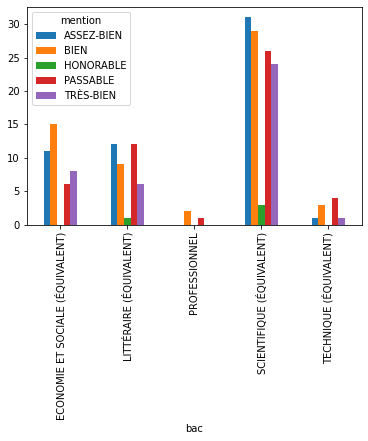

In [151]:
t = pd.crosstab(base_Ori_posbac.bac, base_Ori_posbac.mention)
t.plot.bar()

<AxesSubplot:xlabel='filière'>

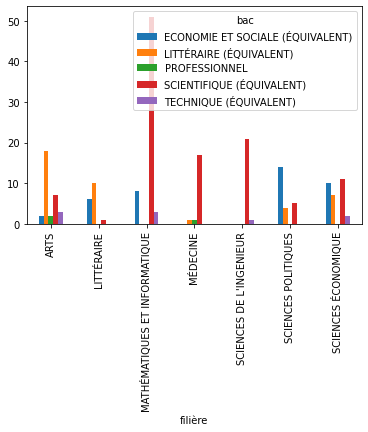

In [152]:
t = pd.crosstab(base_Ori_posbac.filière,base_Ori_posbac.bac)
t.plot.bar()

<AxesSubplot:xlabel='domaine_etu'>

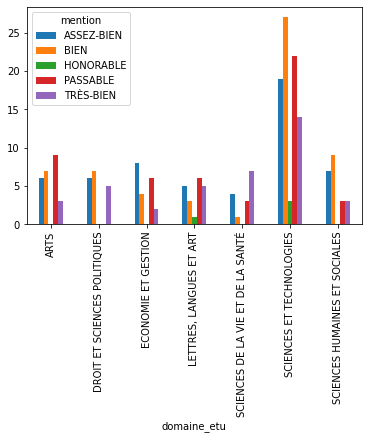

In [153]:
t = pd.crosstab(data_new8.domaine_etu,data_new2.mention)
t.plot.bar()

<AxesSubplot:xlabel='type_lieu_etu'>

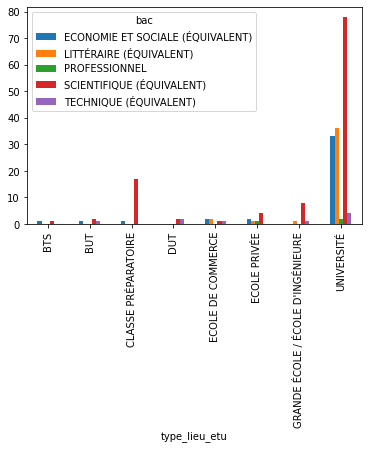

In [154]:
t = pd.crosstab(data_new8.type_lieu_etu,data_new3.bac)
t.plot.bar()

<AxesSubplot:xlabel='type_lieu_etu'>

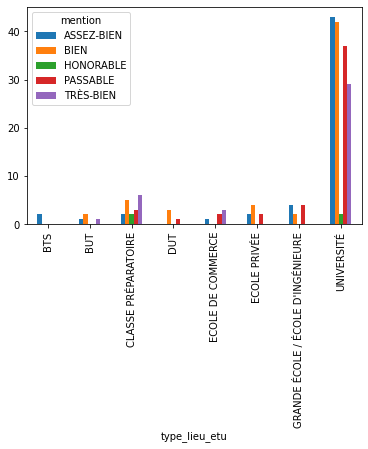

In [155]:
t = pd.crosstab(base_Ori_posbac.type_lieu_etu,base_Ori_posbac.mention)
t.plot.bar()

In [156]:
def pie_chart(df,nom_col,titre):    
    plt.figure()
    couleurs =  sns.color_palette('bright')
    df[nom_col].value_counts().plot(kind='pie',
                                              title=titre,

                                              autopct = '%0.0f%%', 
                                              colors = ["#EF553B", "#636EFA", "#00CC96" ])

    plt.show()

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

def pie_chart(df, nom_col, titre, couleurs=None):    
    plt.figure()

    if couleurs is None:
        couleurs = sns.color_palette('bright')

    valeurs = df[nom_col].value_counts()
    couleurs = sns.color_palette('bright', n_colors=len(valeurs))

    plt.pie(valeurs, labels=valeurs.index, autopct='%0.0f%%', colors=couleurs, startangle=90)

    plt.title(titre)
    plt.show()

# Exemple d'utilisation
# Supposons que vous ayez un DataFrame 'df' avec une colonne 'categories'
# pie_chart(df, 'categories', 'Répartition des catégories')


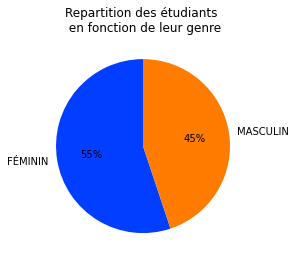

In [158]:
titre = "Repartition des étudiants \n en fonction de leur genre"
nom_col = 'genre'
pie_chart(base_Ori_posbac,nom_col,titre)

In [159]:
from collections import Counter

def dig_baton(sexe,domaine_etu):
    if sexe!="Féminin".upper() and sexe!="Masculin".upper() : 
        data_f = base_Ori_posbac
    else:
        data_f = base_Ori_posbac[data["genre"] == sexe]
    categories = data_f[domaine_etu]
    compteur = Counter(categories)
    categories = list(compteur.keys())
    frequences = list(compteur.values())
    genre = "Diagramme en Bâtons de domaine d'etude d'étudiants de sexe "+sexe
    plt.figure(figsize=(8, 6))  # Facultatif : définissez la taille du graphique

    plt.bar(categories, frequences, color='blue')  # Créez le diagramme en bâtons

    plt.xlabel("Domaine d'etude")  # Ajoutez une étiquette d'axe x
    plt.ylabel('Occurrences')  # Ajoutez une étiquette d'axe y
    plt.title(genre)  # Ajoutez un titre

    # Ajustez l'angle de rotation des étiquettes de l'axe x
    plt.xticks(rotation=90)  # Angle de rotation de 0 degré (horizontal)

    plt.show()  # Affichez le graphique


# Le domaine d'etude préféré des etudiants : 

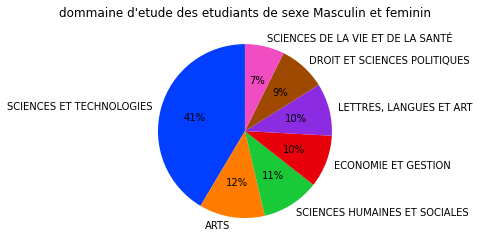

In [160]:
titre = "dommaine d'etude des etudiants de sexe Masculin et feminin"
nom_col = "domaine_etu"
pie_chart(base_Ori_posbac,nom_col,titre)

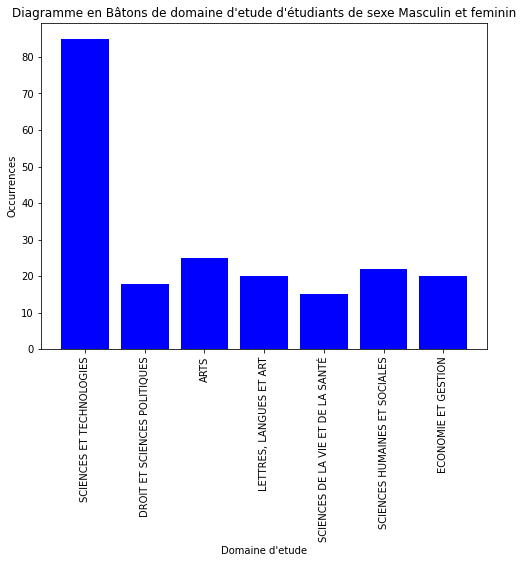

In [161]:
dig_baton("Masculin et feminin","domaine_etu")

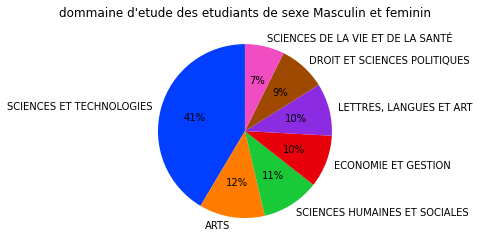

In [162]:
titre = "dommaine d'etude des etudiants de sexe Masculin et feminin"
nom_col = "domaine_etu"
pie_chart(base_Ori_posbac,nom_col,titre)

Text(0.5, 1.0, "Repartition du domaine d'etude en fonction du sexe de l'etudiant ")

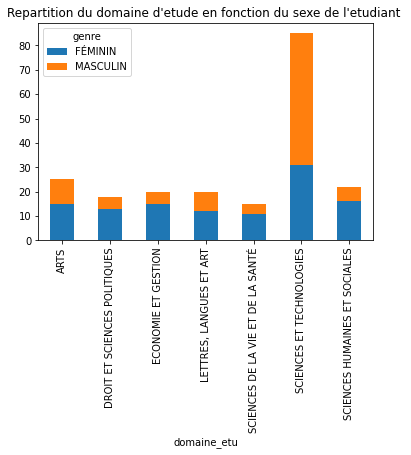

In [163]:
df_cross_tab = pd.crosstab(base_Ori_posbac.domaine_etu ,base_Ori_posbac.genre )
df_cross_tab.plot.bar(stacked = True)
plt.title("Repartition du domaine d'etude en fonction du sexe de l'etudiant ")

# Le domaine d'etude préféré des etudiants : 

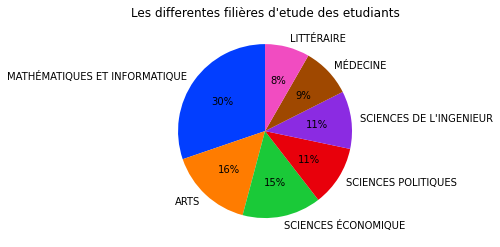

In [375]:
titre = "Les differentes filières d'etude des etudiants"
nom_col = "filière"
pie_chart(base_Ori_posbac,nom_col,titre)

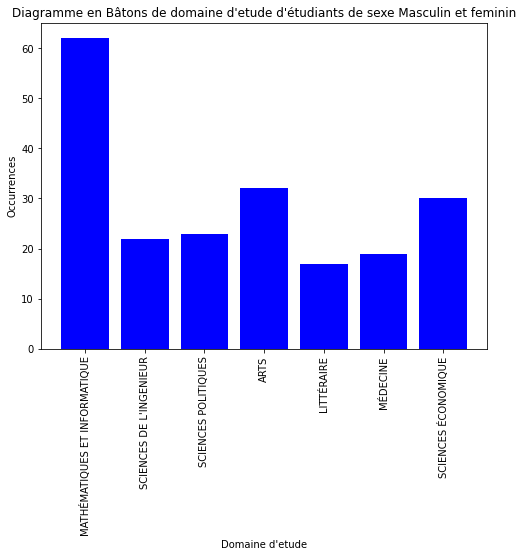

In [165]:
dig_baton("Masculin et feminin","filière")

In [166]:
#Le domaine d'etude préféré des etudiants de sexe Féminin

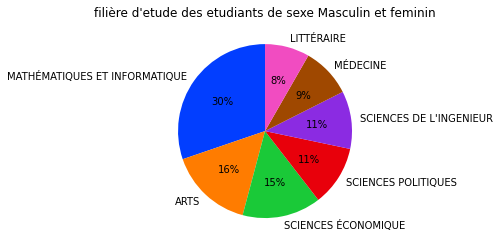

In [167]:
titre = "filière d'etude des etudiants de sexe Masculin et feminin"
nom_col = "filière"
pie_chart(base_Ori_posbac,nom_col,titre)

Text(0.5, 1.0, "Repartition des filières d'etude en fonction du sexe de l'etudiant ")

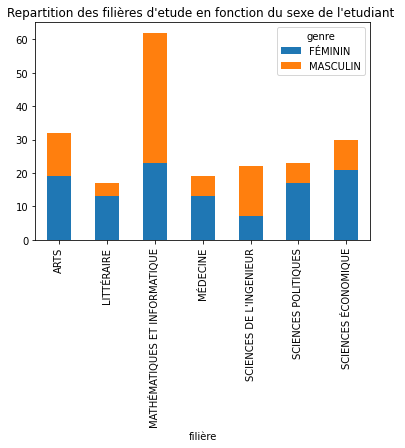

In [376]:
df_cross_tab = pd.crosstab(base_Ori_posbac.filière ,base_Ori_posbac.genre )
df_cross_tab.plot.bar(stacked = True)
plt.title("Repartition des filières d'etude en fonction du sexe de l'etudiant ")

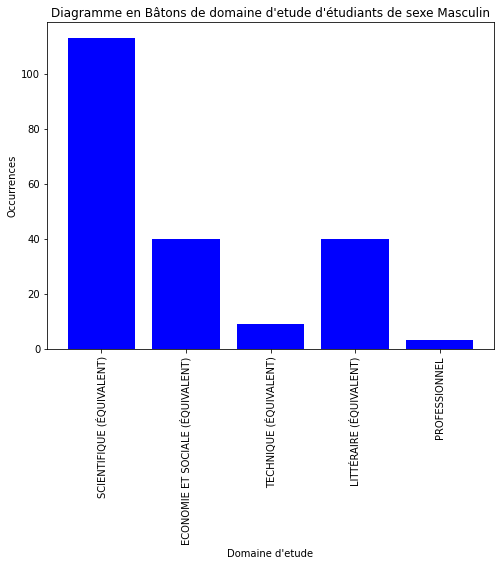

In [169]:
dig_baton("Masculin",'bac')

Text(0.5, 1.0, 'Repartition')

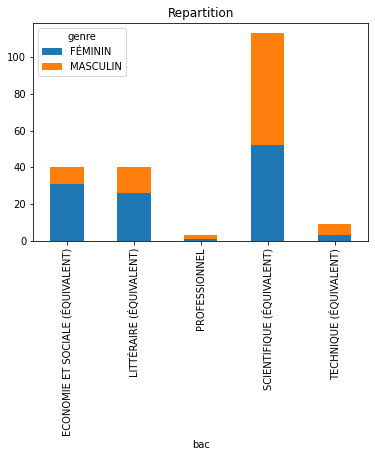

In [170]:
df_cross_tab = pd.crosstab(base_Ori_posbac.bac ,base_Ori_posbac.genre )
df_cross_tab.plot.bar(stacked = True)
plt.title("Repartition")

Text(0.5, 1.0, 'Repartition du status marital des employes  \n En fonction leurs nombres de compagnies')

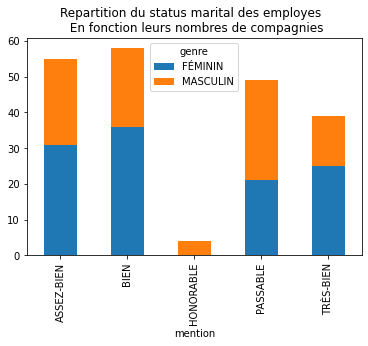

In [171]:
df_cross_tab = pd.crosstab(base_Ori_posbac.mention ,base_Ori_posbac.genre )
df_cross_tab.plot.bar(stacked = True)
plt.title("Repartition du status marital des employes  \n En fonction leurs nombres de compagnies")

Text(0.5, 1.0, 'Repartition du status marital des employes  \n En fonction leurs nombres de compagnies')

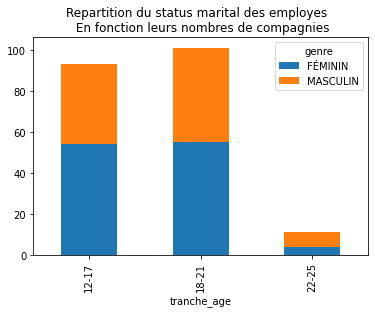

In [172]:
df_cross_tab = pd.crosstab(base_Ori_posbac.tranche_age ,base_Ori_posbac.genre )
df_cross_tab.plot.bar(stacked = True)
plt.title("Repartition du status marital des employes  \n En fonction leurs nombres de compagnies")

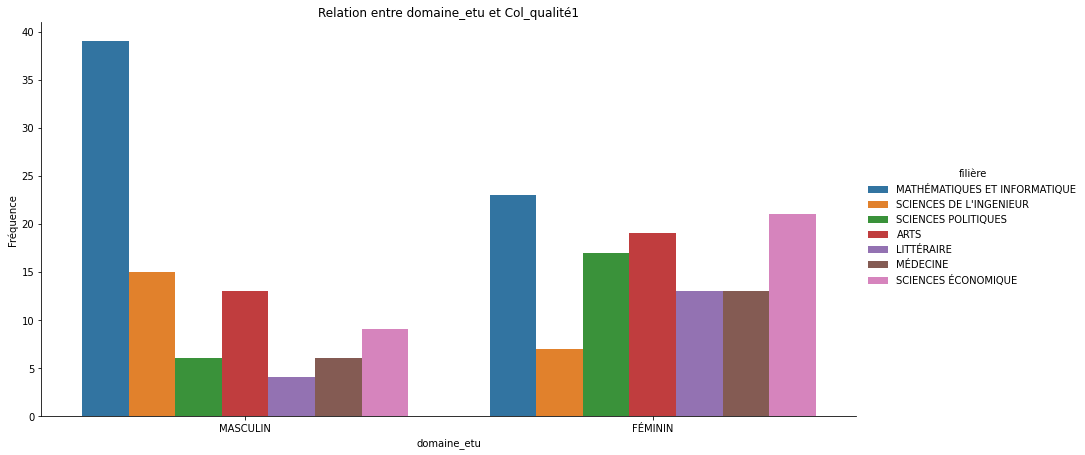

In [173]:
df = pd.DataFrame(data)

# Utilisez catplot pour visualiser le lien entre les deux variables
sns.catplot(x='genre', hue='filière', kind='count', data=base_Ori_posbac, height=6, aspect=2)
plt.title('Relation entre domaine_etu et Col_qualité1')
plt.xlabel('domaine_etu')
plt.ylabel('Fréquence')
plt.show()


In [174]:
base_Ori_posbac

,bac,mention,filière,type_etu,domaine_etu,type_lieu_etu,pays_bac,tranche_age,genre,Niveau_etu,type_cours,satisfact_formation,Col_specialite1,Col_specialite2,Col_matière_prefere1,Col_matière_prefere2,Col_domaine_activite_pro1
0,SCIENTIFIQUE (ÉQUIVALENT),ASSEZ-BIEN,MATHÉMATIQUES ET INFORMATIQUE,LONGUES (>= MASTER),SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,FRANCE,18-21,MASCULIN,MASTER,PRÉSENTIEL,OUI,MATHÉMATIQUES,PAS DE SPÉ,MATHÉMATIQUES,PHYSIQUE-CHIMIE (PC),DOMAINE DE LA DATA
1,SCIENTIFIQUE (ÉQUIVALENT),BIEN,MATHÉMATIQUES ET INFORMATIQUE,LONGUES (>= MASTER),SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,AFRIQUE,12-17,MASCULIN,MASTER,PRÉSENTIEL,OUI,MATHÉMATIQUES,PHYSIQUE-CHIMIE (PC),MATHÉMATIQUES,PHYSIQUE-CHIMIE (PC),ACTUAIRE
2,SCIENTIFIQUE (ÉQUIVALENT),HONORABLE,SCIENCES DE L'INGENIEUR,LONGUES (>= MASTER),SCIENCES ET TECHNOLOGIES,CLASSE PRÉPARATOIRE,FRANCE,12-17,MASCULIN,MASTER,PRÉSENTIEL,OUI,SCIENCES DE L'INGÉNIEUR,PAS DE SPÉ,MATHÉMATIQUES,PHYSIQUE-CHIMIE (PC),MATHS APPLIQUÉES
3,ECONOMIE ET SOCIALE (ÉQUIVALENT),ASSEZ-BIEN,MATHÉMATIQUES ET INFORMATIQUE,LONGUES (>= MASTER),SCIENCES ET TECHNOLOGIES,BUT,FRANCE,18-21,FÉMININ,BACHELOR,PRÉSENTIEL,OUI,SCIENCES ÉCONOMIQUES ET SOCIALES,HUMANITÉS,PHILOSOPHIE,ART,ÉDUCATION
4,SCIENTIFIQUE (ÉQUIVALENT),BIEN,SCIENCES POLITIQUES,LONGUES (>= MASTER),DROIT ET SCIENCES POLITIQUES,UNIVERSITÉ,FRANCE,12-17,MASCULIN,LICENCE,PRÉSENTIEL,OUI,MATHÉMATIQUES,PHYSIQUE-CHIMIE (PC),MATHÉMATIQUES,PHILOSOPHIE,ADMINISTRATION PUBLIQUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,SCIENTIFIQUE (ÉQUIVALENT),PASSABLE,MATHÉMATIQUES ET INFORMATIQUE,LONGUES (>= MASTER),SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,FRANCE,12-17,FÉMININ,LICENCE,PRÉSENTIEL,OUI,SCIENCES DE LA VIE ET DE LA TERRE (SVT),PAS DE SPÉ,MATHÉMATIQUES,SCIENCES DE LA VIE ET DE LA TERRE (SVT),DEVELOPPEUR
201,SCIENTIFIQUE (ÉQUIVALENT),BIEN,MATHÉMATIQUES ET INFORMATIQUE,LONGUES (>= MASTER),SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,TUNISIE,18-21,MASCULIN,MASTER,PRÉSENTIEL,OUI,MATHÉMATIQUES,SCIENCES ÉCONOMIQUES ET SOCIALES,MATHÉMATIQUES,SCIENCES ÉCONOMIQUES ET SOCIALES,DOMAINE DE LA DATA
202,SCIENTIFIQUE (ÉQUIVALENT),ASSEZ-BIEN,MATHÉMATIQUES ET INFORMATIQUE,LONGUES (>= MASTER),SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,COMORES,18-21,MASCULIN,MASTER,PRÉSENTIEL,OUI,MATHÉMATIQUES,PAS DE SPÉ,MATHÉMATIQUES,SCIENCES NUMÉRIQUES ET TECHNOLOGIE,DOMAINE DE LA DATA
203,SCIENTIFIQUE (ÉQUIVALENT),ASSEZ-BIEN,MATHÉMATIQUES ET INFORMATIQUE,LONGUES (>= MASTER),SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,FRANCE,18-21,FÉMININ,MASTER,PRÉSENTIEL,OUI,MATHÉMATIQUES,PAS DE SPÉ,MATHÉMATIQUES,SCIENCES NUMÉRIQUES ET TECHNOLOGIE,DÉVELOPPEMENT DE LOGICIELS


In [175]:
base_Ori_posbac["filière"].value_counts()

MATHÉMATIQUES ET INFORMATIQUE    62
ARTS                             32
SCIENCES ÉCONOMIQUE              30
SCIENCES POLITIQUES              23
SCIENCES DE L'INGENIEUR          22
MÉDECINE                         19
LITTÉRAIRE                       17
Name: filière, dtype: int64

In [176]:
#creation fichier csv
base_Ori_posbac.to_csv('Ori_posbac.csv', index=False)

In [177]:
import sqlite3
import pandas as pd

# Lire le fichier CSV dans un DataFrame
#df = pd.read_csv('votre_fichier.csv')

# Créer une connexion à la base de données SQLite
conn = sqlite3.connect('base_Ori_posbac.db')

# Écrire le DataFrame dans la base de données
base_Ori_posbac.to_sql('Ori_posbac', conn, index=False, if_exists='replace')

# Fermer la connexion
conn.close()

# Test de corelation :

In [178]:
base_Ori_posbac.type_etu

0      LONGUES (>= MASTER)
1      LONGUES (>= MASTER)
2      LONGUES (>= MASTER)
3      LONGUES (>= MASTER)
4      LONGUES (>= MASTER)
              ...         
200    LONGUES (>= MASTER)
201    LONGUES (>= MASTER)
202    LONGUES (>= MASTER)
203    LONGUES (>= MASTER)
204    LONGUES (>= MASTER)
Name: type_etu, Length: 205, dtype: object

In [179]:
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
import numpy as np

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

def test_independence(df):
    df = df.copy()
    results = []  # Liste pour stocker les résultats
    l = []
    # Sélectionner les colonnes catégorielles et numériques
    cat_columns = df.select_dtypes(include=["object"]).columns
    #num_columns = df.select_dtypes(include=["float64", "int64"]).columns

    # Test du chi2 pour les variables catégorielles
    for col1 in cat_columns:
        l.append(col1)
        for col2 in cat_columns:
            if col1 != col2 and col2 not in l:
                contingency_table = pd.crosstab(df[col1], df[col2])
                chi2, p_value, dof, expected = chi2_contingency(contingency_table)
                cramer_v = cramers_v(contingency_table.values)
                results.append({"Variable 1": col1, "Variable 2": col2, "Test": "Chi2", "P-value": p_value, "Cramer's V": cramer_v})

    # Créer un DataFrame à partir des résultats
    results_df = pd.DataFrame(results)
    return results_df

# Exemple d'utilisation avec un DataFrame 'df'
# Remplacez 'df' par votre propre DataFrame
results_dataframe = test_independence(base_Ori_posbac)
correlation = []
for pv in results_dataframe["P-value"]:
    if pv < 0.05:
        correlation.append("OUI")
    else:
        correlation.append("NON")

results_dataframe["INDEPENDANT"] = correlation
results_dataframe.head(27)


,Variable 1,Variable 2,Test,P-value,Cramer's V,INDEPENDANT
0,bac,mention,Chi2,7.463510e-01,0.000000,NON
1,bac,filière,Chi2,2.857531e-19,0.387688,OUI
2,bac,type_etu,Chi2,2.133107e-01,0.093843,NON
3,bac,domaine_etu,Chi2,1.703247e-17,0.371852,OUI
4,bac,type_lieu_etu,Chi2,6.944894e-04,0.193272,OUI
5,bac,pays_bac,Chi2,9.907212e-01,0.000000,NON
6,bac,tranche_age,Chi2,7.769440e-01,0.000000,NON
7,bac,genre,Chi2,3.352225e-03,0.239945,OUI
8,bac,Niveau_etu,Chi2,2.609561e-03,0.165784,OUI
9,bac,type_cours,Chi2,3.210904e-03,0.192748,OUI


In [180]:
#results_dataframe.loc[results_dataframe['correlation'] == "NON"]

non = trouve_ma_ligne(results_dataframe,'INDEPENDANT',"NON")
non.loc[non['Variable 1'] == "bac"]

,Variable 1,Variable 2,Test,P-value,Cramer's V,INDEPENDANT
0,bac,mention,Chi2,0.746351,0.000000,NON
2,bac,type_etu,Chi2,0.213311,0.093843,NON
5,bac,pays_bac,Chi2,0.990721,0.000000,NON
6,bac,tranche_age,Chi2,0.776944,0.000000,NON
10,bac,satisfact_formation,Chi2,0.110966,0.130935,NON
15,bac,Col_domaine_activite_pro1,Chi2,0.447571,0.037143,NON


In [181]:
l = ['bac', 'mention', 'filière','type_etu', 'domaine_etu', 'type_lieu_etu', 'pays_bac', 
      'tranche_age', 'genre', 'Niveau_etu','type_cours',
      'satisfact_formation','Col_specialite1', 'Col_specialite2',
      'Col_matière_prefere1', 'Col_matière_prefere2','Col_domaine_activite_pro1']

In [182]:
'Col_matière_prefere2','Col_specialite2'

('Col_matière_prefere2', 'Col_specialite2')

In [183]:
df = base_Ori_posbac[l]

In [184]:
# Description de la base de données
df.describe(include="all")

,bac,mention,filière,type_etu,domaine_etu,type_lieu_etu,pays_bac,tranche_age,genre,Niveau_etu,type_cours,satisfact_formation,Col_specialite1,Col_specialite2,Col_matière_prefere1,Col_matière_prefere2,Col_domaine_activite_pro1
count,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205
unique,5,5,7,2,7,8,19,3,2,6,3,2,11,13,11,12,83
top,SCIENTIFIQUE (ÉQUIVALENT),BIEN,MATHÉMATIQUES ET INFORMATIQUE,LONGUES (>= MASTER),SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,FRANCE,18-21,FÉMININ,LICENCE,PRÉSENTIEL,OUI,MATHÉMATIQUES,PAS DE SPÉ,MATHÉMATIQUES,NON RENSEIGNÉ,NON RENSEIGNÉ
freq,113,58,62,166,85,153,141,101,113,100,150,185,98,73,76,70,58


In [185]:
# Vérification des doublons

# Vérifier les doublons
duplicates = df.duplicated()
print(f"Nombre de lignes dupliquées : {duplicates.sum()}")



Nombre de lignes dupliquées : 0


# Analyses univariées

# Analyses bivariées

# Sélection des variables

In [186]:
l = ['bac', 'mention', 'filière','type_etu', 'domaine_etu', 'type_lieu_etu', 'pays_bac', 
      'tranche_age', 'genre', 'Niveau_etu','type_cours',
      'satisfact_formation','Col_specialite1', 'Col_specialite2',
      'Col_matière_prefere1', 'Col_matière_prefere2','Col_domaine_activite_pro1']



In [187]:
# Sélection des variables basée sur la variance
# columns = l
# Calculer la variance pour chaque caractéristique
# variances = np.var(df, axis=0)
# sorted_indices = np.argsort(variances)[::-1]

# Afficher la courbe des variances
# plt.figure(figsize=(15, 5))
# plt.bar(x=columns[sorted_indices], height=variances[sorted_indices])
# plt.xticks(rotation=90)
# plt.xlabel('Caractéristiques')
# plt.ylabel('Variance')
# plt.title('Sélection des caractéristiques basée sur la variance')
# plt.show()



# Les tests statistiques

In [188]:
import pandas as pd
from scipy.stats import chi2_contingency, ttest_ind

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Charger les données
data = base_Ori_posbac

# Sélectionner les variables d'intérêt
variables_catégorielles = l
variables_quantitatives = []

# Variable à expliquer
variable_expliquee = 'filière'

# Créer un DataFrame pour stocker les résultats des tests
resultats_test = pd.DataFrame(columns=['Variable_explicative', 'Statistique', 'P_value', 'Cramer_V', 'Interpretation'])

# Fonction pour interpréter la p-value
def interpreter_p_value(p_value):
    if p_value < 0.05:
        return 'Significatif'
    else:
        return 'Non significatif'

# Effectuer les tests pour les variables catégorielles (Chi2)
for var_explicative in variables_catégorielles:
    tableau_contingence = pd.crosstab(data[var_explicative], data[variable_expliquee])
    stat_chi2, p_value, dof, expected = chi2_contingency(tableau_contingence)
    cramer_v = cramers_v(tableau_contingence.values)
    interpretation = interpreter_p_value(p_value)
    resultats_test = resultats_test.append({
        'Variable_explicative': var_explicative,
        'Statistique': stat_chi2,
        'P_value': p_value,
        'Cramer_V': cramer_v,
        'Interpretation': interpretation
    }, ignore_index=True)

# Effectuer les tests pour les variables quantitatives (t-test)
for var_explicative in variables_quantitatives:
    groupe_1 = data[data[variable_expliquee] == 1][var_explicative]
    groupe_0 = data[data[variable_expliquee] == 0][var_explicative]
    stat_t, p_value = ttest_ind(groupe_1, groupe_0, equal_var=False)
    interpretation = interpreter_p_value(p_value)
    resultats_test = resultats_test.append({
        'Variable_explicative': var_explicative,
        'Statistique': stat_t,
        'P_value': p_value,
        'Cramer_V': 'N/A',  # Ajoutez le coefficient de Cramer pour les variables quantitatives si nécessaire
        'Interpretation': interpretation
    }, ignore_index=True)

# Afficher les résultats des tests
print("test d'indepence entre la variable à expliquer et les variables explicatives")
resultats_test


test d'indepence entre la variable à expliquer et les variables explicatives


,Variable_explicative,Statistique,P_value,Cramer_V,Interpretation
0,bac,144.948398,2.857531e-19,0.387688,Significatif
1,mention,30.851152,1.581210e-01,0.091520,Non significatif
2,filière,1230.000000,6.037476e-235,1.000000,Significatif
3,type_etu,6.495215,3.700568e-01,0.047785,Non significatif
4,domaine_etu,660.115337,8.823179e-116,0.722938,Significatif
5,type_lieu_etu,74.778196,1.381067e-03,0.165179,Significatif
6,pays_bac,136.660679,3.254362e-02,0.153506,Significatif
7,tranche_age,12.112609,4.366788e-01,0.011510,Non significatif
8,genre,23.664759,6.018340e-04,0.294024,Significatif
9,Niveau_etu,109.294081,5.993866e-11,0.281348,Significatif


In [189]:
from scipy.stats import chi2_contingency
# Sélectionner les variables catégorielles
df_new = df.drop(columns=['filière'])

cat_vars = list(df_new.columns)

# Initialiser les listes pour stocker les résultats
var_names = []
chi2_stats = []
p_values = []
cramer_vs = []

# Parcourir toutes les variables catégorielles
for var in cat_vars:
    # Calculer le tableau de contingence
    contingency_table = pd.crosstab(df['filière'], df_new[var])
    # Calculer la statistique de test du Chi-deux et la p-valeur
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    # Calculer le coefficient V de Cramer
    n = contingency_table.sum().sum()
    phi2 = chi2/n
    r,k = contingency_table.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rc = r-((r-1)**2)/(n-1)
    kc = k-((k-1)**2)/(n-1)
    cramer_v = np.sqrt(phi2corr/min(rc-1,kc-1))
    # Ajouter les résultats aux listes correspondantes
    var_names.append(var)
    chi2_stats.append(chi2)
    p_values.append(p)
    cramer_vs.append(cramer_v)

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame({
    'Variable': var_names,
    'Chi2': chi2_stats,
    'P-valeur': p_values,
    'V de Cramer': cramer_vs
})

# Trier le DataFrame par ordre croissant de V de Cramer
results_df.sort_values(by='V de Cramer', inplace=True,ascending=False)

# Afficher le tableau des résultats
print(results_df)

                     Variable        Chi2       P-valeur  V de Cramer
3                 domaine_etu  660.115337  8.823179e-116     0.722938
0                         bac  144.948398   2.857531e-19     0.387688
13       Col_matière_prefere1  227.189785   2.828412e-21     0.373897
14       Col_matière_prefere2  198.640066   3.287200e-15     0.332918
15  Col_domaine_activite_pro1  618.958335   8.343565e-05     0.322995
11            Col_specialite1  175.258871   3.194383e-13     0.310322
12            Col_specialite2  183.098179   1.227832e-11     0.304574
7                       genre   23.664759   6.018340e-04     0.294024
8                  Niveau_etu  109.294081   5.993866e-11     0.281348
4               type_lieu_etu   74.778196   1.381067e-03     0.165179
5                    pays_bac  136.660679   3.254362e-02     0.153506
10        satisfact_formation    9.076927   1.692978e-01     0.122226
1                     mention   30.851152   1.581210e-01     0.091520
2                   

Les variables qui expliques la variable cible (filière):

Les variable qui n'explique pas la variable cible (filière):

In [190]:
from scipy.stats import chi2_contingency

# Initialiser les DataFrame pour les coefficients de Cramér et les p-values
cramer_v_df = pd.DataFrame(index=categorical_columns, columns=categorical_columns)
p_value_df = pd.DataFrame(index=categorical_columns, columns=categorical_columns)
tschuprow_t_df = pd.DataFrame(index=categorical_columns, columns=categorical_columns)


# Calculer le test de chi-deux pour chaque paire de variables qualitatives
for i, column1 in enumerate(categorical_columns):
    for j, column2 in enumerate(categorical_columns):
        if column1 != column2:
            contingency_table = pd.crosstab(df[column1], df[column2])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            cramer_v = np.sqrt(chi2 / (df.shape[0] * (min(contingency_table.shape) - 1)))
            tschuprow_t = cramer_v * np.sqrt((contingency_table.shape[0] - 1) * (contingency_table.shape[1] - 1) / (df.shape[0] - 1))
            cramer_v_df.loc[column1, column2] = cramer_v
            tschuprow_t_df.loc[column1, column2] = tschuprow_t
            p_value_df.loc[column1, column2] = p

            
# Afficher la DataFrame des p-values
print("\nDataFrame des p-values :")
p_value_df.style.set_properties(**{'border-color': 'black', 'border-width': '1px', 'border-style': 'solid'})           



NameError: name 'categorical_columns' is not defined

In [191]:
# Afficher la DataFrame des coefficients de Cramér
print("DataFrame des coefficients de Cramér :")
cramer_v_df.style.background_gradient(cmap='Greens', high=0.4, low=0).set_properties(**{'border-color': 'black', 'border-width': '1px', 'border-style': 'solid'})

DataFrame des coefficients de Cramér :


NameError: name 'cramer_v_df' is not defined

In [192]:
# Afficher la DataFrame des coefficients de Tchuprow
print("\nDataFrame des coefficients de Tchuprow :")
tschuprow_t_df.style.background_gradient(cmap='Greens', high=0.4, low=0).set_properties(**{'border-color': 'black', 'border-width': '1px', 'border-style': 'solid'})




DataFrame des coefficients de Tchuprow :


NameError: name 'tschuprow_t_df' is not defined

# V - Modélisation des données 
Création des modèles prédictifs précis

In [257]:
var_retuenues = ['bac', 'filière' , 'domaine_etu', 'type_lieu_etu', 'pays_bac', 
       'genre', 'Niveau_etu','Col_specialite1','Col_specialite2','Col_matière_prefere2',
      'Col_matière_prefere1', "Col_domaine_activite_pro1"]

# 'satisfact_formation' , 'mention','type_etu','tranche_age',,'type_cours'
df = base_Ori_posbac[var_retuenues]

In [258]:
df

,bac,filière,domaine_etu,type_lieu_etu,pays_bac,genre,Niveau_etu,Col_specialite1,Col_specialite2,Col_matière_prefere2,Col_matière_prefere1,Col_domaine_activite_pro1
0,SCIENTIFIQUE (ÉQUIVALENT),MATHÉMATIQUES ET INFORMATIQUE,SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,FRANCE,MASCULIN,MASTER,MATHÉMATIQUES,PAS DE SPÉ,PHYSIQUE-CHIMIE (PC),MATHÉMATIQUES,DOMAINE DE LA DATA
1,SCIENTIFIQUE (ÉQUIVALENT),MATHÉMATIQUES ET INFORMATIQUE,SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,AFRIQUE,MASCULIN,MASTER,MATHÉMATIQUES,PHYSIQUE-CHIMIE (PC),PHYSIQUE-CHIMIE (PC),MATHÉMATIQUES,ACTUAIRE
2,SCIENTIFIQUE (ÉQUIVALENT),SCIENCES DE L'INGENIEUR,SCIENCES ET TECHNOLOGIES,CLASSE PRÉPARATOIRE,FRANCE,MASCULIN,MASTER,SCIENCES DE L'INGÉNIEUR,PAS DE SPÉ,PHYSIQUE-CHIMIE (PC),MATHÉMATIQUES,MATHS APPLIQUÉES
3,ECONOMIE ET SOCIALE (ÉQUIVALENT),MATHÉMATIQUES ET INFORMATIQUE,SCIENCES ET TECHNOLOGIES,BUT,FRANCE,FÉMININ,BACHELOR,SCIENCES ÉCONOMIQUES ET SOCIALES,HUMANITÉS,ART,PHILOSOPHIE,ÉDUCATION
4,SCIENTIFIQUE (ÉQUIVALENT),SCIENCES POLITIQUES,DROIT ET SCIENCES POLITIQUES,UNIVERSITÉ,FRANCE,MASCULIN,LICENCE,MATHÉMATIQUES,PHYSIQUE-CHIMIE (PC),PHILOSOPHIE,MATHÉMATIQUES,ADMINISTRATION PUBLIQUE
...,...,...,...,...,...,...,...,...,...,...,...,...
200,SCIENTIFIQUE (ÉQUIVALENT),MATHÉMATIQUES ET INFORMATIQUE,SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,FRANCE,FÉMININ,LICENCE,SCIENCES DE LA VIE ET DE LA TERRE (SVT),PAS DE SPÉ,SCIENCES DE LA VIE ET DE LA TERRE (SVT),MATHÉMATIQUES,DEVELOPPEUR
201,SCIENTIFIQUE (ÉQUIVALENT),MATHÉMATIQUES ET INFORMATIQUE,SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,TUNISIE,MASCULIN,MASTER,MATHÉMATIQUES,SCIENCES ÉCONOMIQUES ET SOCIALES,SCIENCES ÉCONOMIQUES ET SOCIALES,MATHÉMATIQUES,DOMAINE DE LA DATA
202,SCIENTIFIQUE (ÉQUIVALENT),MATHÉMATIQUES ET INFORMATIQUE,SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,COMORES,MASCULIN,MASTER,MATHÉMATIQUES,PAS DE SPÉ,SCIENCES NUMÉRIQUES ET TECHNOLOGIE,MATHÉMATIQUES,DOMAINE DE LA DATA
203,SCIENTIFIQUE (ÉQUIVALENT),MATHÉMATIQUES ET INFORMATIQUE,SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,FRANCE,FÉMININ,MASTER,MATHÉMATIQUES,PAS DE SPÉ,SCIENCES NUMÉRIQUES ET TECHNOLOGIE,MATHÉMATIQUES,DÉVELOPPEMENT DE LOGICIELS


one-hot-encoding

In [259]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Liste des colonnes ordinale à encoder
colonnes_ordinale = ["Niveau_etu"]

df_encoded_ord =df[colonnes_ordinale]
# Liste des colonnes ordinales à encoder
colonnes_ordinale = df_encoded_ord.select_dtypes(include=['object']).columns

# Initialiser l'encodeur ordinal

encoder = OrdinalEncoder()

# Appliquer l'encodage sur toutes les colonnes ordinales
df_encoded_ord[colonnes_ordinale] = encoder.fit_transform(df[colonnes_ordinale])

# Afficher le résultat
df_encoded_ord

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3072: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3037: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

,Niveau_etu
0,5.0
1,5.0
2,5.0
3,1.0
4,4.0
...,...
200,4.0
201,5.0
202,5.0
203,5.0


# Variable Nominale

In [260]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

colonnes_nominale = ['bac', 'type_lieu_etu','genre','domaine_etu',
      'Col_specialite1','Col_specialite2','Col_matière_prefere1',
      'Col_matière_prefere2',"Col_domaine_activite_pro1"]
# Liste des colonnes nominales à encoder
#colonnes_nominale = df.select_dtypes(include=['object']).columns
dn =df[colonnes_nominale]
# Conversion des variables catégorielles en variables indicatrices
df_encoded_nom = pd.get_dummies(dn, columns=colonnes_nominale,drop_first=True)
df_encoded_nom 

,bac_LITTÉRAIRE (ÉQUIVALENT),bac_PROFESSIONNEL,bac_SCIENTIFIQUE (ÉQUIVALENT),bac_TECHNIQUE (ÉQUIVALENT),type_lieu_etu_BUT,type_lieu_etu_CLASSE PRÉPARATOIRE,type_lieu_etu_DUT,type_lieu_etu_ECOLE DE COMMERCE,type_lieu_etu_ECOLE PRIVÉE,type_lieu_etu_GRANDE ÉCOLE / ÉCOLE D'INGÉNIEURE,...,Col_domaine_activite_pro1_SYSTÈMES EMBARQUÉS,Col_domaine_activite_pro1_TECHNIQUE,Col_domaine_activite_pro1_TOURISME,Col_domaine_activite_pro1_TRADUCTION,Col_domaine_activite_pro1_TRAITEMENTS DE DONNÉES,Col_domaine_activite_pro1_URBANISME,Col_domaine_activite_pro1_VOYAGE,Col_domaine_activite_pro1_ÉCOLOGIE,Col_domaine_activite_pro1_ÉDITION,Col_domaine_activite_pro1_ÉDUCATION
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
202,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
203,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [261]:
# Encodage de la variable cible avec LabelEncoder


In [262]:
from sklearn.preprocessing import LabelEncoder
# Encodage de la variable cible avec LabelEncoder
label_encoder = LabelEncoder()
df_encoded_nom['filière'] = label_encoder.fit_transform(df['filière'])
#df_encoded("Col_specialite2", axis=1)
df_encoded_nom 

,bac_LITTÉRAIRE (ÉQUIVALENT),bac_PROFESSIONNEL,bac_SCIENTIFIQUE (ÉQUIVALENT),bac_TECHNIQUE (ÉQUIVALENT),type_lieu_etu_BUT,type_lieu_etu_CLASSE PRÉPARATOIRE,type_lieu_etu_DUT,type_lieu_etu_ECOLE DE COMMERCE,type_lieu_etu_ECOLE PRIVÉE,type_lieu_etu_GRANDE ÉCOLE / ÉCOLE D'INGÉNIEURE,...,Col_domaine_activite_pro1_TECHNIQUE,Col_domaine_activite_pro1_TOURISME,Col_domaine_activite_pro1_TRADUCTION,Col_domaine_activite_pro1_TRAITEMENTS DE DONNÉES,Col_domaine_activite_pro1_URBANISME,Col_domaine_activite_pro1_VOYAGE,Col_domaine_activite_pro1_ÉCOLOGIE,Col_domaine_activite_pro1_ÉDITION,Col_domaine_activite_pro1_ÉDUCATION,filière
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
201,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
202,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
203,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [386]:
df_encoded = pd.concat([df_encoded_ord, df_encoded_nom], axis=1)
df_encoded

,Niveau_etu,bac_LITTÉRAIRE (ÉQUIVALENT),bac_PROFESSIONNEL,bac_SCIENTIFIQUE (ÉQUIVALENT),bac_TECHNIQUE (ÉQUIVALENT),type_lieu_etu_BUT,type_lieu_etu_CLASSE PRÉPARATOIRE,type_lieu_etu_DUT,type_lieu_etu_ECOLE DE COMMERCE,type_lieu_etu_ECOLE PRIVÉE,...,Col_domaine_activite_pro1_TECHNIQUE,Col_domaine_activite_pro1_TOURISME,Col_domaine_activite_pro1_TRADUCTION,Col_domaine_activite_pro1_TRAITEMENTS DE DONNÉES,Col_domaine_activite_pro1_URBANISME,Col_domaine_activite_pro1_VOYAGE,Col_domaine_activite_pro1_ÉCOLOGIE,Col_domaine_activite_pro1_ÉDITION,Col_domaine_activite_pro1_ÉDUCATION,filière
0,5.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,5.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,5.0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,1.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
4,4.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,4.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
201,5.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
202,5.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
203,5.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [392]:
df_encoded[:1]

,Niveau_etu,bac_LITTÉRAIRE (ÉQUIVALENT),bac_PROFESSIONNEL,bac_SCIENTIFIQUE (ÉQUIVALENT),bac_TECHNIQUE (ÉQUIVALENT),type_lieu_etu_BUT,type_lieu_etu_CLASSE PRÉPARATOIRE,type_lieu_etu_DUT,type_lieu_etu_ECOLE DE COMMERCE,type_lieu_etu_ECOLE PRIVÉE,...,Col_domaine_activite_pro1_TECHNIQUE,Col_domaine_activite_pro1_TOURISME,Col_domaine_activite_pro1_TRADUCTION,Col_domaine_activite_pro1_TRAITEMENTS DE DONNÉES,Col_domaine_activite_pro1_URBANISME,Col_domaine_activite_pro1_VOYAGE,Col_domaine_activite_pro1_ÉCOLOGIE,Col_domaine_activite_pro1_ÉDITION,Col_domaine_activite_pro1_ÉDUCATION,filière


In [200]:
# Importer les bibliothèques nécessaires
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import zero_one_loss
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import math
import re

In [395]:
X = df_encoded.drop('filière', axis=1)
y = df_encoded['filière']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 RandomForest

In [202]:
rf_classifier = RandomForestClassifier(criterion="gini")
#rf_classifier.fit(X_train, y_train)

l = [50, 100, 150, 200,250,300,350,400,450,500]
param_grid = ({"n_estimators":l})
gs = GridSearchCV(rf_classifier,param_grid,cv = 3,scoring = "accuracy")
gs.fit(X_train, y_train )

n=list(gs.cv_results_['rank_test_score'])
index_n=n.index(min(n))
n_est= list(gs.cv_results_['param_n_estimators'])
n_est=n_est[index_n]
n_est


500

In [330]:
clf3 = RandomForestClassifier(n_estimators=50,criterion="gini")
clf3.fit(X_train, y_train)

y_pred_test = clf3.predict(X_test)
y_pred_train = clf3.predict(X_train)


In [331]:
err_em = zero_one_loss(y_train, y_pred_train)
err_g = zero_one_loss(y_test, y_pred_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_em = accuracy_score(y_train, y_pred_train)

print("Accuracy empirique :", accuracy_em)
print("Erreur empirique :", err_em)
print("Accuracy en généralisation :", accuracy_test)
print("Erreur en généralisation :",err_g)

Accuracy empirique : 1.0
Erreur empirique : 0.0
Accuracy en généralisation : 0.5853658536585366
Erreur en généralisation : 0.41463414634146345


In [297]:
# Inversement de l'encodage des prédictions
y_pred_decoded = label_encoder.inverse_transform(y_pred_test)
y_pred_decoded

array(['ARTS', 'ARTS', 'MATHÉMATIQUES ET INFORMATIQUE',
       'SCIENCES ÉCONOMIQUE', 'MATHÉMATIQUES ET INFORMATIQUE',
       'SCIENCES POLITIQUES', 'MATHÉMATIQUES ET INFORMATIQUE',
       'SCIENCES ÉCONOMIQUE', 'ARTS', 'MATHÉMATIQUES ET INFORMATIQUE',
       'MATHÉMATIQUES ET INFORMATIQUE', 'SCIENCES ÉCONOMIQUE',
       'MATHÉMATIQUES ET INFORMATIQUE', 'SCIENCES ÉCONOMIQUE',
       'MATHÉMATIQUES ET INFORMATIQUE', 'MATHÉMATIQUES ET INFORMATIQUE',
       'ARTS', 'MATHÉMATIQUES ET INFORMATIQUE', 'SCIENCES POLITIQUES',
       'ARTS', "SCIENCES DE L'INGENIEUR", 'MATHÉMATIQUES ET INFORMATIQUE',
       'SCIENCES POLITIQUES', 'MATHÉMATIQUES ET INFORMATIQUE', 'ARTS',
       'LITTÉRAIRE', 'SCIENCES ÉCONOMIQUE', 'SCIENCES ÉCONOMIQUE',
       "SCIENCES DE L'INGENIEUR", 'LITTÉRAIRE',
       'MATHÉMATIQUES ET INFORMATIQUE', 'SCIENCES ÉCONOMIQUE', 'MÉDECINE',
       'MATHÉMATIQUES ET INFORMATIQUE', 'MATHÉMATIQUES ET INFORMATIQUE',
       'LITTÉRAIRE', 'ARTS', 'MATHÉMATIQUES ET INFORMATIQUE',
      

['RandomForest.pkl']

KNN

In [207]:
def erreur_emp_ge_knn(k,Xtrain,ytrain,Xtest,ytest):
    #importation du module de moèle qu'on veut appliquer sur nos donnnee
    from sklearn import neighbors

    # importation du module qui permet de calculer l'erreur empirique de generalisation
    from sklearn.metrics import mean_squared_error

    # definition du moèle
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)

    #Entrainement du modèle
    knn.fit(Xtrain, ytrain)

    # Prediction sur les donnés d'entrainement
    y_pred_train = knn.predict(Xtrain)
    # Prediction sur les données de test
    y_pred_test = knn.predict(Xtest)

    # Calcule de l'erreur empirique
    err_em = mean_squared_error(ytrain, y_pred_train)
    # Calcule de l'erreur de generalisation
    err_g = mean_squared_error(ytest, y_pred_test)

    err=list((err_em,err_g))
    return err

In [208]:
def data_err_reg_val(k):
    l_err_em=[]
    l_err_g=[]
    k_val=list(range(3,k+1))
    for d in range(3,k+1):
        erreur=erreur_emp_ge_knn(d,X_train,y_train,X_test,y_test)
        l_err_em.append(erreur[0])
        l_err_g.append(erreur[1])
        #d_val.append(d)

    dico_err = {'k':k_val,"Erreur_empirique":l_err_em,
                'Erreur_de_generalisation':l_err_g}
    data_err=pd.DataFrame(data=dico_err)
    return data_err

In [209]:
data_erreurs = data_err_reg_val(164)

<AxesSubplot:xlabel='k'>

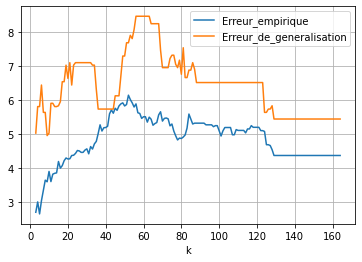

In [210]:
data_erreurs.plot(x="k",grid=True)

In [211]:
d_val = data_erreurs.k
d_val[np.argmin(data_erreurs.Erreur_de_generalisation)]

9

In [212]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred_test = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

# Calcule de l'erreur empirique
err_em = zero_one_loss(y_train, y_pred_train)
# Calcule de l'erreur de generalisation
err_g = zero_one_loss(y_test, y_pred_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_em = accuracy_score(y_train, y_pred_train)
print("Accuracy empirique :", accuracy_em)
print("Erreur empirique :", err_em)
print("Accuracy en généralisation :", accuracy_test)
print("Erreur en généralisation :",err_g)

Accuracy empirique : 0.6707317073170732
Erreur empirique : 0.3292682926829268
Accuracy en généralisation : 0.5365853658536586
Erreur en généralisation : 0.46341463414634143


# Regression lineaire

In [328]:
clf = LogisticRegression(penalty='l2',)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [329]:
# Évaluation du modèle
err_test = zero_one_loss(y_test, y_pred_test)
err_emp = zero_one_loss(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"erreur train du modèle : {err_emp}")
print(f"Précision train du modèle : {accuracy_train}")
print("")
print(f"erreur test du modèle : {err_test}")
print(f"Précision test du modèle : {accuracy_test}")


erreur train du modèle : 0.030487804878048808
Précision train du modèle : 0.9695121951219512

erreur test du modèle : 0.3414634146341463
Précision test du modèle : 0.6585365853658537


In [270]:
import joblib

# Save both the model and encoding objects
joblib.dump((model,encoder, label_encoder), 'RandomForest.pkl')



In [267]:
pd.concat([df2, df])

,bac,domaine_etu,type_lieu_etu,genre,Niveau_etu,Col_specialite1,Col_specialite2,Col_matière_prefere2,Col_matière_prefere1,Col_domaine_activite_pro1,filière,pays_bac
0,SCIENTIFIQUE (ÉQUIVALENT),SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,MASCULIN,MASTER,MATHÉMATIQUES,PAS DE SPÉ,SCIENCES NUMÉRIQUES ET TECHNOLOGIE,MATHÉMATIQUES,DOMAINE DE LA DATA,NaN,NaN
0,SCIENTIFIQUE (ÉQUIVALENT),SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,MASCULIN,MASTER,MATHÉMATIQUES,PAS DE SPÉ,PHYSIQUE-CHIMIE (PC),MATHÉMATIQUES,DOMAINE DE LA DATA,MATHÉMATIQUES ET INFORMATIQUE,FRANCE
1,SCIENTIFIQUE (ÉQUIVALENT),SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,MASCULIN,MASTER,MATHÉMATIQUES,PHYSIQUE-CHIMIE (PC),PHYSIQUE-CHIMIE (PC),MATHÉMATIQUES,ACTUAIRE,MATHÉMATIQUES ET INFORMATIQUE,AFRIQUE
2,SCIENTIFIQUE (ÉQUIVALENT),SCIENCES ET TECHNOLOGIES,CLASSE PRÉPARATOIRE,MASCULIN,MASTER,SCIENCES DE L'INGÉNIEUR,PAS DE SPÉ,PHYSIQUE-CHIMIE (PC),MATHÉMATIQUES,MATHS APPLIQUÉES,SCIENCES DE L'INGENIEUR,FRANCE
3,ECONOMIE ET SOCIALE (ÉQUIVALENT),SCIENCES ET TECHNOLOGIES,BUT,FÉMININ,BACHELOR,SCIENCES ÉCONOMIQUES ET SOCIALES,HUMANITÉS,ART,PHILOSOPHIE,ÉDUCATION,MATHÉMATIQUES ET INFORMATIQUE,FRANCE
...,...,...,...,...,...,...,...,...,...,...,...,...
200,SCIENTIFIQUE (ÉQUIVALENT),SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,FÉMININ,LICENCE,SCIENCES DE LA VIE ET DE LA TERRE (SVT),PAS DE SPÉ,SCIENCES DE LA VIE ET DE LA TERRE (SVT),MATHÉMATIQUES,DEVELOPPEUR,MATHÉMATIQUES ET INFORMATIQUE,FRANCE
201,SCIENTIFIQUE (ÉQUIVALENT),SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,MASCULIN,MASTER,MATHÉMATIQUES,SCIENCES ÉCONOMIQUES ET SOCIALES,SCIENCES ÉCONOMIQUES ET SOCIALES,MATHÉMATIQUES,DOMAINE DE LA DATA,MATHÉMATIQUES ET INFORMATIQUE,TUNISIE
202,SCIENTIFIQUE (ÉQUIVALENT),SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,MASCULIN,MASTER,MATHÉMATIQUES,PAS DE SPÉ,SCIENCES NUMÉRIQUES ET TECHNOLOGIE,MATHÉMATIQUES,DOMAINE DE LA DATA,MATHÉMATIQUES ET INFORMATIQUE,COMORES
203,SCIENTIFIQUE (ÉQUIVALENT),SCIENCES ET TECHNOLOGIES,UNIVERSITÉ,FÉMININ,MASTER,MATHÉMATIQUES,PAS DE SPÉ,SCIENCES NUMÉRIQUES ET TECHNOLOGIE,MATHÉMATIQUES,DÉVELOPPEMENT DE LOGICIELS,MATHÉMATIQUES ET INFORMATIQUE,FRANCE


In [348]:
df1 = df 
def model(data):
    # Liste des colonnes ordinale à encoder
    df = pd.concat([data, df1])
    colonnes_ordinale = ["Niveau_etu"]

    df_encoded_ord =df[colonnes_ordinale]
    # Liste des colonnes ordinales à encoder
    colonnes_ordinale = df_encoded_ord.select_dtypes(include=['object']).columns

    # Initialiser l'encodeur ordinal

    encoder = OrdinalEncoder()

    # Appliquer l'encodage sur toutes les colonnes ordinales
    df_encoded_ord[colonnes_ordinale] = encoder.fit_transform(df[colonnes_ordinale])

    




    colonnes_nominale = ['bac', 'type_lieu_etu','genre','domaine_etu',
          'Col_specialite1','Col_specialite2','Col_matière_prefere1',
          'Col_matière_prefere2',"Col_domaine_activite_pro1"]
    # Liste des colonnes nominales à encoder
    #colonnes_nominale = df.select_dtypes(include=['object']).columns
    dn =df[colonnes_nominale]
    # Conversion des variables catégorielles en variables indicatrices
    df_encoded_nom = pd.get_dummies(dn, columns=colonnes_nominale,drop_first=True)
    df_encoded_nom 




    from sklearn.preprocessing import LabelEncoder
    # Encodage de la variable cible avec LabelEncoder
    label_encoder = LabelEncoder()
    #df_encoded_nom['filière'] = label_encoder.fit_transform(df['filière'])
    #df_encoded("Col_specialite2", axis=1)
    
    
    
    df_encoded = pd.concat([df_encoded_ord, df_encoded_nom], axis=1)

    ind = df_encoded.head(1)
    
    
    y_pred_test = clf.predict(ind)
    label_encoder.fit(df['filière'])
    y_pred_decoded = label_encoder.inverse_transform(y_pred_test)
    
    return y_pred_decoded[0]

In [347]:
model(df2)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3072: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3037: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

,Niveau_etu,bac_LITTÉRAIRE (ÉQUIVALENT),bac_PROFESSIONNEL,bac_SCIENTIFIQUE (ÉQUIVALENT),bac_TECHNIQUE (ÉQUIVALENT),type_lieu_etu_BUT,type_lieu_etu_CLASSE PRÉPARATOIRE,type_lieu_etu_DUT,type_lieu_etu_ECOLE DE COMMERCE,type_lieu_etu_ECOLE PRIVÉE,...,Col_domaine_activite_pro1_SYSTÈMES EMBARQUÉS,Col_domaine_activite_pro1_TECHNIQUE,Col_domaine_activite_pro1_TOURISME,Col_domaine_activite_pro1_TRADUCTION,Col_domaine_activite_pro1_TRAITEMENTS DE DONNÉES,Col_domaine_activite_pro1_URBANISME,Col_domaine_activite_pro1_VOYAGE,Col_domaine_activite_pro1_ÉCOLOGIE,Col_domaine_activite_pro1_ÉDITION,Col_domaine_activite_pro1_ÉDUCATION
0,1.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,5.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5.0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,4.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201,5.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
202,5.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
203,5.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [217]:
import tkinter as tk
from tkinter import ttk



In [8]:

# Création de la fenêtre
fenetre = tk.Tk()

# Fonction à appeler lorsque l'option sélectionnée change
def option_selectionnee(event):
    valeur_selectionnee = combo.get()
    print("Option sélectionnée :", valeur_selectionnee)

# Création de la liste déroulante
options = ['bac','domaine_etu', 'type_lieu_etu', 'pays_bac', 
       'genre', 'Niveau_etu','Col_specialite1','Col_specialite2','Col_matière_prefere2',
      'Col_matière_prefere1', "Col_domaine_activite_pro1"]
combo = ttk.Combobox(fenetre, values=options)
combo.bind("<<ComboboxSelected>>", option_selectionnee)
combo.pack()

# Affichage de la fenêtre
fenetre.mainloop()

Option sélectionnée : type_lieu_etu


In [9]:
l = []
c= fenetre.mainloop()
l.append(c)

In [14]:

import pandas as pd
import tkinter as tk
from tkinter import ttk

# Fonction pour créer le DataFrame à partir de la sélection
def create_dataframe():
    # Récupérer les valeurs sélectionnées
    selected_values = [combo1.get(), combo2.get(), combo3.get(), combo4.get(), combo5.get(), combo6.get(), combo7.get(),combo8.get()]

    # Créer un dictionnaire avec les colonnes et les valeurs sélectionnées
    data = {
        'Colonne 1': [selected_values[0]],
        'Colonne 2': [selected_values[1]],
        'Colonne 3': [selected_values[2]],
        'Colonne 4': [selected_values[3]],
        'Colonne 5': [selected_values[4]],
        'Colonne 6': [selected_values[5]],
        'Colonne 7': [selected_values[6]],
        'Colonne 8': [selected_values[7]]
    }

    # Créer le DataFrame à partir du dictionnaire
    df = pd.DataFrame(data)
    print(df)

# Création de la fenêtre
window = tk.Tk()

# Liste des options pour les listes déroulantes
options = ['bac','domaine_etu', 'type_lieu_etu', 'pays_bac', 
       'genre', 'Niveau_etu','Col_specialite1','Col_specialite2','Col_matière_prefere2',
      'Col_matière_prefere1', "Col_domaine_activite_pro1"]

# Création des listes déroulantes
combo1 = ttk.Combobox(window, values=options)
combo1.pack()

combo2 = ttk.Combobox(window, values=options)
combo2.pack()

combo3 = ttk.Combobox(window, values=options)
combo3.pack()

combo4 = ttk.Combobox(window, values=options)
combo4.pack()

combo5 = ttk.Combobox(window, values=options)
combo5.pack()

combo6 = ttk.Combobox(window, values=options)
combo6.pack()

combo7 = ttk.Combobox(window, values=options)
combo7.pack()

combo8 = ttk.Combobox(window, values=options)
combo8.pack()

# Bouton pour créer le DataFrame
button = tk.Button(window, text="Créer DataFrame", command=create_dataframe)
button.pack()

# Lancement de la boucle principale
data = window.mainloop()

     Colonne 1      Colonne 2 Colonne 3 Colonne 4 Colonne 5   Colonne 6  \
0  domaine_etu  type_lieu_etu  pays_bac  pays_bac     genre  Niveau_etu   

              Colonne 7             Colonne 8  
0  Col_matière_prefere2  Col_matière_prefere2  


In [16]:
data

choix3


In [223]:
def var(v):
    return list(base_Ori_posbac[v].unique())

In [362]:
import tkinter as tk
from tkinter import ttk
import pandas as pd

def create_dataframe():
    option1 = dropdown1.get()
    option2 = dropdown2.get()
    option3 = dropdown3.get()
    option4 = dropdown4.get()
    option5 = dropdown5.get()
    option6 = dropdown6.get()
    option7 = dropdown7.get()
    option8 = dropdown8.get()
    option9 = dropdown9.get()
    option10 = dropdown10.get()

    data = {'bac': [option1],'domaine_etu': [option2],'type_lieu_etu': [option3],'genre': [option4],
            'Niveau_etu': [option5],'Col_specialite1': [option6],'Col_specialite2': [option7],'Col_matière_prefere2': [option8],
           'Col_matière_prefere1': [option9],'Col_domaine_activite_pro1': [option10]}
    
    df = pd.DataFrame(data)
    return df

# Crée une fenêtre
window = tk.Tk()

# Crée une liste déroulante pour l'option 1
ttk.Label(window, text="Bac:").pack()
dropdown1 = ttk.Combobox(window, values=var('bac'))
dropdown1.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Domaine d'études:").pack()
dropdown2 = ttk.Combobox(window, values=var('domaine_etu'))
dropdown2.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Type de lieu d'études:").pack()
dropdown3 = ttk.Combobox(window, values=var('type_lieu_etu'))
dropdown3.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Genre:").pack()
dropdown4 = ttk.Combobox(window, values=var('genre'))
dropdown4.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Niveau d'études:").pack()
dropdown5 = ttk.Combobox(window, values=var('Niveau_etu'))
dropdown5.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Spécialité 1:").pack()
dropdown6 = ttk.Combobox(window, values=var('Col_specialite1'))
dropdown6.pack()


# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Spécialité 2:").pack()
dropdown7 = ttk.Combobox(window, values=var('Col_specialite2'))
dropdown7.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Matière préférée 2:").pack()
dropdown8 = ttk.Combobox(window, values=var('Col_matière_prefere2'))
dropdown8.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Matière préférée 1:").pack()
dropdown9 = ttk.Combobox(window, values=var('Col_matière_prefere1'))
dropdown9.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Domaine d'activité professionnel:").pack()
dropdown10 = ttk.Combobox(window, values=var("Col_domaine_activite_pro1"))
dropdown10.pack()


# Ajoute un bouton pour créer la DataFrame
button = tk.Button(window, text="Créer DataFrame", command=window.quit)
button.pack()

# Lance la boucle principale de la fenêtre
window.mainloop()

# Crée la DataFrame en appelant la fonction create_dataframe()
df2 = create_dataframe()
print(df2)


                                bac domaine_etu type_lieu_etu     genre  \
0  ECONOMIE ET SOCIALE (ÉQUIVALENT)        ARTS           BUT  MASCULIN   

  Niveau_etu          Col_specialite1 Col_specialite2  \
0    LICENCE  SCIENCES DE L'INGÉNIEUR       HUMANITÉS   

             Col_matière_prefere2 Col_matière_prefere1  \
0  ÉDUCATION PHYSIQUE ET SPORTIVE                  ART   

    Col_domaine_activite_pro1  
0  DÉVELOPPEMENT DE LOGICIELS  


In [369]:
df2

,bac,domaine_etu,type_lieu_etu,genre,Niveau_etu,Col_specialite1,Col_specialite2,Col_matière_prefere2,Col_matière_prefere1,Col_domaine_activite_pro1
0,ECONOMIE ET SOCIALE (ÉQUIVALENT),ARTS,BUT,MASCULIN,LICENCE,SCIENCES DE L'INGÉNIEUR,HUMANITÉS,ÉDUCATION PHYSIQUE ET SPORTIVE,ART,DÉVELOPPEMENT DE LOGICIELS


In [360]:
import tkinter as tk
from tkinter import ttk
import pandas as pd

def create_dataframe():
    option1 = dropdown1.get()
    option2 = dropdown2.get()
    option3 = dropdown3.get()
    option4 = dropdown4.get()
    option5 = dropdown5.get()
    option6 = dropdown6.get()
    option7 = dropdown7.get()
    option8 = dropdown8.get()
    option9 = dropdown9.get()
    option10 = dropdown10.get()

    data = {'bac': [option1],'domaine_etu': [option2],'type_lieu_etu': [option3],'genre': [option4],
            'Niveau_etu': [option5],'Col_specialite1': [option6],'Col_specialite2': [option7],'Col_matière_prefere2': [option8],
           'Col_matière_prefere1': [option9],'Col_domaine_activite_pro1': [option10]}
    
    df = pd.DataFrame(data)
    return df


def display_result():
    df2 = create_dataframe()
    result = model(df2)
    return result_label.config(text=result)



# Crée une fenêtre
window = tk.Tk()

# Crée une liste déroulante pour l'option 1
ttk.Label(window, text="Bac:").pack()
dropdown1 = ttk.Combobox(window, values=var('bac'))
dropdown1.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Domaine d'études:").pack()
dropdown2 = ttk.Combobox(window, values=var('domaine_etu'))
dropdown2.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Type de lieu d'études:").pack()
dropdown3 = ttk.Combobox(window, values=var('type_lieu_etu'))
dropdown3.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Genre:").pack()
dropdown4 = ttk.Combobox(window, values=var('genre'))
dropdown4.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Niveau d'études:").pack()
dropdown5 = ttk.Combobox(window, values=var('Niveau_etu'))
dropdown5.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Spécialité 1:").pack()
dropdown6 = ttk.Combobox(window, values=var('Col_specialite1'))
dropdown6.pack()


# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Spécialité 2:").pack()
dropdown7 = ttk.Combobox(window, values=var('Col_specialite2'))
dropdown7.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Matière préférée 2:").pack()
dropdown8 = ttk.Combobox(window, values=var('Col_matière_prefere2'))
dropdown8.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Matière préférée 1:").pack()
dropdown9 = ttk.Combobox(window, values=var('Col_matière_prefere1'))
dropdown9.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Domaine d'activité professionnel:").pack()
dropdown10 = ttk.Combobox(window, values=var("Col_domaine_activite_pro1"))
dropdown10.pack()


# Ajoutez les autres labels et les widgets de ComboBox pour les autres options

result_label = ttk.Label(window, text="")
result_label.pack()

result_button = tk.Button(window, text="Afficher le résultat", command=display_result)
result_button.pack()

window.mainloop()

In [381]:
import tkinter as tk
from tkinter import ttk, scrolledtext
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# Fonction pour créer la DataFrame
def create_dataframe():
    
    option1 = dropdown1.get()
    option2 = dropdown2.get()
    option3 = dropdown3.get()
    option4 = dropdown4.get()
    option5 = dropdown5.get()
    option6 = dropdown6.get()
    option7 = dropdown7.get()
    option8 = dropdown8.get()
    option9 = dropdown9.get()
    option10 = dropdown10.get()

    data = {'bac': [option1], 'domaine_etu': [option2], 'type_lieu_etu': [option3], 'genre': [option4],
            'Niveau_etu': [option5], 'Col_specialite1': [option6], 'Col_specialite2': [option7],
            'Col_matière_prefere2': [option8], 'Col_matière_prefere1': [option9],
            'Col_domaine_activite_pro1': [option10]}
    
    df = pd.DataFrame(data)
    return df

# Fonction pour exécuter le modèle
def run_model():
    global df2  # Assurez-vous que df2 est accessible ici
    
    # Exécutez votre fonction model avec df2
    model_result = model(df2)
    
    # Affichez le résultat dans la zone de texte
    result_text.delete(1.0, tk.END)  # Efface le texte précédent
    result_text.insert(tk.END, model_result)

# Fonction modèle
# Fonction modèle
df = df1
def model(data):
    
    colonnes_ordinale = ["Niveau_etu"]
    df_encoded_ord = df[colonnes_ordinale].copy()  # Utilisez copy() pour éviter la copie par référence
    
    # Initialiser l'encodeur ordinal
    encoder = OrdinalEncoder()
    
    # Appliquer l'encodage sur toutes les colonnes ordinales
    df_encoded_ord.loc[:, colonnes_ordinale] = encoder.fit_transform(df[colonnes_ordinale])
    
    colonnes_nominale = ['bac', 'type_lieu_etu', 'genre', 'domaine_etu',
          'Col_specialite1', 'Col_specialite2', 'Col_matière_prefere1',
          'Col_matière_prefere2', "Col_domaine_activite_pro1"]
    
    dn = df[colonnes_nominale]
    
    # Conversion des variables catégorielles en variables indicatrices
    df_encoded_nom = pd.get_dummies(dn, columns=colonnes_nominale, drop_first=True)
    
    df_encoded = pd.concat([df_encoded_ord, df_encoded_nom], axis=1)

    

    clf = LogisticRegression(penalty='l2')
    clf.fit(X_train, y_train)
    
    # Exemple avec la première ligne de data, assurez-vous d'ajuster cela en fonction de votre application
    ind = df_encoded.head(1).copy()  # Utilisez copy() pour éviter la copie par référence
    
    y_pred_test = clf.predict(ind)
    y_pred_decoded = label_encoder.inverse_transform(y_pred_test)
    
    return "La formation qui vous correspond est : " + str(y_pred_decoded[0])


# Crée une fenêtre
window = tk.Tk()
window.title("Application de Modélisation")

# Options pour les listes déroulantes
# Crée une liste déroulante pour l'option 1
ttk.Label(window, text="Bac:").pack()
dropdown1 = ttk.Combobox(window, values=var('bac'))
dropdown1.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Domaine d'études:").pack()
dropdown2 = ttk.Combobox(window, values=var('domaine_etu'))
dropdown2.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Type de lieu d'études:").pack()
dropdown3 = ttk.Combobox(window, values=var('type_lieu_etu'))
dropdown3.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Genre:").pack()
dropdown4 = ttk.Combobox(window, values=var('genre'))
dropdown4.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Niveau d'études:").pack()
dropdown5 = ttk.Combobox(window, values=var('Niveau_etu'))
dropdown5.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Spécialité 1:").pack()
dropdown6 = ttk.Combobox(window, values=var('Col_specialite1'))
dropdown6.pack()


# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Spécialité 2:").pack()
dropdown7 = ttk.Combobox(window, values=var('Col_specialite2'))
dropdown7.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Matière préférée 2:").pack()
dropdown8 = ttk.Combobox(window, values=var('Col_matière_prefere2'))
dropdown8.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Matière préférée 1:").pack()
dropdown9 = ttk.Combobox(window, values=var('Col_matière_prefere1'))
dropdown9.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Domaine d'activité professionnel:").pack()
dropdown10 = ttk.Combobox(window, values=var("Col_domaine_activite_pro1"))
dropdown10.pack()



# Ajoute un bouton pour créer la DataFrame
button = tk.Button(window, text="Créer DataFrame", command=create_dataframe)
button.pack()

# Ajoute un bouton pour exécuter le modèle et afficher le résultat
result_text = scrolledtext.ScrolledText(window, width=40, height=10)
result_text.pack()

run_model_button = tk.Button(window, text="Exécuter le modèle", command=run_model)
run_model_button.pack()

# Lance la boucle principale de la fenêtre
window.mainloop()


In [377]:
# Fonction modèle
df = df1
def model(data):
    colonnes_ordinale = ["Niveau_etu"]
    df_encoded_ord = df[colonnes_ordinale].copy()  # Utilisez copy() pour éviter la copie par référence
    
    # Initialiser l'encodeur ordinal
    encoder = OrdinalEncoder()
    
    # Appliquer l'encodage sur toutes les colonnes ordinales
    df_encoded_ord.loc[:, colonnes_ordinale] = encoder.fit_transform(df[colonnes_ordinale])
    
    colonnes_nominale = ['bac', 'type_lieu_etu', 'genre', 'domaine_etu',
          'Col_specialite1', 'Col_specialite2', 'Col_matière_prefere1',
          'Col_matière_prefere2', "Col_domaine_activite_pro1"]
    
    dn = df[colonnes_nominale]
    
    # Conversion des variables catégorielles en variables indicatrices
    df_encoded_nom = pd.get_dummies(dn, columns=colonnes_nominale, drop_first=True)
    
    df_encoded = pd.concat([df_encoded_ord, df_encoded_nom], axis=1)

    

    clf = LogisticRegression(penalty='l2')
    clf.fit(X_train, y_train)
    
    # Exemple avec la première ligne de data, assurez-vous d'ajuster cela en fonction de votre application
    ind = df_encoded.head(1).copy()  # Utilisez copy() pour éviter la copie par référence
    
    y_pred_test = clf.predict(ind)
    y_pred_decoded = label_encoder.inverse_transform(y_pred_test)
    
    return "La formation qui vous correspond est : " + str(y_pred_decoded[0])


In [371]:
model(df2)

'La formation qui vous correspond est : MATHÉMATIQUES ET INFORMATIQUE'

In [383]:
import tkinter as tk
from tkinter import ttk, scrolledtext
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# Fonction pour créer la DataFrame
def create_dataframe():
    
    option1 = dropdown1.get()
    option2 = dropdown2.get()
    option3 = dropdown3.get()
    option4 = dropdown4.get()
    option5 = dropdown5.get()
    option6 = dropdown6.get()
    option7 = dropdown7.get()
    option8 = dropdown8.get()
    option9 = dropdown9.get()
    option10 = dropdown10.get()

    data = {'bac': [option1], 'domaine_etu': [option2], 'type_lieu_etu': [option3], 'genre': [option4],
            'Niveau_etu': [option5], 'Col_specialite1': [option6], 'Col_specialite2': [option7],
            'Col_matière_prefere2': [option8], 'Col_matière_prefere1': [option9],
            'Col_domaine_activite_pro1': [option10]}
    
    df = pd.DataFrame(data)
    return df

# Fonction pour exécuter le modèle
def run_model():
    global df2  # Assurez-vous que df2 est accessible ici
    
    # Exécutez votre fonction model avec df2
    model_result = model(df2)
    
    # Affichez le résultat dans la zone de texte
    result_text.delete(1.0, tk.END)  # Efface le texte précédent
    result_text.insert(tk.END, model_result)

# Fonction modèle
# Fonction modèle
df = df1
def model(data):
    
    colonnes_ordinale = ["Niveau_etu"]
    df_encoded_ord = df[colonnes_ordinale].copy()  # Utilisez copy() pour éviter la copie par référence
    
    # Initialiser l'encodeur ordinal
    encoder = OrdinalEncoder()
    
    # Appliquer l'encodage sur toutes les colonnes ordinales
    df_encoded_ord.loc[:, colonnes_ordinale] = encoder.fit_transform(df[colonnes_ordinale])
    
    colonnes_nominale = ['bac', 'type_lieu_etu', 'genre', 'domaine_etu',
          'Col_specialite1', 'Col_specialite2', 'Col_matière_prefere1',
          'Col_matière_prefere2', "Col_domaine_activite_pro1"]
    
    dn = df[colonnes_nominale]
    
    # Conversion des variables catégorielles en variables indicatrices
    df_encoded_nom = pd.get_dummies(dn, columns=colonnes_nominale, drop_first=True)
    
    df_encoded = pd.concat([df_encoded_ord, df_encoded_nom], axis=1)

    

    clf = LogisticRegression(penalty='l2')
    clf.fit(X_train, y_train)
    
    # Exemple avec la première ligne de data, assurez-vous d'ajuster cela en fonction de votre application
    ind = df_encoded.head(1).copy()  # Utilisez copy() pour éviter la copie par référence
    
    y_pred_test = clf.predict(ind)
    y_pred_decoded = label_encoder.inverse_transform(y_pred_test)
    
    return "La formation qui vous correspond est : " + str(y_pred_decoded[0])


# Crée une fenêtre
window = tk.Tk()
window.title("Application de Modélisation")





# Ajoute un bouton pour exécuter le modèle et afficher le résultat
result_text = scrolledtext.ScrolledText(window, width=40, height=10)
result_text.pack()

run_model_button = tk.Button(window, text="Exécuter le modèle", command=run_model)
run_model_button.pack()

# Lance la boucle principale de la fenêtre
window.mainloop()



In [397]:
import tkinter as tk
from tkinter import ttk, scrolledtext
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# Fonction pour créer la DataFrame
def create_dataframe():
    option1 = dropdown1.get()
    option2 = dropdown2.get()
    option3 = dropdown3.get()
    option4 = dropdown4.get()
    option5 = dropdown5.get()
    option6 = dropdown6.get()
    option7 = dropdown7.get()
    option8 = dropdown8.get()
    option9 = dropdown9.get()
    option10 = dropdown10.get()

    data = {'bac': [option1], 'domaine_etu': [option2], 'type_lieu_etu': [option3], 'genre': [option4],
            'Niveau_etu': [option5], 'Col_specialite1': [option6], 'Col_specialite2': [option7],
            'Col_matière_prefere2': [option8], 'Col_matière_prefere1': [option9],
            'Col_domaine_activite_pro1': [option10]}
    
    df = pd.DataFrame(data)
    return df

# Fonction pour exécuter le modèle
def run_model():
    global df2  # Assurez-vous que df2 est accessible ici
    
    # Exécutez votre fonction model avec df2
    model_result = model(df2)
    
    # Vérifiez si le widget result_text existe toujours
    if result_text.winfo_exists():
        # Effacez le texte précédent
        result_text.delete(1.0, tk.END)
        # Affichez le résultat dans la zone de texte
        result_text.insert(tk.END, model_result)
    else:
        print("Le widget result_text n'existe plus.")

# Fonction modèle
df = df1
def model(data):
    
    colonnes_ordinale = ["Niveau_etu"]
    df_encoded_ord = df[colonnes_ordinale].copy()  # Utilisez copy() pour éviter la copie par référence
    
    # Initialiser l'encodeur ordinal
    encoder = OrdinalEncoder()
    
    # Appliquer l'encodage sur toutes les colonnes ordinales
    df_encoded_ord.loc[:, colonnes_ordinale] = encoder.fit_transform(df[colonnes_ordinale])
    
    colonnes_nominale = ['bac', 'type_lieu_etu', 'genre', 'domaine_etu',
          'Col_specialite1', 'Col_specialite2', 'Col_matière_prefere1',
          'Col_matière_prefere2', "Col_domaine_activite_pro1"]
    
    dn = df[colonnes_nominale]
    
    # Conversion des variables catégorielles en variables indicatrices
    df_encoded_nom = pd.get_dummies(dn, columns=colonnes_nominale, drop_first=True)
    
    df_encoded = pd.concat([df_encoded_ord, df_encoded_nom], axis=1)

    # Exemple fictif pour X_train et y_train, assurez-vous d'ajuster cela en fonction de votre application
    #X_train = df_encoded.drop("target_variable", axis=1)
    #y_train = df_encoded["target_variable"]

    clf = LogisticRegression(penalty='l2')
    clf.fit(X_train, y_train)
    
    # Exemple avec la première ligne de data, assurez-vous d'ajuster cela en fonction de votre application
    ind = df_encoded.head(1).copy()  # Utilisez copy() pour éviter la copie par référence
    
    y_pred_test = clf.predict(ind)
    y_pred_decoded = label_encoder.inverse_transform(y_pred_test)
    
    return "La formation qui vous correspond est : " + str(y_pred_decoded[0])


# Crée une fenêtre
window = tk.Tk()
window.title("Application de Modélisation")

# Crée une liste déroulante pour l'option 1
ttk.Label(window, text="Bac:").pack()
dropdown1 = ttk.Combobox(window, values=var('bac'))
dropdown1.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Domaine d'études:").pack()
dropdown2 = ttk.Combobox(window, values=var('domaine_etu'))
dropdown2.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Type de lieu d'études:").pack()
dropdown3 = ttk.Combobox(window, values=var('type_lieu_etu'))
dropdown3.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Genre:").pack()
dropdown4 = ttk.Combobox(window, values=var('genre'))
dropdown4.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Niveau d'études:").pack()
dropdown5 = ttk.Combobox(window, values=var('Niveau_etu'))
dropdown5.pack()

      
          

          
# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Spécialité 1:").pack()
dropdown6 = ttk.Combobox(window, values=var('Col_specialite1'))
dropdown6.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Spécialité 2:").pack()
dropdown7 = ttk.Combobox(window, values=var('Col_specialite2'))
dropdown7.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Matière préférée 2:").pack()
dropdown8 = ttk.Combobox(window, values=var('Col_matière_prefere2'))
dropdown8.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Matière préférée 1:").pack()
dropdown9 = ttk.Combobox(window, values=var('Col_matière_prefere1'))
dropdown9.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Domaine d'activité professionnel:").pack()
dropdown10 = ttk.Combobox(window, values=var("Col_domaine_activite_pro1"))
dropdown10.pack()

# Ajoute un bouton pour créer la DataFrame
button1 = tk.Button(window, text="Créer DataFrame", command=create_dataframe)
button1.pack()

# Ajoute un bouton pour exécuter le modèle
button2 = tk.Button(window, text="Exécuter le modèle", command=run_model)
button2.pack()

# Lance la boucle principale de la fenêtre
window.mainloop()



Exception in Tkinter callback
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/tkinter/__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-397-ef66d3dc0350>", line 36, in run_model
    if result_text.winfo_exists():
  File "/opt/anaconda3/lib/python3.7/tkinter/__init__.py", line 988, in winfo_exists
    self.tk.call('winfo', 'exists', self._w))
_tkinter.TclError: can't invoke "winfo" command: application has been destroyed


In [402]:
import tkinter as tk
from tkinter import ttk, scrolledtext
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# Fonction pour créer la DataFrame
def create_dataframe():
    option1 = dropdown1.get()
    option2 = dropdown2.get()
    option3 = dropdown3.get()
    option4 = dropdown4.get()
    option5 = dropdown5.get()
    option6 = dropdown6.get()
    option7 = dropdown7.get()
    option8 = dropdown8.get()
    option9 = dropdown9.get()
    option10 = dropdown10.get()

    data = {'bac': [option1], 'domaine_etu': [option2], 'type_lieu_etu': [option3], 'genre': [option4],
            'Niveau_etu': [option5], 'Col_specialite1': [option6], 'Col_specialite2': [option7],
            'Col_matière_prefere2': [option8], 'Col_matière_prefere1': [option9],
            'Col_domaine_activite_pro1': [option10]}

    df = pd.DataFrame(data)
    return df

# Fonction pour exécuter le modèle
def run_model():
    global df2  # Assurez-vous que df2 est accessible ici
    
    # Exécutez votre fonction model avec df2
    model_result = model(df2)
    
    # Affichez le résultat dans la zone de texte
    result_text.delete(1.0, tk.END)  # Efface le texte précédent
    result_text.insert(tk.END, model_result)

# Fonction modèle
def model(data):
    colonnes_ordinale = ["Niveau_etu"]
    df_encoded_ord = df[colonnes_ordinale].copy()  # Utilisez copy() pour éviter la copie par référence
    
    # Initialiser l'encodeur ordinal
    encoder = OrdinalEncoder()
    
    # Appliquer l'encodage sur toutes les colonnes ordinales
    df_encoded_ord.loc[:, colonnes_ordinale] = encoder.fit_transform(df[colonnes_ordinale])
    
    colonnes_nominale = ['bac', 'type_lieu_etu', 'genre', 'domaine_etu',
          'Col_specialite1', 'Col_specialite2', 'Col_matière_prefere1',
          'Col_matière_prefere2', "Col_domaine_activite_pro1"]
    
    dn = df[colonnes_nominale]
    
    # Conversion des variables catégorielles en variables indicatrices
    df_encoded_nom = pd.get_dummies(dn, columns=colonnes_nominale, drop_first=True)
    
    df_encoded = pd.concat([df_encoded_ord, df_encoded_nom], axis=1)

    clf = LogisticRegression(penalty='l2')
    clf.fit(X_train, y_train)
    
    # Exemple avec la première ligne de data, assurez-vous d'ajuster cela en fonction de votre application
    ind = df_encoded.head(1).copy()  # Utilisez copy() pour éviter la copie par référence
    
    y_pred_test = clf.predict(ind)
    y_pred_decoded = label_encoder.inverse_transform(y_pred_test)
    
    return "La formation qui vous correspond est : " + str(y_pred_decoded[0])

# Crée une fenêtre
window = tk.Tk()
window.title("Application de Modélisation")

# Crée une liste déroulante pour l'option 1
ttk.Label(window, text="Bac:").pack()
dropdown1 = ttk.Combobox(window, values=var('bac'))
dropdown1.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Domaine d'études:").pack()
dropdown2 = ttk.Combobox(window, values=var('domaine_etu'))
dropdown2.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Type de lieu d'études:").pack()
dropdown3 = ttk.Combobox(window, values=var('type_lieu_etu'))
dropdown3.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Genre:").pack()
dropdown4 = ttk.Combobox(window, values=var('genre'))
dropdown4.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Niveau d'études:").pack()
dropdown5 = ttk.Combobox(window, values=var('Niveau_etu'))
dropdown5.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Spécialité 1:").pack()
dropdown6 = ttk.Combobox(window, values=var('Col_specialite1'))
dropdown6.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Spécialité 2:").pack()
dropdown7 = ttk.Combobox(window, values=var('Col_specialite2'))
dropdown7.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Matière préférée 2:").pack()
dropdown8 = ttk.Combobox(window, values=var('Col_matière_prefere2'))
dropdown8.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Matière préférée 1:").pack()
dropdown9 = ttk.Combobox(window, values=var('Col_matière_prefere1'))
dropdown9.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Domaine d'activité professionnel:").pack()
dropdown10 = ttk.Combobox(window, values=var("Col_domaine_activite_pro1"))
dropdown10.pack()

# Ajoute un bouton pour créer la DataFrame
button_create_df = tk.Button(window, text="Créer DataFrame", command=create_dataframe)
button_create_df.pack()

df2 = create_dataframe()

# Ajoute un bouton pour exécuter le modèle
run_model_button = tk.Button(window, text="Exécuter le modèle", command=run_model)
run_model_button.pack()

# Ajoute une zone de texte pour afficher le résultat
result_text = scrolledtext.ScrolledText(window, width=40, height=10)
result_text.pack()

# Lance la boucle principale de la fenêtre
window.mainloop()


In [403]:
import tkinter as tk
from tkinter import ttk, scrolledtext
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# Fonction pour créer la DataFrame
def create_dataframe():
    option1 = dropdown1.get()
    option2 = dropdown2.get()
    option3 = dropdown3.get()
    option4 = dropdown4.get()
    option5 = dropdown5.get()
    option6 = dropdown6.get()
    option7 = dropdown7.get()
    option8 = dropdown8.get()
    option9 = dropdown9.get()
    option10 = dropdown10.get()

    data = {'bac': [option1], 'domaine_etu': [option2], 'type_lieu_etu': [option3], 'genre': [option4],
            'Niveau_etu': [option5], 'Col_specialite1': [option6], 'Col_specialite2': [option7],
            'Col_matière_prefere2': [option8], 'Col_matière_prefere1': [option9],
            'Col_domaine_activite_pro1': [option10]}

    df = pd.DataFrame(data)
    return df

# Fonction pour exécuter le modèle
def run_model():
    global df2  # Assurez-vous que df2 est accessible ici
    
    # Exécutez votre fonction model avec df2
    model_result = model(df2)
    
    # Affichez le résultat dans la zone de texte
    result_text.delete(1.0, tk.END)  # Efface le texte précédent
    result_text.insert(tk.END, model_result)

# Fonction modèle
def model(data):
    df = pd.concat([data, df1])
    colonnes_ordinale = ["Niveau_etu"]
    df_encoded_ord = df[colonnes_ordinale].copy()  # Utilisez copy() pour éviter la copie par référence
    
    # Initialiser l'encodeur ordinal
    encoder = OrdinalEncoder()
    
    # Appliquer l'encodage sur toutes les colonnes ordinales
    df_encoded_ord.loc[:, colonnes_ordinale] = encoder.fit_transform(df[colonnes_ordinale])
    
    colonnes_nominale = ['bac', 'type_lieu_etu', 'genre', 'domaine_etu',
          'Col_specialite1', 'Col_specialite2', 'Col_matière_prefere1',
          'Col_matière_prefere2', "Col_domaine_activite_pro1"]
    
    dn = df[colonnes_nominale]
    
    # Conversion des variables catégorielles en variables indicatrices
    df_encoded_nom = pd.get_dummies(dn, columns=colonnes_nominale, drop_first=True)
    
    df_encoded = pd.concat([df_encoded_ord, df_encoded_nom], axis=1)

    clf = LogisticRegression(penalty='l2')
    clf.fit(X_train, y_train)
    
    # Exemple avec la première ligne de data, assurez-vous d'ajuster cela en fonction de votre application
    ind = df_encoded.head(1).copy()  # Utilisez copy() pour éviter la copie par référence
    
    y_pred_test = clf.predict(ind)
    y_pred_decoded = label_encoder.inverse_transform(y_pred_test)
    
    return "La formation qui vous correspond est : " + str(y_pred_decoded[0])

# Crée une fenêtre
window = tk.Tk()
window.title("Application de Modélisation")

# Crée une liste déroulante pour l'option 1
ttk.Label(window, text="Bac:").pack()
dropdown1 = ttk.Combobox(window, values=var('bac'))
dropdown1.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Domaine d'études:").pack()
dropdown2 = ttk.Combobox(window, values=var('domaine_etu'))
dropdown2.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Type de lieu d'études:").pack()
dropdown3 = ttk.Combobox(window, values=var('type_lieu_etu'))
dropdown3.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Genre:").pack()
dropdown4 = ttk.Combobox(window, values=var('genre'))
dropdown4.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Niveau d'études:").pack()
dropdown5 = ttk.Combobox(window, values=var('Niveau_etu'))
dropdown5.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Spécialité 1:").pack()
dropdown6 = ttk.Combobox(window, values=var('Col_specialite1'))
dropdown6.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Spécialité 2:").pack()
dropdown7 = ttk.Combobox(window, values=var('Col_specialite2'))
dropdown7.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Matière préférée 2:").pack()
dropdown8 = ttk.Combobox(window, values=var('Col_matière_prefere2'))
dropdown8.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Matière préférée 1:").pack()
dropdown9 = ttk.Combobox(window, values=var('Col_matière_prefere1'))
dropdown9.pack()

# Crée une liste déroulante pour l'option 2
ttk.Label(window, text="Domaine d'activité professionnel:").pack()
dropdown10 = ttk.Combobox(window, values=var("Col_domaine_activite_pro1"))
dropdown10.pack()

# Ajoute un bouton pour créer la DataFrame
button_create_df = tk.Button(window, text="Créer DataFrame", command=create_dataframe)
button_create_df.pack()

df2 = create_dataframe()

# Ajoute un bouton pour exécuter le modèle
run_model_button = tk.Button(window, text="Exécuter le modèle", command=run_model)
run_model_button.pack()

# Ajoute une zone de texte pour afficher le résultat
result_text = scrolledtext.ScrolledText(window, width=40, height=10)
result_text.pack()

# Lance la boucle principale de la fenêtre
window.mainloop()



Exception in Tkinter callback
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/tkinter/__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-403-4a9b57927f08>", line 33, in run_model
    model_result = model(df2)
  File "<ipython-input-403-4a9b57927f08>", line 68, in model
    y_pred_test = clf.predict(ind)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py", line 309, in predict
    scores = self.decision_function(X)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py", line 289, in decision_function
    % (X.shape[1], n_features))
ValueError: X has 153 features per sample; expecting 144
Exception in Tkinter callback
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/tkinter/__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-403-4a9b57927f08>", line 33, in run_model
    model_result = model(df2)
  File "<ipython-i

Exception in Tkinter callback
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/tkinter/__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-403-4a9b57927f08>", line 33, in run_model
    model_result = model(df2)
  File "<ipython-input-403-4a9b57927f08>", line 68, in model
    y_pred_test = clf.predict(ind)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py", line 309, in predict
    scores = self.decision_function(X)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py", line 289, in decision_function
    % (X.shape[1], n_features))
ValueError: X has 153 features per sample; expecting 144
Exception in Tkinter callback
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/tkinter/__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-403-4a9b57927f08>", line 33, in run_model
    model_result = model(df2)
  File "<ipython-i